In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *

## 1. Read raw datacube and remove background & fringe

In [2]:
Raw_Datacube = Read_Raw_Datacube("/home/qliu/data/A2390C4new.fits",name="A2390C")
Raw_Datacube.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
NAXIS3  =                  124                                                  
EXTEND  =                    T                                                  
DATE    = '2017-09-29'         / Creation date                                  
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectrum Cube' / Type of file                             
OBSERVAT= 'CFHT    '           / Observatory name                               
TELESCOP= 'CFHT 3.6m'          / Hawaii Big Island, Mauna Kea                   
INSTRUME= 'SITELLE '        

In [3]:
Raw_Datacube.hdu[0].shape

(124, 2064, 2048)

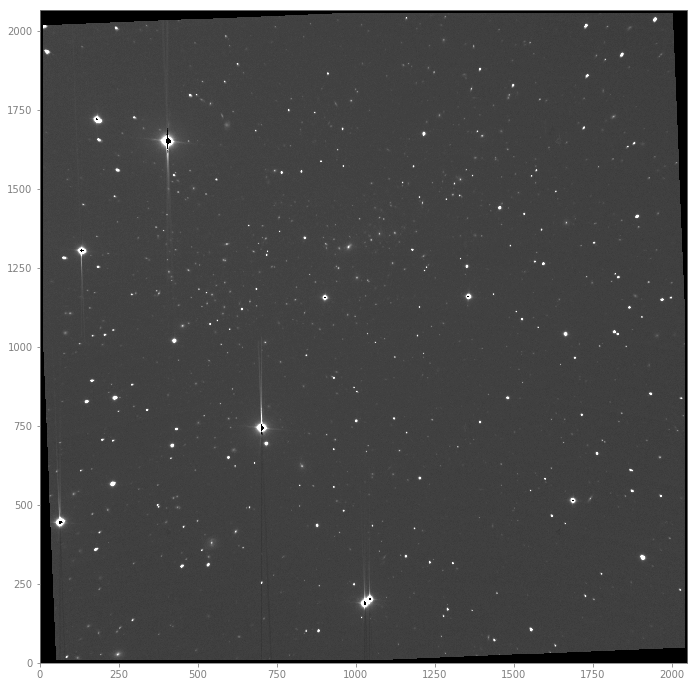

In [5]:
Raw_Datacube.display(Raw_Datacube.raw_stack_field)

In [9]:
Raw_Datacube.save_mask_edge(save_path='/home/qliu/data/')

In [5]:
Raw_Datacube.remove_background(save_path='./A2390C/fig/bkg/', plot=False)

Removing background...Frame: 10
Removing background...Frame: 20
Removing background...Frame: 30
Removing background...Frame: 40
Removing background...Frame: 50


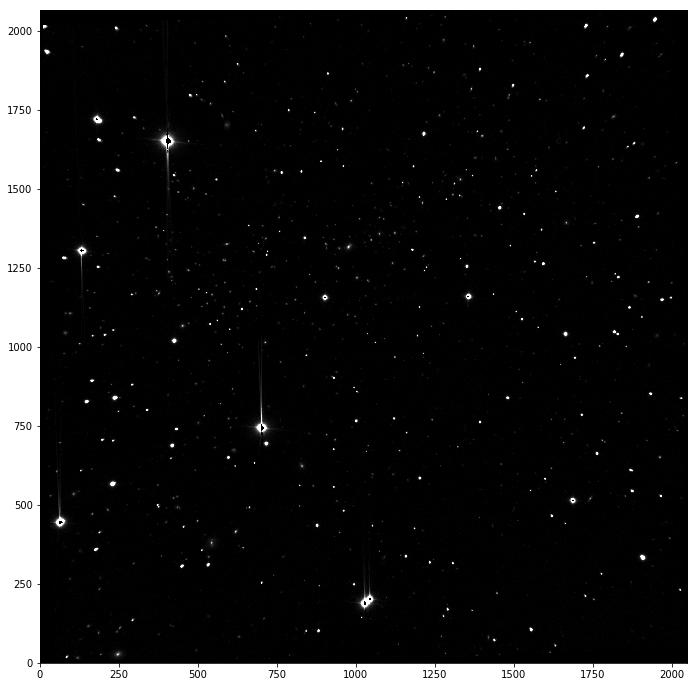

In [6]:
Raw_Datacube.display(Raw_Datacube.stack_field)

In [7]:
Raw_Datacube.remove_fringe(skip_frames=range(6,51), save_path='./A2390C/fig/bkg/', plot=False)

Removing fringe...Frame: 10
Removing fringe...Frame: 20
Removing fringe...Frame: 30
Removing fringe...Frame: 40
Removing fringe...Frame: 50


In [8]:
Raw_Datacube.save_fits(save_path='/home/qliu/data/')

Saving background & fringe subtracted datacube and stacked field...


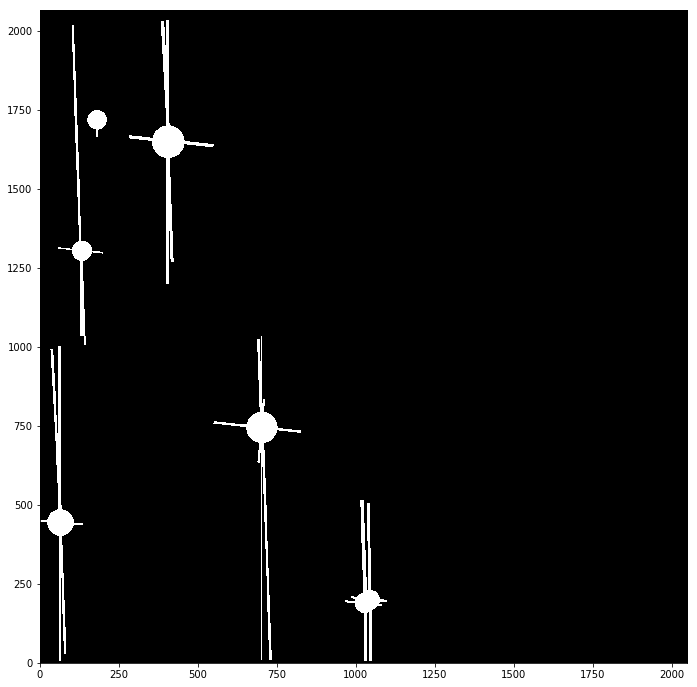

In [3]:
Raw_Datacube.save_weight_map(region_path="./A2390C/A2390C.reg", weight=0.01, 
                             save_path = './A2390C/SE/')
Raw_Datacube.display(Raw_Datacube.mymask,vmax=None)

## 2. Calculate seeing FWHM

In [6]:
Datacube = Read_Datacube("/home/qliu/data/A2390C_cube.fits",name="A2390C",SE_catalog="./A2390C/SE/A2390C_run1.cat")

/home/qliu/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


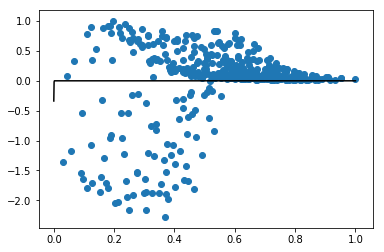

0.004619522729195114


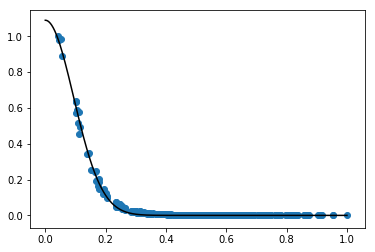

1.049505641377395


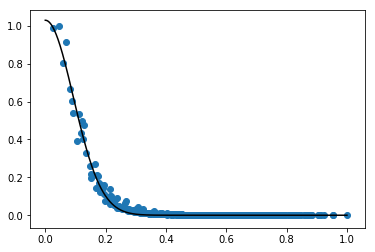

1.0548868342339648


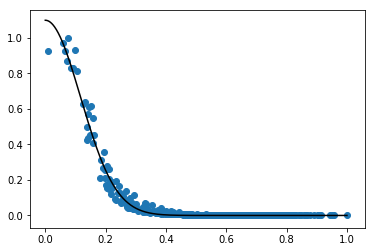

1.3227566683062189


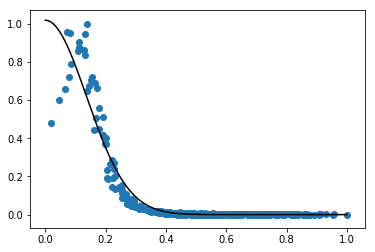

1.5625357445614771


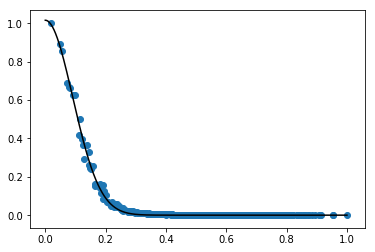

1.0492513635845737


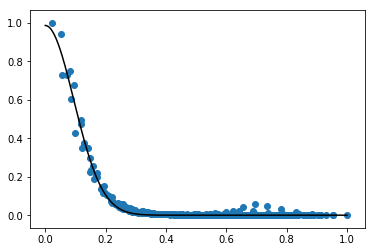

1.0678142883149295


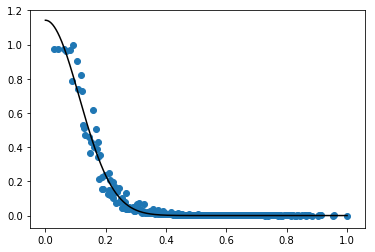

1.2911853474365897


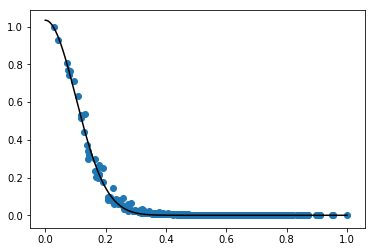

1.1164952347674046


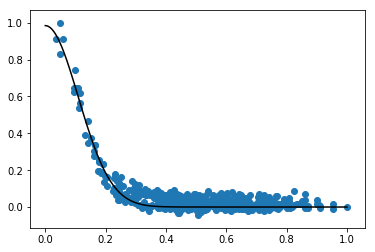

1.245061940839778


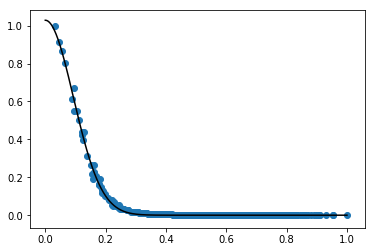

1.0409108738811208


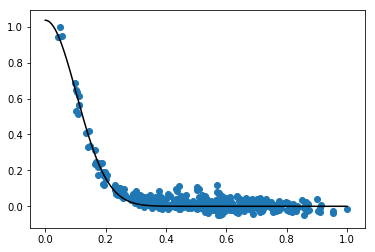

1.1602701685351258


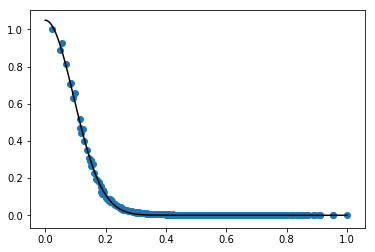

1.0858865154539756


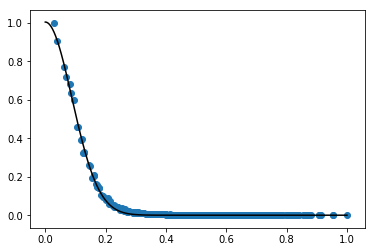

1.01443468892268


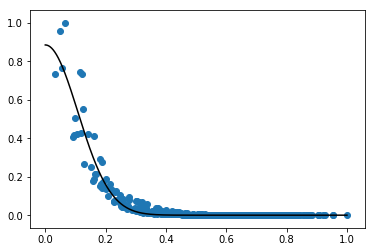

1.1952033114996905
Median seeing FWHM in arcsec: 1.086


In [4]:
Datacube.calculate_seeing(mag_cut=0.2, plot=True)

## 3. Spectra Extraction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *
Datacube = Read_Datacube("/home/qliu/data/A2390C_cube.fits",name="A2390C",SE_catalog="./A2390C/SE/A2390C_run3.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2390C_mask.fits')
Datacube.read_seg('./A2390C/SE/segment_run3.fits')

Optimal Aperture: 1.4 Rp, SNR = 6.9660


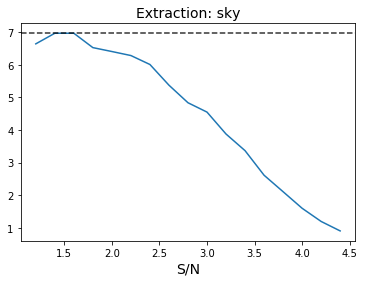

Optimal Aperture: 2.2 Rp, SNR = 3.0592


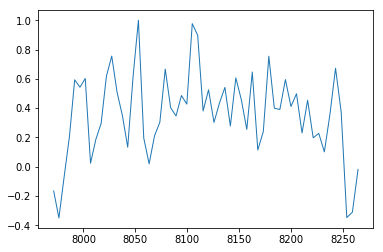

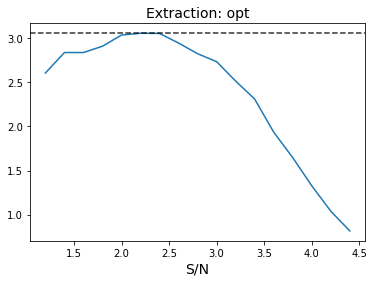

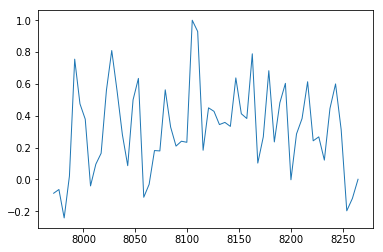

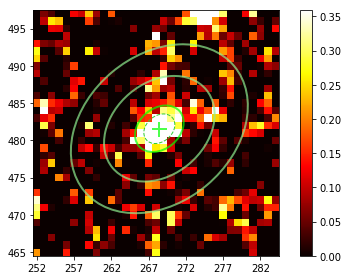

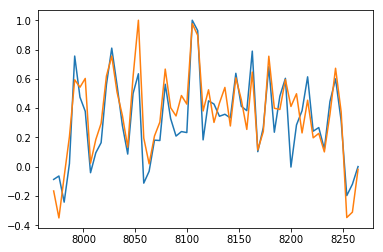

In [2]:
# Example
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=438, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=438, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

Optimal Aperture: 2.0 Rp, SNR = 2.0266


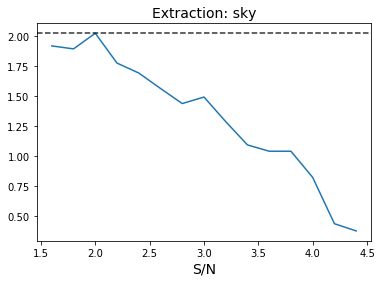

Optimal Aperture: 2.0 Rp, SNR = 1.2603


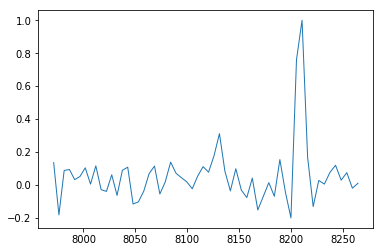

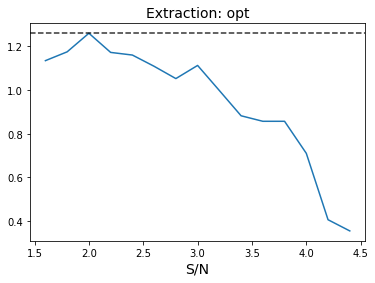

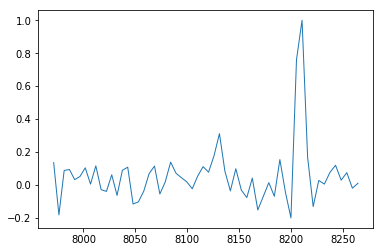

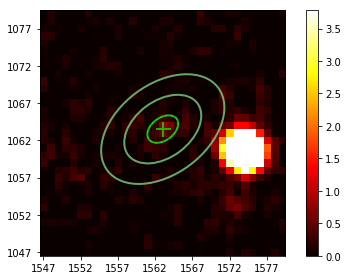

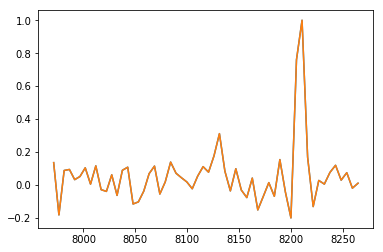

In [12]:
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=2136, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=2136, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

Optimal Aperture: 1.0 Rp, SNR = 262.8639


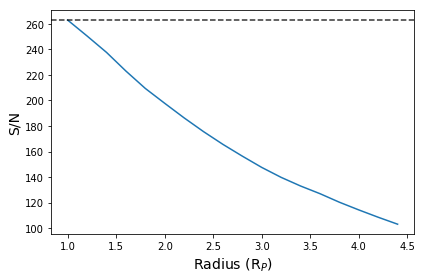

Optimal Aperture: 2.8 Rp, SNR = 42.8801


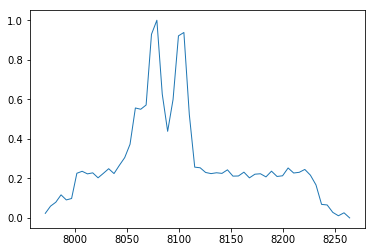

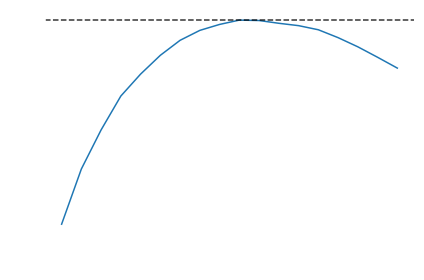

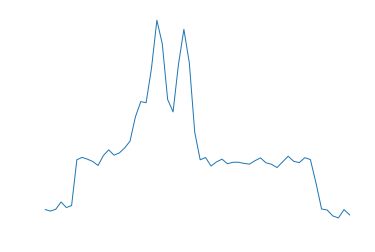

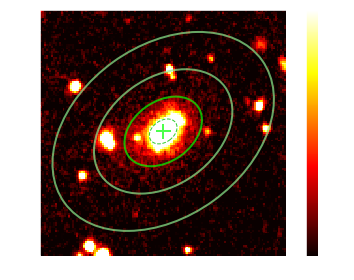

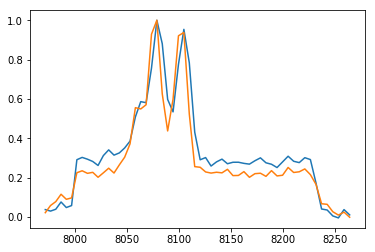

In [3]:
id_BCG = np.argmin((Datacube.Tab_SE["X_IMAGE"]-980)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1315)**2) + 1
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=id_BCG, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=id_BCG, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

2136
Optimal Aperture: 2.0 Rp, SNR = 2.0266


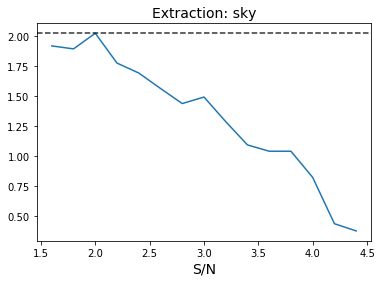

Optimal Aperture: 2.0 Rp, SNR = 1.2603


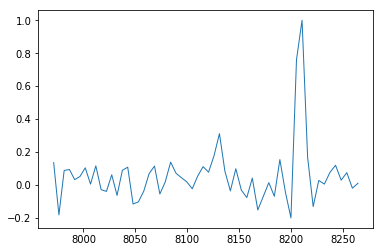

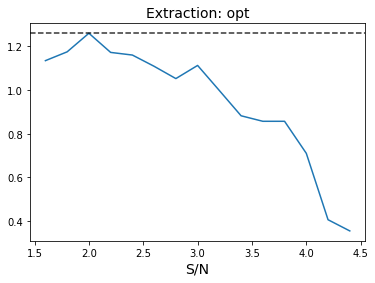

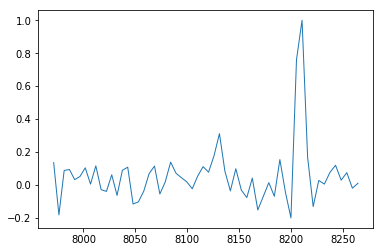

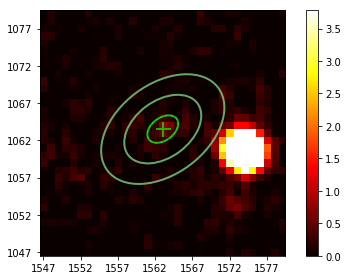

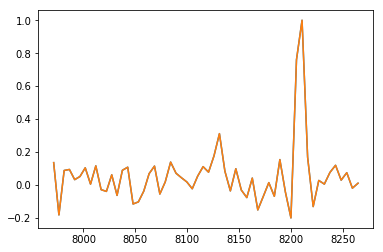

In [6]:
ind = np.argmin((Datacube.Tab_SE["X_IMAGE"]-1564)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1064)**2) + 1
print(ind)
spec_sky, k_sky, snr_sky, apers_sky = Datacube.spec_extraction(num=ind, ext_type='sky', k1=5., k2=8, 
                                                               print_out=True, plot=True, display=False)
spec_opt, k_opt, snr_opt, apers_opt = Datacube.spec_extraction(num=ind, ext_type='opt', k1=5., k2=8,
                                                               print_out=True, plot=True, display=True)
apers_sky[0].plot(color='limegreen',ls='--')
plt.show()
plt.plot(Datacube.wavl, spec_opt/spec_opt.max())
plt.plot(Datacube.wavl, spec_sky/spec_sky.max())

In [2]:
## Pipe
Datacube.spec_extraction_all(ks = np.arange(1.,4.6,0.1), k1=5., k2=8., save_path='./A2390C/fig/img_thumb_v2/', display=True)

#1 spectra extracted
#2 spectra extracted
#3 spectra extracted
#4 spectra extracted
#5 spectra extracted
#6 spectra extracted
#7 spectra extracted
#8 spectra extracted
#9 spectra extracted
#10 spectra extracted
#11 spectra extracted
#12 spectra extracted
#13 spectra extracted
#14 spectra extracted
#15 spectra extracted
#16 spectra extracted
#17 spectra extracted
#18 spectra extracted
#19 spectra extracted
#20 spectra extracted
#21 spectra extracted
#22 spectra extracted
#23 spectra extracted
#24 spectra extracted
#25 spectra extracted
#26 spectra extracted
#27 spectra extracted
#28 spectra extracted
#29 spectra extracted
#30 spectra extracted
#31 spectra extracted
#32 spectra extracted
#33 spectra extracted
#34 spectra extracted
#35 spectra extracted
#36 spectra extracted
#37 spectra extracted
#38 spectra extracted
#39 spectra extracted
#40 spectra extracted
#41 spectra extracted
#42 spectra extracted
#43 spectra extracted
#44 spectra extracted
#45 spectra extracted
#46 spectra extract

#362 spectra extracted
#363 spectra extracted
#364 spectra extracted
#365 spectra extracted
#366 spectra extracted
#367 spectra extracted
#368 spectra extracted
#369 spectra extracted
#370 spectra extracted
#371 spectra extracted
#372 spectra extracted
#373 spectra extracted
#374 spectra extracted
#375 spectra extracted
#376 spectra extracted
#377 spectra extracted
#378 spectra extracted
#379 spectra extracted
#380 spectra extracted
#381 spectra extracted
#382 spectra extracted
#383 spectra extracted
#384 spectra extracted
#385 spectra extracted
#386 spectra extracted
#387 spectra extracted
#388 spectra extracted
#389 spectra extracted
#390 spectra extracted
#391 spectra extracted
#392 spectra extracted
#393 spectra extracted
#394 spectra extracted
#395 spectra extracted
#396 spectra extracted
#397 spectra extracted
#398 spectra extracted
#399 spectra extracted
#400 spectra extracted
#401 spectra extracted
#402 spectra extracted
#403 spectra extracted
#404 spectra extracted
#405 spectr

#719 spectra extracted
#720 spectra extracted
#721 spectra extracted
#722 spectra extracted
#723 spectra extracted
#724 spectra extracted
#725 spectra extracted
#726 spectra extracted
#727 spectra extracted
#728 spectra extracted
#729 spectra extracted
#730 spectra extracted
#731 spectra extracted
#732 spectra extracted
#733 spectra extracted
#734 spectra extracted
#735 spectra extracted
#736 spectra extracted
#737 spectra extracted
#738 spectra extracted
#739 spectra extracted
#740 spectra extracted
#741 spectra extracted
#742 spectra extracted
#743 spectra extracted
#744 spectra extracted
#745 spectra extracted
#746 spectra extracted
#747 spectra extracted
#748 spectra extracted
#749 spectra extracted
#750 spectra extracted
#751 spectra extracted
#752 spectra extracted
#753 spectra extracted
#754 spectra extracted
#755 spectra extracted
#756 spectra extracted
#757 spectra extracted
#758 spectra extracted
#759 spectra extracted
#760 spectra extracted
#761 spectra extracted
#762 spectr

#1073 spectra extracted
#1074 spectra extracted
#1075 spectra extracted
#1076 spectra extracted
#1077 spectra extracted
#1078 spectra extracted
#1079 spectra extracted
#1080 spectra extracted
#1081 spectra extracted
#1082 spectra extracted
#1083 spectra extracted
#1084 spectra extracted
#1085 spectra extracted
#1086 spectra extracted
#1087 spectra extracted
#1088 spectra extracted
#1089 spectra extracted
#1090 spectra extracted
#1091 spectra extracted
#1092 spectra extracted
#1093 spectra extracted
#1094 spectra extracted
#1095 spectra extracted
#1096 spectra extracted
#1097 spectra extracted
#1098 spectra extracted
#1099 spectra extracted
#1100 spectra extracted
#1101 spectra extracted
#1102 spectra extracted
#1103 spectra extracted
#1104 spectra extracted
#1105 spectra extracted
#1106 spectra extracted
#1107 spectra extracted
#1108 spectra extracted
#1109 spectra extracted
#1110 spectra extracted
#1111 spectra extracted
#1112 spectra extracted
#1113 spectra extracted
#1114 spectra ex

#1415 spectra extracted
#1416 spectra extracted
#1417 spectra extracted
#1418 spectra extracted
#1419 spectra extracted
#1420 spectra extracted
#1421 spectra extracted
#1422 spectra extracted
#1423 spectra extracted
#1424 spectra extracted
#1425 spectra extracted
#1426 spectra extracted
#1427 spectra extracted
#1428 spectra extracted
#1429 spectra extracted
#1430 spectra extracted
#1431 spectra extracted
#1432 spectra extracted
#1433 spectra extracted
#1434 spectra extracted
#1435 spectra extracted
#1436 spectra extracted
#1437 spectra extracted
#1438 spectra extracted
#1439 spectra extracted
#1440 spectra extracted
#1441 spectra extracted
#1442 spectra extracted
#1443 spectra extracted
#1444 spectra extracted
#1445 spectra extracted
#1446 spectra extracted
#1447 spectra extracted
#1448 spectra extracted
#1449 spectra extracted
#1450 spectra extracted
#1451 spectra extracted
#1452 spectra extracted
#1453 spectra extracted
#1454 spectra extracted
#1455 spectra extracted
#1456 spectra ex

#1757 spectra extracted
#1758 spectra extracted
#1759 spectra extracted
#1760 spectra extracted
#1761 spectra extracted
#1762 spectra extracted
#1763 spectra extracted
#1764 spectra extracted
#1765 spectra extracted
#1766 spectra extracted
#1767 spectra extracted
#1768 spectra extracted
#1769 spectra extracted
#1770 spectra extracted
#1771 spectra extracted
#1772 spectra extracted
#1773 spectra extracted
#1774 spectra extracted
#1775 spectra extracted
#1776 spectra extracted
#1777 spectra extracted
#1778 spectra extracted
#1779 spectra extracted
#1780 spectra extracted
#1781 spectra extracted
#1782 spectra extracted
#1783 spectra extracted
#1784 spectra extracted
#1785 spectra extracted
#1786 spectra extracted
#1787 spectra extracted
#1788 spectra extracted
#1789 spectra extracted
#1790 spectra extracted
#1791 spectra extracted
#1792 spectra extracted
#1793 spectra extracted
#1794 spectra extracted
#1795 spectra extracted
#1796 spectra extracted
#1797 spectra extracted
#1798 spectra ex

#2099 spectra extracted
#2100 spectra extracted
#2101 spectra extracted
#2102 spectra extracted
#2103 spectra extracted
#2104 spectra extracted
#2105 spectra extracted
#2106 spectra extracted
#2107 spectra extracted
#2108 spectra extracted
#2109 spectra extracted
#2110 spectra extracted
#2111 spectra extracted
#2112 spectra extracted
#2113 spectra extracted
#2114 spectra extracted
#2115 spectra extracted
#2116 spectra extracted
#2117 spectra extracted
#2118 spectra extracted
#2119 spectra extracted
#2120 spectra extracted
#2121 spectra extracted
#2122 spectra extracted
#2123 spectra extracted
#2124 spectra extracted
#2125 spectra extracted
#2126 spectra extracted
#2127 spectra extracted
#2128 spectra extracted
#2129 spectra extracted
#2130 spectra extracted
#2131 spectra extracted
#2132 spectra extracted
#2133 spectra extracted
#2134 spectra extracted
#2135 spectra extracted
#2136 spectra extracted
#2137 spectra extracted
#2138 spectra extracted
#2139 spectra extracted
#2140 spectra ex

In [2]:
# Pipe
Datacube.fit_continuum_all(model='GP', edge_ratio=None, plot=True, save_path='./A2390C/fig/fit_cont/')
# with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.labelcolor':'white','axes.edgecolor':"white"}):
#     Datacube.fit_continuum_all(model='GP', edge_ratio=None, plot=True, save_path='./pic_pre/')

#1 spectra continuum fitted
#2 spectra continuum fitted
#3 spectra continuum fitted
#4 spectra continuum fitted
#5 spectra continuum fitted
#6 spectra continuum fitted
#7 spectra continuum fitted
#8 spectra continuum fitted
#9 spectra continuum fitted
#10 spectra continuum fitted
#11 spectra continuum fitted
#12 spectra continuum fitted
#13 spectra continuum fitted
#14 spectra continuum fitted
#15 spectra continuum fitted
#16 spectra continuum fitted
#17 spectra continuum fitted
#18 spectra continuum fitted
#19 spectra continuum fitted
#20 spectra continuum fitted
#21 spectra continuum fitted
#22 spectra continuum fitted
#23 spectra continuum fitted
#24 spectra continuum fitted
#25 spectra continuum fitted
#26 spectra continuum fitted
#27 spectra continuum fitted
#28 spectra continuum fitted
#29 spectra continuum fitted
#30 spectra continuum fitted
#31 spectra continuum fitted
#32 spectra continuum fitted
#33 spectra continuum fitted
#34 spectra continuum fitted
#35 spectra continuum f

KeyboardInterrupt: 

<Figure size 576x216 with 0 Axes>

In [3]:
# Datacube.save_spec_plot(save_path='./A2390C/fig/spec_v2/')
Datacube.save_spec_fits(save_path='./A2390C/', suffix="_v3")

## Cross-correlation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils import Background2D, SExtractorBackground
from pipeline import *
from utils import *

Datacube = Read_Datacube("/home/qliu/data/A2390C_cube.fits", name="A2390C", z0=0.228, SE_catalog="./A2390C/SE/A2390C_run3.cat")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2390C_mask.fits')
Datacube.read_seg('./A2390C/SE/segment_run3.fits')
Datacube.read_spec('./A2390C/A2390C-spec_v3.fits')

In [2]:
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4,
                           temp_type="OII", ratio_prior="uniform", temp_model='gauss')

Template: Ha-NII_gauss  Total Number: 300
Template: Hb-OIII_gauss  Total Number: 120
Template: OII_gauss  Total Number: 15


Best z: 0.24048335759605385 Best sigma: 4.945661352565423
SE Object #1686  z: 0.240  Peak R: 3.760  Detction S/N: 13.807 Peak S/N: 11.863


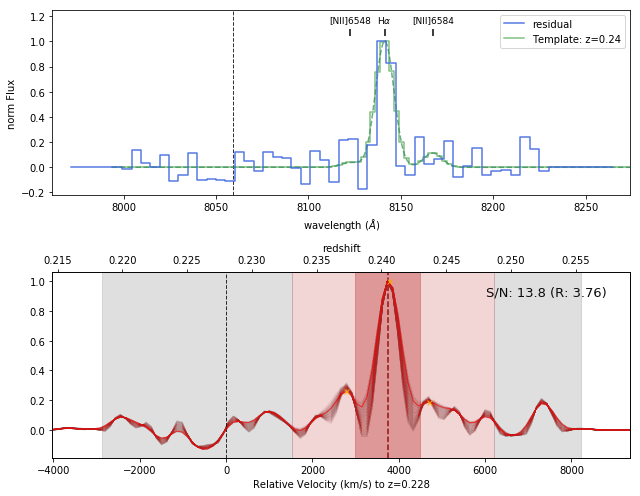

In [3]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1686, temp_type="Ha-NII", temp_model="gauss")

Best z: 0.25076421230743223 Best sigma: 2.219596146042938
SE Object #2136  z: 0.251  Peak R: 6.879  Detction S/N: 13.388 Peak S/N: 13.221


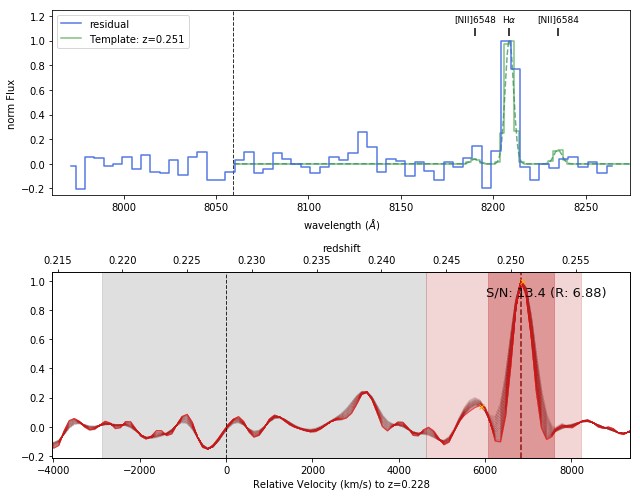

In [3]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(2136, temp_type="Ha-NII", temp_model="gauss")

Best z: 0.639412104035138 Best sigma: 2.219596146042938
SE Object #2136  z: 0.639  Peak R: 1.000  Detction S/N: 14.915 Peak S/N: 14.915


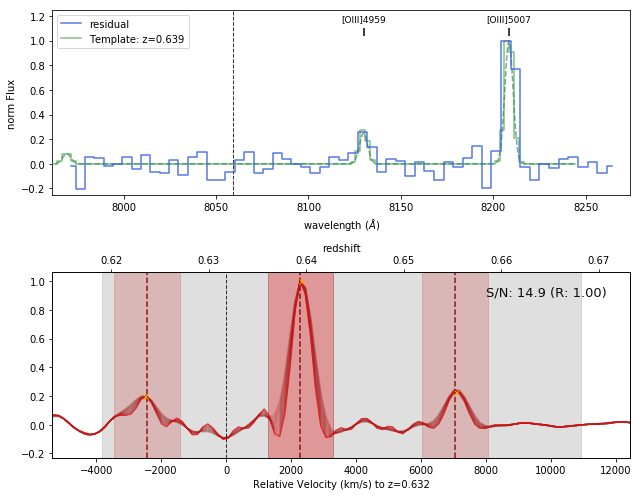

In [4]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(2136, temp_type="Hb-OIII", temp_model="gauss")

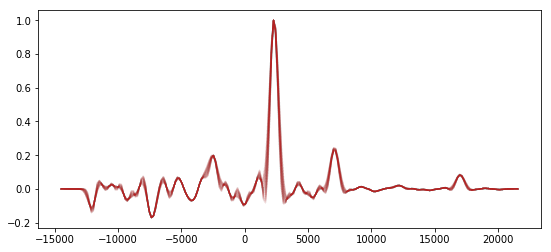

In [14]:
plt.figure(figsize=(9,4))
for cc in ccs:
    plt.plot(rv,cc,alpha=0.02,color='firebrick')

Best z: 1.1997093475851806 Best sigma: 5.155358676144076
SE Object #574  z: 1.200  Peak R: 1.000  Detction S/N: 6.507 Peak S/N: 6.507


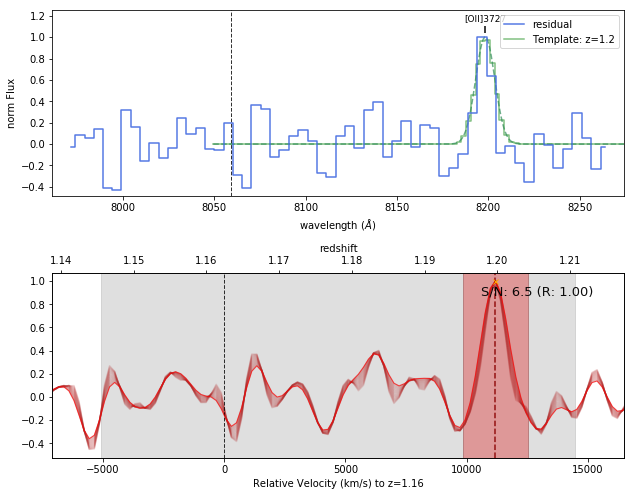

In [28]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(574, temp_type="OII", temp_model="gauss")

Best z: 0.2186551725654005 Best sigma: 3.687477411093507
SE Object #1111  z: 0.219  Peak R: 5.107  Detction S/N: 10.877 Peak S/N: 10.005


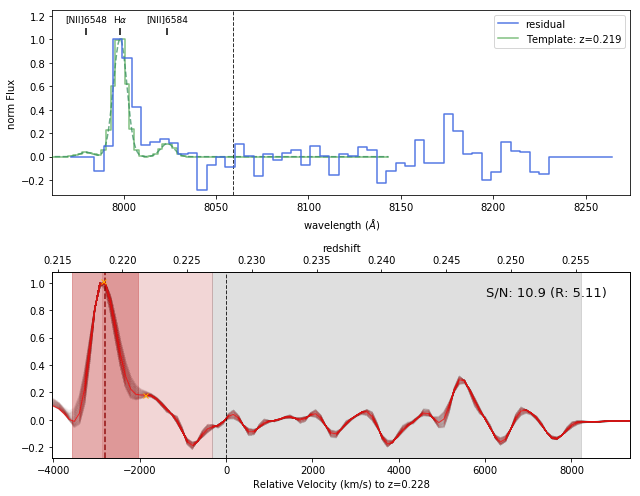

In [7]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1111, temp_type="Ha-NII", temp_model="gauss")

### Candidates that are missed in my sample

SE Objects #1651   S/N med: 2.73  max: 3.05


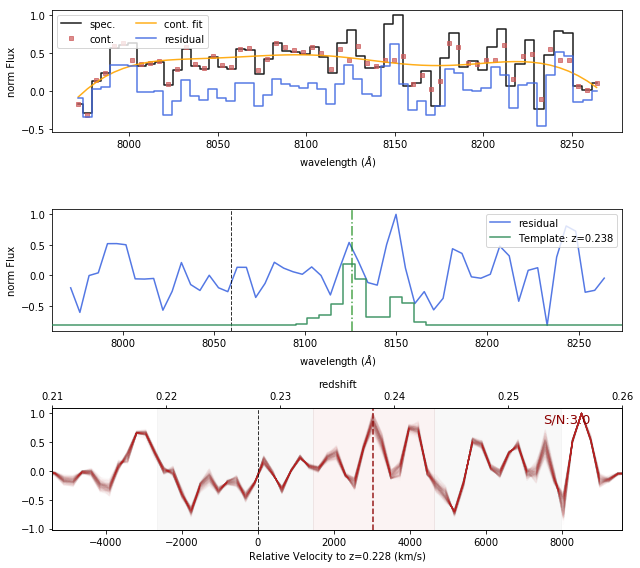

In [10]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1651, ext_type='opt')  #off-center

SE Objects #1732   S/N med: 4.51  max: 4.83


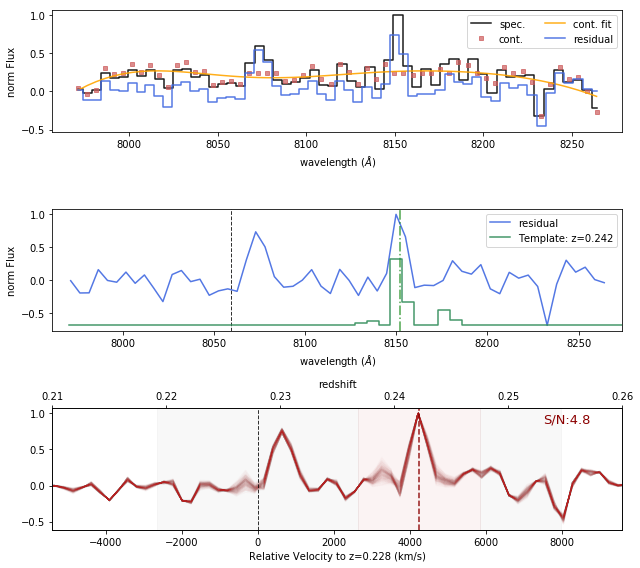

In [8]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(1732, ext_type='opt')   #2-peak

SE Objects #649   S/N med: 4.07  max: 4.84


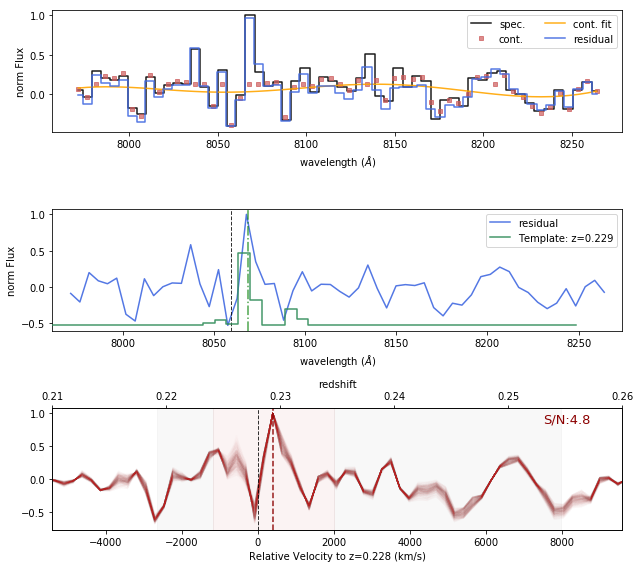

In [13]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(649, ext_type='opt')  #noisy

Best z: 0.25198133581734167 Best sigma: 5.155358676144076
SE Object #659  z: 0.252  Peak R: 5.466  Detction S/N: 2.647 Peak S/N: 2.814


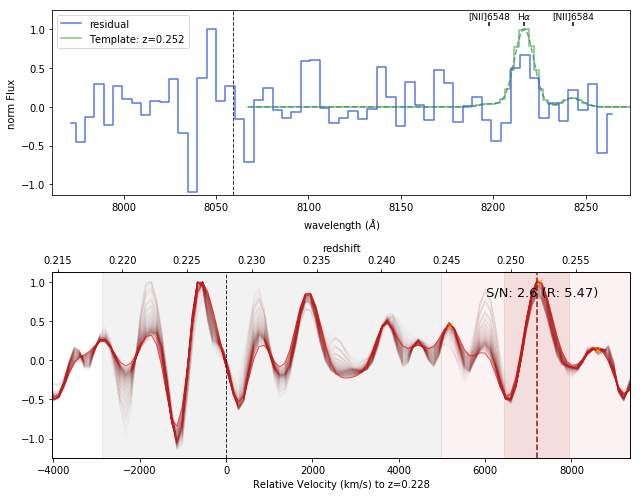

In [13]:
ccs, rv, z_ccs, Rs, SNRs, SNR_ps, Contrast = Datacube.cross_correlation(659, temp_type="Ha-NII", temp_model="gauss")  #noisy

SE Objects #553   S/N med: 3.92  max: 4.46


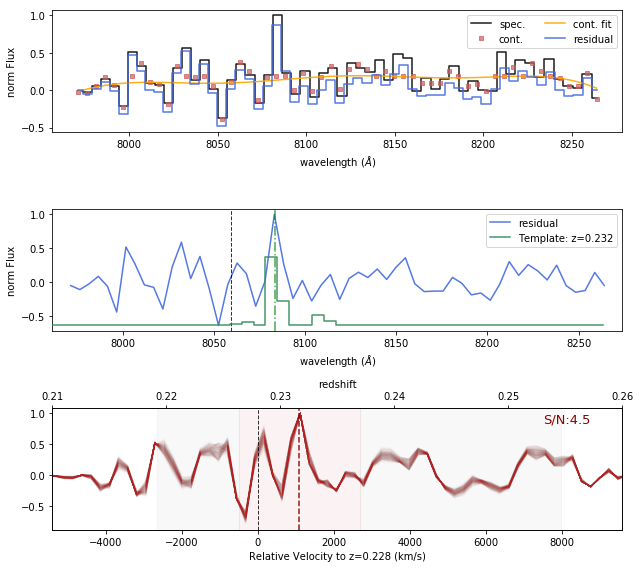

In [19]:
ccs, rv, z_ccs, SNR_ps, flag = Datacube.cross_correlation(553, ext_type='opt')

SE Objects #634   S/N med: 3.47  max: 3.79


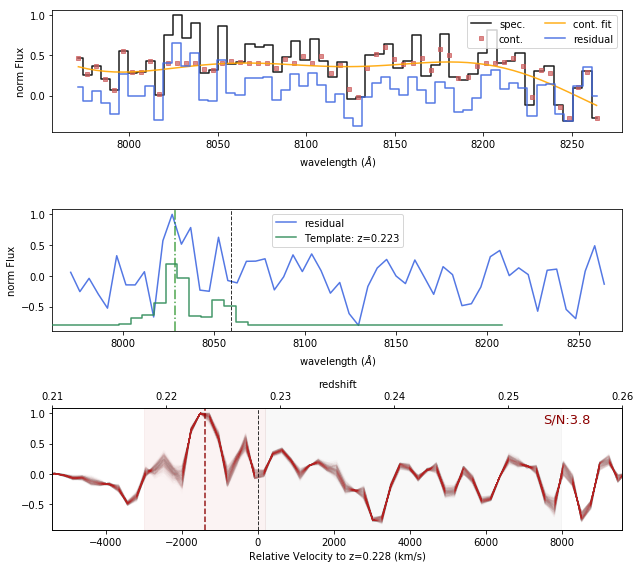

In [20]:
ccs, rv, z_ccs, SNR_ps, flag = Datacube.cross_correlation(634, ext_type='opt')

SE Objects #459   S/N med: 4.1  max: 4.2


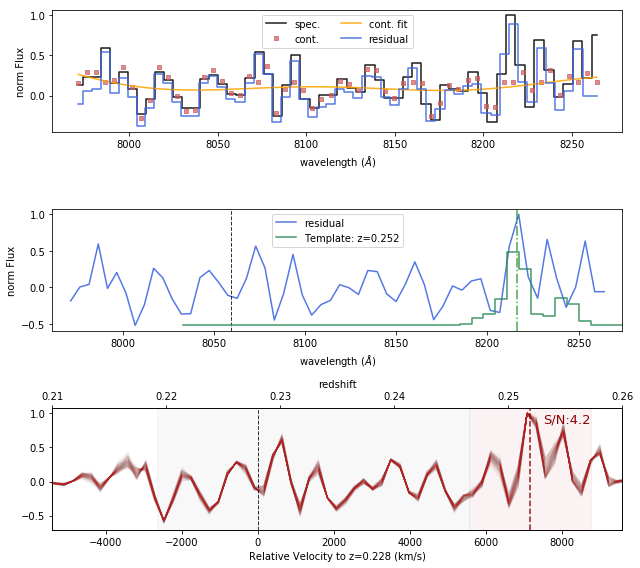

In [21]:
ccs, rv, z_ccs, SNR_ps, flag = Datacube.cross_correlation(459, ext_type='opt')

In [5]:
Datacube.cross_correlation_all(temp_type="Ha-NII", temp_model="gauss")  #new library

SE Object #1  z: 0.228  Peak R: 1.131  Detction S/N: 2.635 Peak S/N: 2.741
SE Object #2  z: 0.220  Peak R: 2.251  Detction S/N: 2.689 Peak S/N: 2.782
SE Object #3  z: 0.220  Peak R: 3.061  Detction S/N: 3.133 Peak S/N: 3.337
SE Object #4  z: 0.229  Peak R: 1.911  Detction S/N: 3.313 Peak S/N: 3.580
SE Object #5  z: 0.216  Peak R: 1.017  Detction S/N: 3.961 Peak S/N: 3.352
SE Object #6  z: 0.237  Peak R: 3.081  Detction S/N: 2.929 Peak S/N: 3.345
SE Object #7  z: 0.246  Peak R: 5.510  Detction S/N: 5.132 Peak S/N: 4.213
SE Object #8  z: 0.216  Peak R: 1.355  Detction S/N: 3.423 Peak S/N: 3.318
SE Object #9  z: 0.218  Peak R: 9.443  Detction S/N: 2.189 Peak S/N: 2.271
SE Object #10  z: 0.220  Peak R: 3.665  Detction S/N: 5.170 Peak S/N: 5.556
SE Object #11  z: 0.233  Peak R: 1.553  Detction S/N: 3.703 Peak S/N: 2.950
SE Object #12  z: 0.221  Peak R: 2.860  Detction S/N: 4.013 Peak S/N: 4.109
SE Object #13  z: 0.252  Peak R: 3.000  Detction S/N: 2.207 Peak S/N: 2.102
SE Object #14  z: 0.2

SE Object #109  z: 0.253  Peak R: 2.731  Detction S/N: 2.405 Peak S/N: 2.455
SE Object #110  z: 0.251  Peak R: 5.811  Detction S/N: 2.743 Peak S/N: 2.713
SE Object #111  z: 0.251  Peak R: 1.720  Detction S/N: 1.860 Peak S/N: 1.778
SE Object #112  z: 0.239  Peak R: 1.576  Detction S/N: 2.756 Peak S/N: 2.968
SE Object #113  z: 0.254  Peak R: 2.696  Detction S/N: 3.370 Peak S/N: 3.598
SE Object #114  z: 0.235  Peak R: 1.767  Detction S/N: 5.589 Peak S/N: 4.805
SE Object #115  z: 0.235  Peak R: 1.952  Detction S/N: 2.835 Peak S/N: 2.844
SE Object #116  z: 0.251  Peak R: 3.943  Detction S/N: 2.295 Peak S/N: 2.311
SE Object #117  z: 0.223  Peak R: 1.110  Detction S/N: 3.012 Peak S/N: 3.060
SE Object #118  z: 0.239  Peak R: 8.707  Detction S/N: 1.794 Peak S/N: 1.886
SE Object #119  z: 0.236  Peak R: 1.000  Detction S/N: 3.012 Peak S/N: 3.291
SE Object #120  z: 0.239  Peak R: 2.415  Detction S/N: 3.351 Peak S/N: 2.922
SE Object #121  z: 0.237  Peak R: 9.542  Detction S/N: 4.389 Peak S/N: 4.785

SE Object #216  z: 0.217  Peak R: 2.591  Detction S/N: 3.082 Peak S/N: 2.922
SE Object #217  z: 0.251  Peak R: 7.917  Detction S/N: 4.891 Peak S/N: 4.918
SE Object #218  z: 0.220  Peak R: 1.608  Detction S/N: 3.919 Peak S/N: 3.749
SE Object #219  z: 0.240  Peak R: 1.571  Detction S/N: 3.084 Peak S/N: 3.202
SE Object #220  z: 0.221  Peak R: 2.077  Detction S/N: 1.899 Peak S/N: 1.974
SE Object #221  z: 0.254  Peak R: 9.864  Detction S/N: 3.086 Peak S/N: 3.019
SE Object #222  z: 0.238  Peak R: 5.412  Detction S/N: 2.741 Peak S/N: 2.987
SE Object #223  z: 0.235  Peak R: 3.973  Detction S/N: 2.469 Peak S/N: 2.345
SE Object #224  z: 0.240  Peak R: 2.749  Detction S/N: 5.442 Peak S/N: 4.114
SE Object #225  z: 0.255  Peak R: 1.000  Detction S/N: 2.284 Peak S/N: 2.103
SE Object #226  z: 0.236  Peak R: 1.095  Detction S/N: 1.904 Peak S/N: 2.004
SE Object #227  z: 0.256  Peak R: 1.000  Detction S/N: 5.990 Peak S/N: 6.029
SE Object #228  z: 0.220  Peak R: 6.550  Detction S/N: 6.269 Peak S/N: 5.761

SE Object #323  z: 0.217  Peak R: 1.982  Detction S/N: 2.859 Peak S/N: 2.951
SE Object #324  z: 0.216  Peak R: 6.152  Detction S/N: 3.472 Peak S/N: 3.475
SE Object #325  z: 0.231  Peak R: 7.425  Detction S/N: 20.716 Peak S/N: 18.219
SE Object #326  z: 0.243  Peak R: 2.349  Detction S/N: 3.645 Peak S/N: 3.944
SE Object #327  z: 0.231  Peak R: 1.391  Detction S/N: 3.316 Peak S/N: 2.791
SE Object #328  z: 0.245  Peak R: 1.000  Detction S/N: 3.115 Peak S/N: 2.673
SE Object #329  z: 0.250  Peak R: 1.956  Detction S/N: 2.204 Peak S/N: 2.383
SE Object #330  z: 0.250  Peak R: 1.977  Detction S/N: 2.028 Peak S/N: 2.026
SE Object #331  z: 0.227  Peak R: 7.881  Detction S/N: 2.447 Peak S/N: 2.533
SE Object #332  z: 0.254  Peak R: 1.593  Detction S/N: 2.076 Peak S/N: 1.963
SE Object #333  z: 0.216  Peak R: 2.852  Detction S/N: 3.447 Peak S/N: 3.552
SE Object #334  z: 0.229  Peak R: 6.181  Detction S/N: 3.680 Peak S/N: 3.728
SE Object #335  z: 0.245  Peak R: 9.600  Detction S/N: 5.480 Peak S/N: 4.3

SE Object #430  z: 0.223  Peak R: 1.597  Detction S/N: 2.354 Peak S/N: 2.476
SE Object #431  z: 0.223  Peak R: 1.571  Detction S/N: 5.069 Peak S/N: 4.643
SE Object #432  z: 0.227  Peak R: 1.416  Detction S/N: 4.745 Peak S/N: 4.166
SE Object #433  z: 0.237  Peak R: 1.960  Detction S/N: 3.615 Peak S/N: 3.211
SE Object #434  z: 0.218  Peak R: 1.000  Detction S/N: 2.978 Peak S/N: 2.914
SE Object #435  z: 0.252  Peak R: 3.522  Detction S/N: 2.069 Peak S/N: 2.196
SE Object #436  z: 0.219  Peak R: 2.701  Detction S/N: 3.336 Peak S/N: 3.543
SE Object #437  z: 0.252  Peak R: 3.585  Detction S/N: 3.592 Peak S/N: 3.473
SE Object #438  z: 0.235  Peak R: 2.984  Detction S/N: 3.887 Peak S/N: 4.065
SE Object #439  z: 0.241  Peak R: 7.656  Detction S/N: 3.375 Peak S/N: 3.206
SE Object #440  z: 0.217  Peak R: 3.715  Detction S/N: 2.535 Peak S/N: 2.620
SE Object #441  z: 0.241  Peak R: 1.568  Detction S/N: 1.798 Peak S/N: 1.766
SE Object #442  z: 0.228  Peak R: 1.613  Detction S/N: 2.229 Peak S/N: 2.262

SE Object #538  z: 0.230  Peak R: 2.677  Detction S/N: 2.346 Peak S/N: 2.204
SE Object #539  z: 0.217  Peak R: 1.206  Detction S/N: 3.545 Peak S/N: 3.143
SE Object #540  z: 0.219  Peak R: 9.483  Detction S/N: 4.014 Peak S/N: 3.557
SE Object #541  z: 0.247  Peak R: 3.282  Detction S/N: 2.358 Peak S/N: 2.119
SE Object #542  z: 0.228  Peak R: 1.369  Detction S/N: 2.762 Peak S/N: 2.895
SE Object #543  z: 0.232  Peak R: 1.774  Detction S/N: 2.327 Peak S/N: 2.459
SE Object #544  z: 0.229  Peak R: 1.046  Detction S/N: 1.636 Peak S/N: 1.652
SE Object #545  z: 0.235  Peak R: 2.674  Detction S/N: 1.894 Peak S/N: 2.156
SE Object #546  z: 0.252  Peak R: 1.364  Detction S/N: 2.266 Peak S/N: 2.292
SE Object #547  z: 0.224  Peak R: 1.630  Detction S/N: 3.670 Peak S/N: 3.664
SE Object #548  z: 0.219  Peak R: 1.685  Detction S/N: 3.315 Peak S/N: 3.319
SE Object #549  z: 0.237  Peak R: 1.000  Detction S/N: 2.940 Peak S/N: 2.912
SE Object #550  z: 0.227  Peak R: 2.688  Detction S/N: 2.617 Peak S/N: 2.793

SE Object #645  z: 0.251  Peak R: 2.698  Detction S/N: 2.339 Peak S/N: 2.430
SE Object #646  z: 0.238  Peak R: 5.332  Detction S/N: 20.375 Peak S/N: 14.401
SE Object #647  z: 0.227  Peak R: 6.378  Detction S/N: 2.687 Peak S/N: 2.656
SE Object #648  z: 0.230  Peak R: 5.503  Detction S/N: 3.667 Peak S/N: 3.813
SE Object #649  z: 0.229  Peak R: 1.856  Detction S/N: 4.796 Peak S/N: 4.618
SE Object #650  z: 0.234  Peak R: 9.482  Detction S/N: 2.240 Peak S/N: 2.149
SE Object #651  z: 0.243  Peak R: 6.564  Detction S/N: 4.915 Peak S/N: 5.673
SE Object #652  z: 0.219  Peak R: 1.603  Detction S/N: 4.626 Peak S/N: 3.710
SE Object #653  z: 0.254  Peak R: 1.000  Detction S/N: 3.668 Peak S/N: 2.774
SE Object #654  z: 0.237  Peak R: 1.306  Detction S/N: 4.691 Peak S/N: 3.968
SE Object #655  z: 0.216  Peak R: 3.414  Detction S/N: 3.326 Peak S/N: 3.423
SE Object #656  z: 0.228  Peak R: 1.926  Detction S/N: 4.826 Peak S/N: 4.178
SE Object #657  z: 0.221  Peak R: 5.141  Detction S/N: 3.211 Peak S/N: 3.3

SE Object #752  z: 0.231  Peak R: 3.250  Detction S/N: 2.432 Peak S/N: 2.565
SE Object #753  z: 0.236  Peak R: 2.991  Detction S/N: 3.364 Peak S/N: 3.297
SE Object #754  z: 0.231  Peak R: 3.366  Detction S/N: 1.888 Peak S/N: 1.901
SE Object #755  z: 0.233  Peak R: 1.242  Detction S/N: 3.927 Peak S/N: 3.635
SE Object #756  z: 0.217  Peak R: 9.810  Detction S/N: 2.920 Peak S/N: 3.062
SE Object #757  z: 0.241  Peak R: 1.260  Detction S/N: 3.165 Peak S/N: 2.487
SE Object #758  z: 0.225  Peak R: 4.194  Detction S/N: 3.219 Peak S/N: 2.827
SE Object #759  z: 0.244  Peak R: 2.835  Detction S/N: 2.911 Peak S/N: 3.105
SE Object #760  z: 0.238  Peak R: 3.421  Detction S/N: 3.367 Peak S/N: 3.155
SE Object #761  z: 0.222  Peak R: 4.082  Detction S/N: 4.182 Peak S/N: 4.414
SE Object #762  z: 0.256  Peak R: 1.083  Detction S/N: 3.007 Peak S/N: 2.770
SE Object #763  z: 0.217  Peak R: 6.009  Detction S/N: 3.500 Peak S/N: 3.569
SE Object #764  z: 0.257  Peak R: 6.363  Detction S/N: 2.344 Peak S/N: 2.476

SE Object #859  z: 0.219  Peak R: 7.972  Detction S/N: 2.310 Peak S/N: 2.432
SE Object #860  z: 0.246  Peak R: 2.245  Detction S/N: 3.760 Peak S/N: 3.756
SE Object #861  z: 0.231  Peak R: 1.064  Detction S/N: 4.212 Peak S/N: 2.785
SE Object #862  z: 0.220  Peak R: 8.671  Detction S/N: 2.055 Peak S/N: 2.119
SE Object #863  z: 0.220  Peak R: 1.662  Detction S/N: 1.900 Peak S/N: 1.896
SE Object #864  z: 0.248  Peak R: 4.530  Detction S/N: 3.335 Peak S/N: 3.672
SE Object #865  z: 0.250  Peak R: 1.915  Detction S/N: 2.244 Peak S/N: 2.388
SE Object #866  z: 0.256  Peak R: 6.117  Detction S/N: 3.447 Peak S/N: 3.572
SE Object #867  z: 0.249  Peak R: 1.473  Detction S/N: 2.356 Peak S/N: 2.455
SE Object #868  z: 0.240  Peak R: 1.000  Detction S/N: 3.515 Peak S/N: 3.546
SE Object #869  z: 0.216  Peak R: 8.620  Detction S/N: 3.831 Peak S/N: 3.589
SE Object #870  z: 0.232  Peak R: 8.790  Detction S/N: 2.096 Peak S/N: 2.316
SE Object #871  z: 0.226  Peak R: 1.540  Detction S/N: 3.951 Peak S/N: 3.407

SE Object #966  z: 0.222  Peak R: 1.467  Detction S/N: 2.772 Peak S/N: 2.536
SE Object #967  z: 0.252  Peak R: 6.386  Detction S/N: 4.377 Peak S/N: 3.233
SE Object #968  z: 0.215  Peak R: 7.712  Detction S/N: 2.998 Peak S/N: 2.918
SE Object #969  z: 0.233  Peak R: 5.727  Detction S/N: 5.015 Peak S/N: 4.823
SE Object #970  z: 0.236  Peak R: 5.941  Detction S/N: 3.210 Peak S/N: 3.479
SE Object #971  z: 0.217  Peak R: 5.511  Detction S/N: 2.124 Peak S/N: 2.197
SE Object #972  z: 0.252  Peak R: 9.891  Detction S/N: 3.083 Peak S/N: 2.720
SE Object #973  z: 0.238  Peak R: 1.899  Detction S/N: 3.068 Peak S/N: 2.761
SE Object #974  z: 0.226  Peak R: 1.607  Detction S/N: 1.418 Peak S/N: 1.609
SE Object #975  z: 0.253  Peak R: 1.193  Detction S/N: 2.280 Peak S/N: 2.347
SE Object #976  z: 0.225  Peak R: 2.094  Detction S/N: 3.138 Peak S/N: 3.325
SE Object #977  z: 0.256  Peak R: 2.176  Detction S/N: 3.230 Peak S/N: 3.217
SE Object #978  z: 0.224  Peak R: 1.227  Detction S/N: 1.831 Peak S/N: 1.938

SE Object #1073  z: 0.217  Peak R: 2.500  Detction S/N: 4.998 Peak S/N: 5.086
SE Object #1074  z: 0.254  Peak R: 1.607  Detction S/N: 3.553 Peak S/N: 3.368
SE Object #1075  z: 0.233  Peak R: 3.096  Detction S/N: 2.897 Peak S/N: 2.906
SE Object #1076  z: 0.241  Peak R: 2.616  Detction S/N: 3.483 Peak S/N: 4.040
SE Object #1077  z: 0.252  Peak R: 2.962  Detction S/N: 1.522 Peak S/N: 1.603
SE Object #1078  z: 0.233  Peak R: 1.468  Detction S/N: 2.230 Peak S/N: 2.135
SE Object #1079  z: 0.221  Peak R: 9.592  Detction S/N: 3.846 Peak S/N: 3.671
SE Object #1080  z: 0.237  Peak R: 1.004  Detction S/N: 2.631 Peak S/N: 2.659
SE Object #1081  z: 0.252  Peak R: 1.000  Detction S/N: 1.929 Peak S/N: 1.589
SE Object #1082  z: 0.254  Peak R: 8.338  Detction S/N: 6.853 Peak S/N: 6.988
SE Object #1083  z: 0.221  Peak R: 1.205  Detction S/N: 4.866 Peak S/N: 3.722
SE Object #1084  z: 0.233  Peak R: 2.230  Detction S/N: 2.744 Peak S/N: 2.862
SE Object #1085  z: 0.254  Peak R: 5.305  Detction S/N: 6.017 Pe

SE Object #1178  z: 0.217  Peak R: 1.982  Detction S/N: 3.142 Peak S/N: 3.202
SE Object #1179  z: 0.254  Peak R: 1.519  Detction S/N: 2.256 Peak S/N: 2.024
SE Object #1180  z: 0.252  Peak R: 1.594  Detction S/N: 3.024 Peak S/N: 2.948
SE Object #1181  z: 0.253  Peak R: 4.513  Detction S/N: 4.575 Peak S/N: 3.957
SE Object #1182  z: 0.226  Peak R: 1.269  Detction S/N: 3.355 Peak S/N: 3.205
SE Object #1183  z: 0.223  Peak R: 1.545  Detction S/N: 3.222 Peak S/N: 2.956
SE Object #1184  z: 0.216  Peak R: 8.320  Detction S/N: 3.634 Peak S/N: 3.562
SE Object #1185  z: 0.255  Peak R: 3.459  Detction S/N: 4.537 Peak S/N: 4.245
SE Object #1186  z: 0.230  Peak R: 9.939  Detction S/N: 3.141 Peak S/N: 3.364
SE Object #1187  z: 0.221  Peak R: 1.362  Detction S/N: 2.902 Peak S/N: 2.935
SE Object #1188  z: 0.217  Peak R: 8.977  Detction S/N: 4.256 Peak S/N: 4.335
SE Object #1189  z: 0.221  Peak R: 1.684  Detction S/N: 3.183 Peak S/N: 3.283
SE Object #1190  z: 0.244  Peak R: 2.279  Detction S/N: 2.752 Pe

SE Object #1283  z: 0.244  Peak R: 1.583  Detction S/N: 2.763 Peak S/N: 2.874
SE Object #1284  z: 0.242  Peak R: 1.000  Detction S/N: 2.627 Peak S/N: 2.929
SE Object #1285  z: 0.246  Peak R: 1.000  Detction S/N: 2.838 Peak S/N: 2.732
SE Object #1286  z: 0.219  Peak R: 2.250  Detction S/N: 3.690 Peak S/N: 3.615
SE Object #1287  z: 0.252  Peak R: 1.929  Detction S/N: 4.282 Peak S/N: 4.284
SE Object #1288  z: 0.232  Peak R: 3.823  Detction S/N: 3.424 Peak S/N: 3.361
SE Object #1289  z: 0.226  Peak R: 1.217  Detction S/N: 3.160 Peak S/N: 3.151
SE Object #1290  z: 0.231  Peak R: 1.089  Detction S/N: 2.931 Peak S/N: 2.891
SE Object #1291  z: 0.231  Peak R: 9.463  Detction S/N: 3.153 Peak S/N: 3.500
SE Object #1292  z: 0.221  Peak R: 2.957  Detction S/N: 2.326 Peak S/N: 2.256
SE Object #1293  z: 0.217  Peak R: 2.982  Detction S/N: 5.201 Peak S/N: 5.052
SE Object #1294  z: 0.253  Peak R: 3.125  Detction S/N: 2.404 Peak S/N: 2.408
SE Object #1295  z: 0.219  Peak R: 2.578  Detction S/N: 2.754 Pe

SE Object #1388  z: 0.241  Peak R: 1.365  Detction S/N: 2.371 Peak S/N: 2.259
SE Object #1389  z: 0.229  Peak R: 1.618  Detction S/N: 3.228 Peak S/N: 3.417
SE Object #1390  z: 0.255  Peak R: 7.307  Detction S/N: 17.931 Peak S/N: 17.687
SE Object #1391  z: 0.215  Peak R: 7.858  Detction S/N: 3.391 Peak S/N: 3.045
SE Object #1392  z: 0.235  Peak R: 1.391  Detction S/N: 5.973 Peak S/N: 4.842
SE Object #1393  z: 0.256  Peak R: 3.214  Detction S/N: 3.577 Peak S/N: 3.393
SE Object #1394  z: 0.227  Peak R: 1.367  Detction S/N: 3.083 Peak S/N: 3.227
SE Object #1395  z: 0.242  Peak R: 2.061  Detction S/N: 4.154 Peak S/N: 4.525
SE Object #1396  z: 0.217  Peak R: 9.678  Detction S/N: 4.618 Peak S/N: 4.843
SE Object #1397  z: 0.254  Peak R: 4.407  Detction S/N: 2.901 Peak S/N: 3.031
SE Object #1398  z: 0.221  Peak R: 1.445  Detction S/N: 2.673 Peak S/N: 2.885
SE Object #1399  z: 0.240  Peak R: 7.848  Detction S/N: 4.360 Peak S/N: 3.931
SE Object #1400  z: 0.242  Peak R: 1.000  Detction S/N: 2.855 

SE Object #1493  z: 0.235  Peak R: 1.544  Detction S/N: 2.182 Peak S/N: 2.112
SE Object #1494  z: 0.227  Peak R: 2.587  Detction S/N: 4.011 Peak S/N: 3.908
SE Object #1495  z: 0.241  Peak R: 1.493  Detction S/N: 34.611 Peak S/N: 5.860
SE Object #1496  z: 0.256  Peak R: 1.787  Detction S/N: 2.740 Peak S/N: 2.792
SE Object #1497  z: 0.219  Peak R: 1.506  Detction S/N: 3.964 Peak S/N: 3.918
SE Object #1498  z: 0.232  Peak R: 2.445  Detction S/N: 3.122 Peak S/N: 2.366
SE Object #1499  z: 0.250  Peak R: 1.612  Detction S/N: 2.376 Peak S/N: 2.456
SE Object #1500  z: 0.252  Peak R: 1.249  Detction S/N: 2.390 Peak S/N: 2.529
SE Object #1501  z: 0.240  Peak R: 4.484  Detction S/N: 16.468 Peak S/N: 13.074
SE Object #1502  z: 0.251  Peak R: 3.664  Detction S/N: 2.892 Peak S/N: 2.866
SE Object #1503  z: 0.215  Peak R: 7.749  Detction S/N: 2.125 Peak S/N: 2.099
SE Object #1504  z: 0.246  Peak R: 1.537  Detction S/N: 13.585 Peak S/N: 6.336
SE Object #1505  z: 0.236  Peak R: 3.612  Detction S/N: 4.52

SE Object #1599  z: 0.252  Peak R: 1.906  Detction S/N: 1.541 Peak S/N: 1.612
SE Object #1600  z: 0.223  Peak R: 1.265  Detction S/N: 2.690 Peak S/N: 2.586
SE Object #1601  z: 0.223  Peak R: 1.720  Detction S/N: 3.232 Peak S/N: 3.306
SE Object #1602  z: 0.242  Peak R: 1.942  Detction S/N: 2.835 Peak S/N: 2.229
SE Object #1603  z: 0.226  Peak R: 5.768  Detction S/N: 1.560 Peak S/N: 1.761
SE Object #1604  z: 0.254  Peak R: 9.341  Detction S/N: 2.258 Peak S/N: 2.370
SE Object #1605  z: 0.229  Peak R: 1.819  Detction S/N: 3.401 Peak S/N: 2.904
SE Object #1606  z: 0.234  Peak R: 9.236  Detction S/N: 3.191 Peak S/N: 3.104
SE Object #1607  z: 0.229  Peak R: 2.165  Detction S/N: 3.290 Peak S/N: 3.688
SE Object #1608  z: 0.246  Peak R: 7.443  Detction S/N: 3.177 Peak S/N: 3.147
SE Object #1609  z: 0.249  Peak R: 8.489  Detction S/N: 6.668 Peak S/N: 6.067
SE Object #1610  z: 0.244  Peak R: 1.072  Detction S/N: 2.586 Peak S/N: 2.625
SE Object #1611  z: 0.216  Peak R: 1.763  Detction S/N: 2.565 Pe

SE Object #1704  z: 0.246  Peak R: 8.918  Detction S/N: 1.654 Peak S/N: 1.750
SE Object #1705  z: 0.254  Peak R: 2.870  Detction S/N: 1.962 Peak S/N: 2.093
SE Object #1706  z: 0.238  Peak R: 1.142  Detction S/N: 2.112 Peak S/N: 2.047
SE Object #1707  z: 0.252  Peak R: 8.547  Detction S/N: 2.882 Peak S/N: 2.569
SE Object #1708  z: 0.218  Peak R: 8.314  Detction S/N: 4.022 Peak S/N: 4.185
SE Object #1709  z: 0.217  Peak R: 3.537  Detction S/N: 5.758 Peak S/N: 5.989
SE Object #1710  z: 0.232  Peak R: 1.106  Detction S/N: 3.343 Peak S/N: 2.936
SE Object #1711  z: 0.226  Peak R: 1.006  Detction S/N: 2.749 Peak S/N: 2.488
SE Object #1712  z: 0.241  Peak R: 3.339  Detction S/N: 6.963 Peak S/N: 5.424
SE Object #1713  z: 0.221  Peak R: 1.089  Detction S/N: 7.839 Peak S/N: 4.256
SE Object #1714  z: 0.237  Peak R: 1.660  Detction S/N: 2.305 Peak S/N: 2.194
SE Object #1715  z: 0.244  Peak R: 9.860  Detction S/N: 19.192 Peak S/N: 17.021
SE Object #1716  z: 0.233  Peak R: 2.148  Detction S/N: 2.720 

SE Object #1809  z: 0.251  Peak R: 3.458  Detction S/N: 2.242 Peak S/N: 2.205
SE Object #1810  z: 0.240  Peak R: 2.159  Detction S/N: 4.219 Peak S/N: 4.377
SE Object #1811  z: 0.240  Peak R: 1.552  Detction S/N: 2.327 Peak S/N: 2.515
SE Object #1812  z: 0.248  Peak R: 1.533  Detction S/N: 2.799 Peak S/N: 2.439
SE Object #1813  z: 0.233  Peak R: 3.057  Detction S/N: 2.943 Peak S/N: 3.133
SE Object #1814  z: 0.217  Peak R: 2.655  Detction S/N: 3.085 Peak S/N: 3.012
SE Object #1815  z: 0.255  Peak R: 1.078  Detction S/N: 2.629 Peak S/N: 2.555
SE Object #1816  z: 0.236  Peak R: 8.303  Detction S/N: 3.442 Peak S/N: 3.671
SE Object #1817  z: 0.253  Peak R: 7.084  Detction S/N: 2.914 Peak S/N: 2.765
SE Object #1818  z: 0.227  Peak R: 1.550  Detction S/N: 1.905 Peak S/N: 2.024
SE Object #1819  z: 0.235  Peak R: 4.184  Detction S/N: 3.377 Peak S/N: 2.937
SE Object #1820  z: 0.255  Peak R: 1.000  Detction S/N: 4.183 Peak S/N: 4.008
SE Object #1821  z: 0.229  Peak R: 1.102  Detction S/N: 4.042 Pe

SE Object #1914  z: 0.250  Peak R: 4.522  Detction S/N: 4.169 Peak S/N: 4.460
SE Object #1915  z: 0.253  Peak R: 5.193  Detction S/N: 3.494 Peak S/N: 3.663
SE Object #1916  z: 0.216  Peak R: 8.973  Detction S/N: 2.553 Peak S/N: 2.688
SE Object #1917  z: 0.226  Peak R: 3.625  Detction S/N: 5.151 Peak S/N: 5.597
SE Object #1918  z: 0.254  Peak R: 2.146  Detction S/N: 2.602 Peak S/N: 2.321
SE Object #1919  z: 0.217  Peak R: 9.919  Detction S/N: 3.001 Peak S/N: 3.012
SE Object #1920  z: 0.246  Peak R: 1.319  Detction S/N: 30.877 Peak S/N: 5.108
SE Object #1921  z: 0.248  Peak R: 1.772  Detction S/N: 2.867 Peak S/N: 2.568
SE Object #1922  z: 0.231  Peak R: 3.461  Detction S/N: 3.697 Peak S/N: 3.712
SE Object #1923  z: 0.230  Peak R: 2.126  Detction S/N: 5.256 Peak S/N: 4.044
SE Object #1924  z: 0.255  Peak R: 9.409  Detction S/N: 4.956 Peak S/N: 5.245
SE Object #1925  z: 0.253  Peak R: 1.153  Detction S/N: 3.592 Peak S/N: 3.400
SE Object #1926  z: 0.232  Peak R: 2.303  Detction S/N: 7.989 P

SE Object #2020  z: 0.217  Peak R: 9.661  Detction S/N: 3.365 Peak S/N: 3.478
SE Object #2021  z: 0.253  Peak R: 5.071  Detction S/N: 3.633 Peak S/N: 3.832
SE Object #2022  z: 0.235  Peak R: 1.887  Detction S/N: 4.186 Peak S/N: 3.339
SE Object #2023  z: 0.248  Peak R: 1.208  Detction S/N: 2.676 Peak S/N: 2.759
SE Object #2024  z: 0.217  Peak R: 8.820  Detction S/N: 12.125 Peak S/N: 11.533
SE Object #2025  z: 0.219  Peak R: 9.707  Detction S/N: 5.494 Peak S/N: 5.257
SE Object #2026  z: 0.237  Peak R: 8.974  Detction S/N: 2.070 Peak S/N: 1.976
SE Object #2027  z: 0.216  Peak R: 6.555  Detction S/N: 11.843 Peak S/N: 11.685
SE Object #2028  z: 0.225  Peak R: 1.263  Detction S/N: 3.827 Peak S/N: 3.189
SE Object #2029  z: 0.254  Peak R: 5.451  Detction S/N: 3.191 Peak S/N: 3.159
SE Object #2030  z: 0.234  Peak R: 2.415  Detction S/N: 3.859 Peak S/N: 3.614
SE Object #2031  z: 0.248  Peak R: 1.622  Detction S/N: 3.838 Peak S/N: 3.117
SE Object #2032  z: 0.224  Peak R: 1.737  Detction S/N: 5.46

SE Object #2125  z: 0.233  Peak R: 2.431  Detction S/N: 3.197 Peak S/N: 3.108
SE Object #2126  z: 0.226  Peak R: 3.172  Detction S/N: 2.738 Peak S/N: 3.137
SE Object #2127  z: 0.229  Peak R: 1.044  Detction S/N: 3.427 Peak S/N: 2.897
SE Object #2128  z: 0.235  Peak R: 1.035  Detction S/N: 2.618 Peak S/N: 2.365
SE Object #2129  z: 0.216  Peak R: 6.668  Detction S/N: 3.897 Peak S/N: 3.895
SE Object #2130  z: 0.249  Peak R: 5.898  Detction S/N: 2.276 Peak S/N: 2.217
SE Object #2131  z: 0.234  Peak R: 2.118  Detction S/N: 1.812 Peak S/N: 1.932
SE Object #2132  z: 0.220  Peak R: 1.106  Detction S/N: 2.440 Peak S/N: 2.212
SE Object #2133  z: 0.249  Peak R: 1.979  Detction S/N: 2.793 Peak S/N: 2.419
SE Object #2134  z: 0.226  Peak R: 2.606  Detction S/N: 3.005 Peak S/N: 3.298
SE Object #2135  z: 0.245  Peak R: 2.213  Detction S/N: 4.277 Peak S/N: 3.586
SE Object #2136  z: 0.251  Peak R: 6.884  Detction S/N: 13.398 Peak S/N: 13.231
SE Object #2137  z: 0.217  Peak R: 9.036  Detction S/N: 6.978 

In [6]:
Datacube.save_cc_fits(save_path='./A2390C/', suffix="v3")

In [4]:
Datacube.cross_correlation_all(temp_type="Hb-OIII", temp_model="gauss")  #new library

SE Object #1  z: 0.614  Peak R: 1.001  Detction S/N: 3.706 Peak S/N: 3.706
SE Object #2  z: 0.618  Peak R: 1.007  Detction S/N: 3.260 Peak S/N: 3.260
SE Object #3  z: 0.637  Peak R: 1.771  Detction S/N: 2.669 Peak S/N: 2.669
SE Object #4  z: 0.640  Peak R: 1.637  Detction S/N: 5.524 Peak S/N: 5.524
SE Object #5  z: 0.639  Peak R: 2.009  Detction S/N: 3.857 Peak S/N: 3.857
SE Object #6  z: 0.620  Peak R: 1.056  Detction S/N: 5.119 Peak S/N: 5.119
SE Object #7  z: 0.633  Peak R: 2.278  Detction S/N: 4.478 Peak S/N: 4.478
SE Object #8  z: 0.642  Peak R: 2.024  Detction S/N: 2.844 Peak S/N: 2.844
SE Object #9  z: 0.629  Peak R: 2.267  Detction S/N: 2.137 Peak S/N: 2.137
SE Object #10  z: 0.620  Peak R: 1.129  Detction S/N: 2.818 Peak S/N: 2.818
SE Object #11  z: 0.623  Peak R: 1.316  Detction S/N: 4.866 Peak S/N: 4.866
SE Object #12  z: 0.643  Peak R: 1.250  Detction S/N: 3.269 Peak S/N: 3.269
SE Object #13  z: 0.641  Peak R: 3.881  Detction S/N: 2.719 Peak S/N: 2.719
SE Object #14  z: 0.6

SE Object #110  z: 0.640  Peak R: 3.229  Detction S/N: 2.696 Peak S/N: 2.696
SE Object #111  z: 0.644  Peak R: 1.000  Detction S/N: 1.531 Peak S/N: 1.531
SE Object #112  z: 0.624  Peak R: 2.433  Detction S/N: 3.694 Peak S/N: 3.694
SE Object #113  z: 0.644  Peak R: 1.400  Detction S/N: 4.265 Peak S/N: 4.265
SE Object #114  z: 0.618  Peak R: 1.002  Detction S/N: 5.888 Peak S/N: 5.888
SE Object #115  z: 0.619  Peak R: 1.000  Detction S/N: 2.798 Peak S/N: 2.798
SE Object #116  z: 0.639  Peak R: 1.076  Detction S/N: 2.676 Peak S/N: 2.676
SE Object #117  z: 0.634  Peak R: 1.949  Detction S/N: 4.144 Peak S/N: 4.144
SE Object #118  z: 0.623  Peak R: 2.138  Detction S/N: 2.612 Peak S/N: 2.612
SE Object #119  z: 0.620  Peak R: 1.146  Detction S/N: 4.453 Peak S/N: 4.453
SE Object #120  z: 0.624  Peak R: 4.806  Detction S/N: 2.630 Peak S/N: 2.630
SE Object #121  z: 0.620  Peak R: 1.835  Detction S/N: 5.331 Peak S/N: 5.331
SE Object #122  z: 0.624  Peak R: 1.031  Detction S/N: 2.315 Peak S/N: 2.315

SE Object #218  z: 0.623  Peak R: 1.073  Detction S/N: 4.525 Peak S/N: 4.525
SE Object #219  z: 0.641  Peak R: 1.307  Detction S/N: 4.634 Peak S/N: 4.634
SE Object #220  z: 0.627  Peak R: 1.545  Detction S/N: 1.967 Peak S/N: 1.967
SE Object #221  z: 0.643  Peak R: 1.354  Detction S/N: 3.774 Peak S/N: 3.774
SE Object #222  z: 0.623  Peak R: 1.885  Detction S/N: 3.594 Peak S/N: 3.594
SE Object #223  z: 0.635  Peak R: 1.085  Detction S/N: 3.326 Peak S/N: 3.326
SE Object #224  z: 0.626  Peak R: 9.150  Detction S/N: 5.618 Peak S/N: 5.618
SE Object #225  z: 0.646  Peak R: 1.002  Detction S/N: 2.436 Peak S/N: 2.436
SE Object #226  z: 0.623  Peak R: 1.251  Detction S/N: 2.545 Peak S/N: 2.545
SE Object #227  z: 0.647  Peak R: 1.001  Detction S/N: 6.246 Peak S/N: 6.246
SE Object #228  z: 0.613  Peak R: 1.194  Detction S/N: 4.453 Peak S/N: 4.453
SE Object #229  z: 0.620  Peak R: 1.185  Detction S/N: 4.058 Peak S/N: 4.058
SE Object #230  z: 0.640  Peak R: 2.728  Detction S/N: 4.060 Peak S/N: 4.060

SE Object #325  z: 0.613  Peak R: 1.000  Detction S/N: 18.137 Peak S/N: 18.137
SE Object #326  z: 0.629  Peak R: 1.501  Detction S/N: 4.409 Peak S/N: 4.409
SE Object #327  z: 0.614  Peak R: 1.001  Detction S/N: 4.307 Peak S/N: 4.307
SE Object #328  z: 0.648  Peak R: 1.001  Detction S/N: 3.258 Peak S/N: 3.258
SE Object #329  z: 0.638  Peak R: 1.098  Detction S/N: 3.720 Peak S/N: 3.720
SE Object #330  z: 0.616  Peak R: 1.000  Detction S/N: 2.914 Peak S/N: 2.914
SE Object #331  z: 0.627  Peak R: 1.765  Detction S/N: 3.938 Peak S/N: 3.938
SE Object #332  z: 0.637  Peak R: 1.422  Detction S/N: 3.206 Peak S/N: 3.206
SE Object #333  z: 0.621  Peak R: 5.064  Detction S/N: 3.503 Peak S/N: 3.503
SE Object #334  z: 0.627  Peak R: 1.387  Detction S/N: 3.860 Peak S/N: 3.860
SE Object #335  z: 0.632  Peak R: 1.149  Detction S/N: 3.434 Peak S/N: 3.434
SE Object #336  z: 0.626  Peak R: 3.193  Detction S/N: 4.284 Peak S/N: 4.284
SE Object #337  z: 0.620  Peak R: 1.285  Detction S/N: 3.959 Peak S/N: 3.9

SE Object #433  z: 0.620  Peak R: 1.889  Detction S/N: 3.559 Peak S/N: 3.559
SE Object #434  z: 0.625  Peak R: 2.325  Detction S/N: 2.527 Peak S/N: 2.527
SE Object #435  z: 0.641  Peak R: 1.419  Detction S/N: 3.336 Peak S/N: 3.336
SE Object #436  z: 0.646  Peak R: 1.002  Detction S/N: 2.402 Peak S/N: 2.402
SE Object #437  z: 0.642  Peak R: 5.427  Detction S/N: 4.621 Peak S/N: 4.621
SE Object #438  z: 0.619  Peak R: 1.000  Detction S/N: 6.411 Peak S/N: 6.411
SE Object #439  z: 0.627  Peak R: 1.369  Detction S/N: 3.413 Peak S/N: 3.413
SE Object #440  z: 0.633  Peak R: 1.409  Detction S/N: 2.534 Peak S/N: 2.534
SE Object #441  z: 0.644  Peak R: 1.067  Detction S/N: 2.869 Peak S/N: 2.869
SE Object #442  z: 0.617  Peak R: 1.002  Detction S/N: 3.033 Peak S/N: 3.033
SE Object #443  z: 0.639  Peak R: 3.462  Detction S/N: 5.301 Peak S/N: 5.301
SE Object #444  z: 0.623  Peak R: 1.711  Detction S/N: 6.254 Peak S/N: 6.254
SE Object #445  z: 0.633  Peak R: 1.007  Detction S/N: 1.842 Peak S/N: 1.842

SE Object #540  z: 0.640  Peak R: 1.283  Detction S/N: 3.753 Peak S/N: 3.753
SE Object #541  z: 0.635  Peak R: 1.296  Detction S/N: 2.386 Peak S/N: 2.386
SE Object #542  z: 0.638  Peak R: 1.702  Detction S/N: 3.732 Peak S/N: 3.732
SE Object #543  z: 0.631  Peak R: 1.204  Detction S/N: 4.082 Peak S/N: 4.082
SE Object #544  z: 0.617  Peak R: 1.001  Detction S/N: 1.709 Peak S/N: 1.709
SE Object #545  z: 0.618  Peak R: 1.002  Detction S/N: 2.623 Peak S/N: 2.623
SE Object #546  z: 0.641  Peak R: 2.826  Detction S/N: 2.899 Peak S/N: 2.899
SE Object #547  z: 0.626  Peak R: 1.752  Detction S/N: 3.939 Peak S/N: 3.939
SE Object #548  z: 0.625  Peak R: 1.380  Detction S/N: 3.357 Peak S/N: 3.357
SE Object #549  z: 0.620  Peak R: 1.916  Detction S/N: 3.448 Peak S/N: 3.448
SE Object #550  z: 0.645  Peak R: 1.008  Detction S/N: 1.950 Peak S/N: 1.950
SE Object #551  z: 0.623  Peak R: 1.037  Detction S/N: 1.961 Peak S/N: 1.961
SE Object #552  z: 0.645  Peak R: 1.005  Detction S/N: 3.691 Peak S/N: 3.691

SE Object #647  z: 0.646  Peak R: 1.003  Detction S/N: 2.951 Peak S/N: 2.951
SE Object #648  z: 0.626  Peak R: 1.117  Detction S/N: 3.429 Peak S/N: 3.429
SE Object #649  z: 0.639  Peak R: 2.858  Detction S/N: 2.230 Peak S/N: 2.230
SE Object #650  z: 0.617  Peak R: 1.000  Detction S/N: 3.270 Peak S/N: 3.270
SE Object #651  z: 0.629  Peak R: 2.354  Detction S/N: 17.807 Peak S/N: 17.807
SE Object #652  z: 0.619  Peak R: 1.001  Detction S/N: 3.424 Peak S/N: 3.424
SE Object #653  z: 0.643  Peak R: 1.231  Detction S/N: 2.806 Peak S/N: 2.806
SE Object #654  z: 0.621  Peak R: 1.187  Detction S/N: 4.054 Peak S/N: 4.054
SE Object #655  z: 0.634  Peak R: 1.207  Detction S/N: 2.032 Peak S/N: 2.032
SE Object #656  z: 0.626  Peak R: 1.137  Detction S/N: 2.475 Peak S/N: 2.475
SE Object #657  z: 0.620  Peak R: 1.522  Detction S/N: 4.080 Peak S/N: 4.080
SE Object #658  z: 0.635  Peak R: 1.005  Detction S/N: 4.614 Peak S/N: 4.614
SE Object #659  z: 0.641  Peak R: 1.165  Detction S/N: 4.652 Peak S/N: 4.6

SE Object #755  z: 0.616  Peak R: 1.000  Detction S/N: 7.437 Peak S/N: 7.437
SE Object #756  z: 0.641  Peak R: 1.029  Detction S/N: 2.291 Peak S/N: 2.291
SE Object #757  z: 0.627  Peak R: 1.237  Detction S/N: 3.121 Peak S/N: 3.121
SE Object #758  z: 0.624  Peak R: 1.011  Detction S/N: 4.400 Peak S/N: 4.400
SE Object #759  z: 0.630  Peak R: 1.530  Detction S/N: 4.122 Peak S/N: 4.122
SE Object #760  z: 0.646  Peak R: 1.005  Detction S/N: 3.288 Peak S/N: 3.288
SE Object #761  z: 0.617  Peak R: 1.001  Detction S/N: 4.158 Peak S/N: 4.158
SE Object #762  z: 0.623  Peak R: 1.008  Detction S/N: 2.939 Peak S/N: 2.939
SE Object #763  z: 0.645  Peak R: 1.000  Detction S/N: 5.130 Peak S/N: 5.130
SE Object #764  z: 0.619  Peak R: 1.000  Detction S/N: 4.466 Peak S/N: 4.466
SE Object #765  z: 0.617  Peak R: 1.001  Detction S/N: 3.496 Peak S/N: 3.496
SE Object #766  z: 0.616  Peak R: 1.000  Detction S/N: 3.629 Peak S/N: 3.629
SE Object #767  z: 0.644  Peak R: 1.000  Detction S/N: 5.148 Peak S/N: 5.148

SE Object #862  z: 0.645  Peak R: 1.000  Detction S/N: 2.234 Peak S/N: 2.234
SE Object #863  z: 0.616  Peak R: 1.000  Detction S/N: 2.483 Peak S/N: 2.483
SE Object #864  z: 0.635  Peak R: 2.958  Detction S/N: 4.653 Peak S/N: 4.653
SE Object #865  z: 0.638  Peak R: 1.739  Detction S/N: 2.676 Peak S/N: 2.676
SE Object #866  z: 0.647  Peak R: 1.003  Detction S/N: 5.720 Peak S/N: 5.720
SE Object #867  z: 0.637  Peak R: 1.177  Detction S/N: 2.388 Peak S/N: 2.388
SE Object #868  z: 0.641  Peak R: 2.365  Detction S/N: 3.723 Peak S/N: 3.723
SE Object #869  z: 0.634  Peak R: 1.221  Detction S/N: 2.657 Peak S/N: 2.657
SE Object #870  z: 0.614  Peak R: 1.001  Detction S/N: 3.124 Peak S/N: 3.124
SE Object #871  z: 0.633  Peak R: 1.047  Detction S/N: 2.818 Peak S/N: 2.818
SE Object #872  z: 0.624  Peak R: 1.089  Detction S/N: 3.639 Peak S/N: 3.639
SE Object #873  z: 0.645  Peak R: 1.000  Detction S/N: 4.246 Peak S/N: 4.246
SE Object #874  z: 0.639  Peak R: 1.423  Detction S/N: 1.865 Peak S/N: 1.865

SE Object #969  z: 0.615  Peak R: 1.003  Detction S/N: 5.087 Peak S/N: 5.087
SE Object #970  z: 0.620  Peak R: 1.123  Detction S/N: 4.082 Peak S/N: 4.082
SE Object #971  z: 0.640  Peak R: 1.328  Detction S/N: 2.414 Peak S/N: 2.414
SE Object #972  z: 0.638  Peak R: 7.471  Detction S/N: 2.299 Peak S/N: 2.299
SE Object #973  z: 0.623  Peak R: 3.383  Detction S/N: 5.499 Peak S/N: 5.499
SE Object #974  z: 0.649  Peak R: 1.000  Detction S/N: 2.105 Peak S/N: 2.105
SE Object #975  z: 0.643  Peak R: 1.364  Detction S/N: 3.137 Peak S/N: 3.137
SE Object #976  z: 0.623  Peak R: 2.299  Detction S/N: 4.810 Peak S/N: 4.810
SE Object #977  z: 0.646  Peak R: 1.001  Detction S/N: 6.161 Peak S/N: 6.161
SE Object #978  z: 0.621  Peak R: 1.357  Detction S/N: 0.774 Peak S/N: 0.774
SE Object #979  z: 0.619  Peak R: 1.001  Detction S/N: 6.033 Peak S/N: 6.033
SE Object #980  z: 0.619  Peak R: 1.000  Detction S/N: 4.411 Peak S/N: 4.411
SE Object #981  z: 0.633  Peak R: 1.385  Detction S/N: 2.820 Peak S/N: 2.820

SE Object #1075  z: 0.615  Peak R: 1.006  Detction S/N: 3.122 Peak S/N: 3.122
SE Object #1076  z: 0.626  Peak R: 1.384  Detction S/N: 6.770 Peak S/N: 6.770
SE Object #1077  z: 0.641  Peak R: 1.245  Detction S/N: 2.309 Peak S/N: 2.309
SE Object #1078  z: 0.633  Peak R: 1.251  Detction S/N: 3.632 Peak S/N: 3.632
SE Object #1079  z: 0.636  Peak R: 1.140  Detction S/N: 4.636 Peak S/N: 4.636
SE Object #1080  z: 0.621  Peak R: 1.288  Detction S/N: 3.791 Peak S/N: 3.791
SE Object #1081  z: 0.618  Peak R: 1.002  Detction S/N: 2.250 Peak S/N: 2.250
SE Object #1082  z: 0.643  Peak R: 1.602  Detction S/N: 6.701 Peak S/N: 6.701
SE Object #1083  z: 0.648  Peak R: 1.001  Detction S/N: 3.275 Peak S/N: 3.275
SE Object #1084  z: 0.616  Peak R: 1.001  Detction S/N: 3.902 Peak S/N: 3.902
SE Object #1085  z: 0.644  Peak R: 1.012  Detction S/N: 5.320 Peak S/N: 5.320
SE Object #1086  z: 0.644  Peak R: 1.215  Detction S/N: 2.021 Peak S/N: 2.021
SE Object #1087  z: 0.615  Peak R: 1.001  Detction S/N: 2.686 Pe

SE Object #1182  z: 0.636  Peak R: 1.370  Detction S/N: 3.212 Peak S/N: 3.212
SE Object #1183  z: 0.621  Peak R: 1.266  Detction S/N: 2.228 Peak S/N: 2.228
SE Object #1184  z: 0.623  Peak R: 7.558  Detction S/N: 9.396 Peak S/N: 9.396
SE Object #1185  z: 0.645  Peak R: 1.007  Detction S/N: 4.670 Peak S/N: 4.670
SE Object #1186  z: 0.641  Peak R: 3.904  Detction S/N: 2.124 Peak S/N: 2.124
SE Object #1187  z: 0.612  Peak R: 4.673  Detction S/N: 3.007 Peak S/N: 3.007
SE Object #1188  z: 0.645  Peak R: 1.000  Detction S/N: 3.580 Peak S/N: 3.580
SE Object #1189  z: 0.644  Peak R: 1.002  Detction S/N: 4.578 Peak S/N: 4.578
SE Object #1190  z: 0.631  Peak R: 2.274  Detction S/N: 2.957 Peak S/N: 2.957
SE Object #1191  z: 0.627  Peak R: 3.628  Detction S/N: 3.784 Peak S/N: 3.784
SE Object #1192  z: 0.644  Peak R: 1.094  Detction S/N: 2.352 Peak S/N: 2.352
SE Object #1193  z: 0.645  Peak R: 1.001  Detction S/N: 3.728 Peak S/N: 3.728
SE Object #1194  z: 0.626  Peak R: 3.337  Detction S/N: 4.014 Pe

SE Object #1287  z: 0.641  Peak R: 2.230  Detction S/N: 4.491 Peak S/N: 4.491
SE Object #1288  z: 0.615  Peak R: 1.000  Detction S/N: 5.325 Peak S/N: 5.325
SE Object #1289  z: 0.627  Peak R: 2.547  Detction S/N: 5.821 Peak S/N: 5.821
SE Object #1290  z: 0.614  Peak R: 1.002  Detction S/N: 5.302 Peak S/N: 5.302
SE Object #1291  z: 0.614  Peak R: 1.002  Detction S/N: 4.349 Peak S/N: 4.349
SE Object #1292  z: 0.629  Peak R: 2.402  Detction S/N: 1.571 Peak S/N: 1.571
SE Object #1293  z: 0.626  Peak R: 1.478  Detction S/N: 2.934 Peak S/N: 2.934
SE Object #1294  z: 0.623  Peak R: 2.365  Detction S/N: 2.733 Peak S/N: 2.733
SE Object #1295  z: 0.644  Peak R: 1.146  Detction S/N: 2.369 Peak S/N: 2.369
SE Object #1296  z: 0.626  Peak R: 1.497  Detction S/N: 2.036 Peak S/N: 2.036
SE Object #1297  z: 0.615  Peak R: 1.000  Detction S/N: 16.725 Peak S/N: 16.725
SE Object #1298  z: 0.643  Peak R: 2.237  Detction S/N: 4.113 Peak S/N: 4.113
SE Object #1299  z: 0.607  Peak R: 5.762  Detction S/N: 3.593 

SE Object #1392  z: 0.618  Peak R: 1.001  Detction S/N: 4.592 Peak S/N: 4.592
SE Object #1393  z: 0.646  Peak R: 1.002  Detction S/N: 4.218 Peak S/N: 4.218
SE Object #1394  z: 0.626  Peak R: 1.189  Detction S/N: 2.852 Peak S/N: 2.852
SE Object #1395  z: 0.628  Peak R: 3.819  Detction S/N: 7.014 Peak S/N: 7.014
SE Object #1396  z: 0.647  Peak R: 1.002  Detction S/N: 2.562 Peak S/N: 2.562
SE Object #1397  z: 0.643  Peak R: 5.374  Detction S/N: 6.365 Peak S/N: 6.365
SE Object #1398  z: 0.632  Peak R: 1.411  Detction S/N: 2.704 Peak S/N: 2.704
SE Object #1399  z: 0.625  Peak R: 1.577  Detction S/N: 3.607 Peak S/N: 3.607
SE Object #1400  z: 0.628  Peak R: 1.191  Detction S/N: 4.508 Peak S/N: 4.508
SE Object #1401  z: 0.648  Peak R: 1.002  Detction S/N: 3.541 Peak S/N: 3.541
SE Object #1402  z: 0.631  Peak R: 1.583  Detction S/N: 3.591 Peak S/N: 3.591
SE Object #1403  z: 0.628  Peak R: 4.243  Detction S/N: 10.153 Peak S/N: 10.153
SE Object #1404  z: 0.639  Peak R: 1.133  Detction S/N: 2.849 

SE Object #1498  z: 0.614  Peak R: 1.000  Detction S/N: 3.214 Peak S/N: 3.214
SE Object #1499  z: 0.638  Peak R: 1.180  Detction S/N: 3.012 Peak S/N: 3.012
SE Object #1500  z: 0.621  Peak R: 1.172  Detction S/N: 2.333 Peak S/N: 2.333
SE Object #1501  z: 0.625  Peak R: 8.856  Detction S/N: 10.707 Peak S/N: 10.707
SE Object #1502  z: 0.639  Peak R: 1.969  Detction S/N: 4.969 Peak S/N: 4.969
SE Object #1503  z: 0.622  Peak R: 1.301  Detction S/N: 2.879 Peak S/N: 2.879
SE Object #1504  z: 0.633  Peak R: 3.879  Detction S/N: 9.085 Peak S/N: 9.085
SE Object #1505  z: 0.619  Peak R: 1.001  Detction S/N: 5.210 Peak S/N: 5.210
SE Object #1506  z: 0.624  Peak R: 1.202  Detction S/N: 1.973 Peak S/N: 1.973
SE Object #1507  z: 0.642  Peak R: 1.688  Detction S/N: 4.624 Peak S/N: 4.624
SE Object #1508  z: 0.618  Peak R: 1.003  Detction S/N: 2.598 Peak S/N: 2.598
SE Object #1509  z: 0.621  Peak R: 6.683  Detction S/N: 3.177 Peak S/N: 3.177
SE Object #1510  z: 0.626  Peak R: 9.558  Detction S/N: 7.112 

SE Object #1605  z: 0.627  Peak R: 1.495  Detction S/N: 4.626 Peak S/N: 4.626
SE Object #1606  z: 0.617  Peak R: 1.000  Detction S/N: 3.919 Peak S/N: 3.919
SE Object #1607  z: 0.644  Peak R: 1.804  Detction S/N: 3.045 Peak S/N: 3.045
SE Object #1608  z: 0.633  Peak R: 2.210  Detction S/N: 3.590 Peak S/N: 3.590
SE Object #1609  z: 0.637  Peak R: 3.585  Detction S/N: 6.269 Peak S/N: 6.269
SE Object #1610  z: 0.630  Peak R: 1.577  Detction S/N: 3.994 Peak S/N: 3.994
SE Object #1611  z: 0.618  Peak R: 1.000  Detction S/N: 3.717 Peak S/N: 3.717
SE Object #1612  z: 0.614  Peak R: 1.002  Detction S/N: 3.507 Peak S/N: 3.507
SE Object #1613  z: 0.643  Peak R: 1.483  Detction S/N: 3.548 Peak S/N: 3.548
SE Object #1614  z: 0.642  Peak R: 2.989  Detction S/N: 3.212 Peak S/N: 3.212
SE Object #1615  z: 0.613  Peak R: 1.510  Detction S/N: 3.287 Peak S/N: 3.287
SE Object #1616  z: 0.614  Peak R: 1.001  Detction S/N: 3.087 Peak S/N: 3.087
SE Object #1617  z: 0.618  Peak R: 1.007  Detction S/N: 4.566 Pe

SE Object #1711  z: 0.643  Peak R: 1.420  Detction S/N: 2.207 Peak S/N: 2.207
SE Object #1712  z: 0.627  Peak R: 9.154  Detction S/N: 5.474 Peak S/N: 5.474
SE Object #1713  z: 0.638  Peak R: 1.388  Detction S/N: 2.455 Peak S/N: 2.455
SE Object #1714  z: 0.620  Peak R: 1.648  Detction S/N: 2.335 Peak S/N: 2.335
SE Object #1715  z: 0.630  Peak R: 4.248  Detction S/N: 17.202 Peak S/N: 17.202
SE Object #1716  z: 0.616  Peak R: 1.001  Detction S/N: 2.340 Peak S/N: 2.340
SE Object #1717  z: 0.644  Peak R: 1.536  Detction S/N: 3.412 Peak S/N: 3.412
SE Object #1718  z: 0.644  Peak R: 1.184  Detction S/N: 5.575 Peak S/N: 5.575
SE Object #1719  z: 0.622  Peak R: 1.279  Detction S/N: 3.871 Peak S/N: 3.871
SE Object #1720  z: 0.625  Peak R: 1.751  Detction S/N: 3.277 Peak S/N: 3.277
SE Object #1721  z: 0.627  Peak R: 1.030  Detction S/N: 2.633 Peak S/N: 2.633
SE Object #1722  z: 0.642  Peak R: 2.213  Detction S/N: 2.280 Peak S/N: 2.280
SE Object #1723  z: 0.634  Peak R: 1.060  Detction S/N: 4.282 

SE Object #1817  z: 0.642  Peak R: 3.030  Detction S/N: 3.430 Peak S/N: 3.430
SE Object #1818  z: 0.624  Peak R: 1.336  Detction S/N: 2.070 Peak S/N: 2.070
SE Object #1819  z: 0.618  Peak R: 1.000  Detction S/N: 3.656 Peak S/N: 3.656
SE Object #1820  z: 0.645  Peak R: 1.004  Detction S/N: 3.842 Peak S/N: 3.842
SE Object #1821  z: 0.611  Peak R: 2.565  Detction S/N: 3.173 Peak S/N: 3.173
SE Object #1822  z: 0.647  Peak R: 1.002  Detction S/N: 2.675 Peak S/N: 2.675
SE Object #1823  z: 0.643  Peak R: 1.843  Detction S/N: 3.298 Peak S/N: 3.298
SE Object #1824  z: 0.645  Peak R: 1.000  Detction S/N: 3.987 Peak S/N: 3.987
SE Object #1825  z: 0.633  Peak R: 1.162  Detction S/N: 3.088 Peak S/N: 3.088
SE Object #1826  z: 0.641  Peak R: 1.679  Detction S/N: 3.740 Peak S/N: 3.740
SE Object #1827  z: 0.643  Peak R: 1.382  Detction S/N: 4.544 Peak S/N: 4.544
SE Object #1828  z: 0.628  Peak R: 1.252  Detction S/N: 5.128 Peak S/N: 5.128
SE Object #1829  z: 0.647  Peak R: 1.002  Detction S/N: 5.621 Pe

SE Object #1925  z: 0.642  Peak R: 1.761  Detction S/N: 4.554 Peak S/N: 4.554
SE Object #1926  z: 0.615  Peak R: 1.001  Detction S/N: 7.598 Peak S/N: 7.598
SE Object #1927  z: 0.635  Peak R: 1.536  Detction S/N: 2.827 Peak S/N: 2.827
SE Object #1928  z: 0.624  Peak R: 1.410  Detction S/N: 1.923 Peak S/N: 1.923
SE Object #1929  z: 0.645  Peak R: 1.004  Detction S/N: 3.814 Peak S/N: 3.814
SE Object #1930  z: 0.611  Peak R: 1.244  Detction S/N: 3.766 Peak S/N: 3.766
SE Object #1931  z: 0.610  Peak R: 6.096  Detction S/N: 3.977 Peak S/N: 3.977
SE Object #1932  z: 0.644  Peak R: 1.185  Detction S/N: 3.541 Peak S/N: 3.541
SE Object #1933  z: 0.646  Peak R: 1.003  Detction S/N: 3.830 Peak S/N: 3.830
SE Object #1934  z: 0.619  Peak R: 1.001  Detction S/N: 3.079 Peak S/N: 3.079
SE Object #1935  z: 0.631  Peak R: 1.615  Detction S/N: 2.003 Peak S/N: 2.003
SE Object #1936  z: 0.624  Peak R: 1.670  Detction S/N: 3.300 Peak S/N: 3.300
SE Object #1937  z: 0.647  Peak R: 1.005  Detction S/N: 4.803 Pe

SE Object #2032  z: 0.621  Peak R: 5.436  Detction S/N: 7.444 Peak S/N: 7.444
SE Object #2033  z: 0.622  Peak R: 3.906  Detction S/N: 3.592 Peak S/N: 3.592
SE Object #2034  z: 0.623  Peak R: 2.705  Detction S/N: 3.659 Peak S/N: 3.659
SE Object #2035  z: 0.644  Peak R: 1.005  Detction S/N: 2.714 Peak S/N: 2.714
SE Object #2036  z: 0.626  Peak R: 1.308  Detction S/N: 2.179 Peak S/N: 2.179
SE Object #2037  z: 0.644  Peak R: 1.201  Detction S/N: 2.614 Peak S/N: 2.614
SE Object #2038  z: 0.620  Peak R: 1.153  Detction S/N: 2.463 Peak S/N: 2.463
SE Object #2039  z: 0.623  Peak R: 1.568  Detction S/N: 2.345 Peak S/N: 2.345
SE Object #2040  z: 0.620  Peak R: 1.174  Detction S/N: 4.234 Peak S/N: 4.234
SE Object #2041  z: 0.618  Peak R: 1.012  Detction S/N: 2.170 Peak S/N: 2.170
SE Object #2042  z: 0.616  Peak R: 1.000  Detction S/N: 6.071 Peak S/N: 6.071
SE Object #2043  z: 0.626  Peak R: 1.465  Detction S/N: 3.325 Peak S/N: 3.325
SE Object #2044  z: 0.618  Peak R: 1.004  Detction S/N: 3.915 Pe

SE Object #2138  z: 0.622  Peak R: 1.698  Detction S/N: 2.873 Peak S/N: 2.873
SE Object #2139  z: 0.644  Peak R: 1.012  Detction S/N: 4.882 Peak S/N: 4.882
SE Object #2140  z: 0.631  Peak R: 1.925  Detction S/N: 3.520 Peak S/N: 3.520
SE Object #2141  z: 0.637  Peak R: 9.018  Detction S/N: 4.362 Peak S/N: 4.362
SE Object #2142  z: 0.639  Peak R: 1.805  Detction S/N: 4.824 Peak S/N: 4.824
SE Object #2143  z: 0.638  Peak R: 3.950  Detction S/N: 2.825 Peak S/N: 2.825
SE Object #2144  z: 0.638  Peak R: 2.292  Detction S/N: 3.724 Peak S/N: 3.724
SE Object #2145  z: 0.626  Peak R: 2.507  Detction S/N: 2.935 Peak S/N: 2.935
SE Object #2146  z: 0.630  Peak R: 1.489  Detction S/N: 1.723 Peak S/N: 1.723
SE Object #2147  z: 0.613  Peak R: 1.667  Detction S/N: 2.998 Peak S/N: 2.998
SE Object #2148  z: 0.618  Peak R: 1.000  Detction S/N: 5.334 Peak S/N: 5.334
SE Object #2149  z: 0.620  Peak R: 1.200  Detction S/N: 3.832 Peak S/N: 3.832
SE Object #2150  z: 0.636  Peak R: 1.074  Detction S/N: 4.873 Pe

In [5]:
Datacube.save_cc_fits(save_path='./A2390C/', suffix="v3")

Saving cross-correlation results for A2390C using Hb-OIII_gauss templates


In [7]:
Datacube.cross_correlation_all(temp_type="OII", temp_model="gauss")  #new library

SE Object #1  z: 1.169  Peak R: 1.000  Detction S/N: 2.699 Peak S/N: 2.699
SE Object #2  z: 1.148  Peak R: 1.000  Detction S/N: 2.731 Peak S/N: 2.731
SE Object #3  z: 1.148  Peak R: 1.000  Detction S/N: 3.093 Peak S/N: 3.093
SE Object #4  z: 1.164  Peak R: 1.000  Detction S/N: 3.302 Peak S/N: 3.302
SE Object #5  z: 1.142  Peak R: 1.000  Detction S/N: 3.710 Peak S/N: 3.710
SE Object #6  z: 1.177  Peak R: 1.000  Detction S/N: 3.128 Peak S/N: 3.128
SE Object #7  z: 1.193  Peak R: 1.000  Detction S/N: 4.191 Peak S/N: 4.191
SE Object #8  z: 1.147  Peak R: 1.000  Detction S/N: 3.843 Peak S/N: 3.843
SE Object #9  z: 1.145  Peak R: 1.000  Detction S/N: 2.144 Peak S/N: 2.144
SE Object #10  z: 1.147  Peak R: 1.000  Detction S/N: 5.563 Peak S/N: 5.563
SE Object #11  z: 1.172  Peak R: 1.000  Detction S/N: 3.160 Peak S/N: 3.160
SE Object #12  z: 1.151  Peak R: 1.000  Detction S/N: 4.374 Peak S/N: 4.374
SE Object #13  z: 1.205  Peak R: 1.000  Detction S/N: 2.361 Peak S/N: 2.361
SE Object #14  z: 1.2

SE Object #127  z: 1.158  Peak R: 1.000  Detction S/N: 2.769 Peak S/N: 2.769
SE Object #128  z: 1.154  Peak R: 1.000  Detction S/N: 4.333 Peak S/N: 4.333
SE Object #129  z: 1.210  Peak R: 1.000  Detction S/N: 2.542 Peak S/N: 2.542
SE Object #130  z: 1.185  Peak R: 1.000  Detction S/N: 4.021 Peak S/N: 4.021
SE Object #131  z: 1.210  Peak R: 1.000  Detction S/N: 2.666 Peak S/N: 2.666
SE Object #132  z: 1.147  Peak R: 1.000  Detction S/N: 8.536 Peak S/N: 8.536
SE Object #133  z: 1.177  Peak R: 1.000  Detction S/N: 3.033 Peak S/N: 3.033
SE Object #134  z: 1.161  Peak R: 1.000  Detction S/N: 2.808 Peak S/N: 2.808
SE Object #135  z: 1.183  Peak R: 1.000  Detction S/N: 2.727 Peak S/N: 2.727
SE Object #136  z: 1.156  Peak R: 1.000  Detction S/N: 3.790 Peak S/N: 3.790
SE Object #137  z: 1.152  Peak R: 1.000  Detction S/N: 2.539 Peak S/N: 2.539
SE Object #138  z: 1.189  Peak R: 1.000  Detction S/N: 3.869 Peak S/N: 3.869
SE Object #139  z: 1.206  Peak R: 1.000  Detction S/N: 3.170 Peak S/N: 3.170

SE Object #260  z: 1.156  Peak R: 1.000  Detction S/N: 2.468 Peak S/N: 2.468
SE Object #261  z: 1.209  Peak R: 1.000  Detction S/N: 3.010 Peak S/N: 3.010
SE Object #262  z: 1.168  Peak R: 1.000  Detction S/N: 1.848 Peak S/N: 1.848
SE Object #263  z: 1.161  Peak R: 1.000  Detction S/N: 2.957 Peak S/N: 2.957
SE Object #264  z: 1.155  Peak R: 1.000  Detction S/N: 3.046 Peak S/N: 3.046
SE Object #265  z: 1.178  Peak R: 1.000  Detction S/N: 2.605 Peak S/N: 2.605
SE Object #266  z: 1.172  Peak R: 1.000  Detction S/N: 2.152 Peak S/N: 2.152
SE Object #267  z: 1.210  Peak R: 1.000  Detction S/N: 4.613 Peak S/N: 4.613
SE Object #268  z: 1.144  Peak R: 1.000  Detction S/N: 3.288 Peak S/N: 3.288
SE Object #269  z: 1.147  Peak R: 1.000  Detction S/N: 3.025 Peak S/N: 3.025
SE Object #270  z: 1.170  Peak R: 1.000  Detction S/N: 2.577 Peak S/N: 2.577
SE Object #271  z: 1.206  Peak R: 1.000  Detction S/N: 3.062 Peak S/N: 3.062
SE Object #272  z: 1.202  Peak R: 1.000  Detction S/N: 1.635 Peak S/N: 1.635

SE Object #390  z: 1.177  Peak R: 1.000  Detction S/N: 4.366 Peak S/N: 4.366
SE Object #391  z: 1.165  Peak R: 1.000  Detction S/N: 2.899 Peak S/N: 2.899
SE Object #392  z: 1.182  Peak R: 1.000  Detction S/N: 4.011 Peak S/N: 4.011
SE Object #393  z: 1.156  Peak R: 1.000  Detction S/N: 2.878 Peak S/N: 2.878
SE Object #394  z: 1.147  Peak R: 1.000  Detction S/N: 3.342 Peak S/N: 3.342
SE Object #395  z: 1.152  Peak R: 1.000  Detction S/N: 2.624 Peak S/N: 2.624
SE Object #396  z: 1.156  Peak R: 1.000  Detction S/N: 3.691 Peak S/N: 3.691
SE Object #397  z: 1.159  Peak R: 1.000  Detction S/N: 18.464 Peak S/N: 18.464
SE Object #398  z: 1.181  Peak R: 1.000  Detction S/N: 2.557 Peak S/N: 2.557
SE Object #399  z: 1.207  Peak R: 1.000  Detction S/N: 4.458 Peak S/N: 4.458
SE Object #400  z: 1.177  Peak R: 1.000  Detction S/N: 2.519 Peak S/N: 2.519
SE Object #401  z: 1.172  Peak R: 1.000  Detction S/N: 2.906 Peak S/N: 2.906
SE Object #402  z: 1.189  Peak R: 1.000  Detction S/N: 2.315 Peak S/N: 2.3

SE Object #514  z: 1.142  Peak R: 1.000  Detction S/N: 3.980 Peak S/N: 3.980
SE Object #515  z: 1.168  Peak R: 1.000  Detction S/N: 3.930 Peak S/N: 3.930
SE Object #516  z: 1.209  Peak R: 1.000  Detction S/N: 2.596 Peak S/N: 2.596
SE Object #517  z: 1.165  Peak R: 1.000  Detction S/N: 3.344 Peak S/N: 3.344
SE Object #518  z: 1.201  Peak R: 1.000  Detction S/N: 22.903 Peak S/N: 22.903
SE Object #519  z: 1.203  Peak R: 1.000  Detction S/N: 2.407 Peak S/N: 2.407
SE Object #520  z: 1.184  Peak R: 1.000  Detction S/N: 2.465 Peak S/N: 2.465
SE Object #521  z: 1.142  Peak R: 1.000  Detction S/N: 6.979 Peak S/N: 6.979
SE Object #522  z: 1.161  Peak R: 1.000  Detction S/N: 2.314 Peak S/N: 2.314
SE Object #523  z: 1.170  Peak R: 1.000  Detction S/N: 3.792 Peak S/N: 3.792
SE Object #524  z: 1.210  Peak R: 1.000  Detction S/N: 3.828 Peak S/N: 3.828
SE Object #525  z: 1.142  Peak R: 1.000  Detction S/N: 6.590 Peak S/N: 6.590
SE Object #526  z: 1.182  Peak R: 1.000  Detction S/N: 3.411 Peak S/N: 3.4

SE Object #634  z: 1.154  Peak R: 1.000  Detction S/N: 3.575 Peak S/N: 3.575
SE Object #635  z: 1.170  Peak R: 1.000  Detction S/N: 4.232 Peak S/N: 4.232
SE Object #636  z: 1.151  Peak R: 1.000  Detction S/N: 2.578 Peak S/N: 2.578
SE Object #637  z: 1.164  Peak R: 1.000  Detction S/N: 2.425 Peak S/N: 2.425
SE Object #638  z: 1.165  Peak R: 1.000  Detction S/N: 2.504 Peak S/N: 2.504
SE Object #639  z: 1.165  Peak R: 1.000  Detction S/N: 2.340 Peak S/N: 2.340
SE Object #640  z: 1.150  Peak R: 1.000  Detction S/N: 2.306 Peak S/N: 2.306
SE Object #641  z: 1.182  Peak R: 1.000  Detction S/N: 2.855 Peak S/N: 2.855
SE Object #642  z: 1.192  Peak R: 1.000  Detction S/N: 3.618 Peak S/N: 3.618
SE Object #643  z: 1.141  Peak R: 1.000  Detction S/N: 2.964 Peak S/N: 2.964
SE Object #644  z: 1.156  Peak R: 1.000  Detction S/N: 2.814 Peak S/N: 2.814
SE Object #645  z: 1.203  Peak R: 1.000  Detction S/N: 2.527 Peak S/N: 2.527
SE Object #646  z: 1.180  Peak R: 1.000  Detction S/N: 21.408 Peak S/N: 21.4

SE Object #747  z: 1.170  Peak R: 1.000  Detction S/N: 3.320 Peak S/N: 3.320
SE Object #748  z: 1.209  Peak R: 1.000  Detction S/N: 3.449 Peak S/N: 3.449
SE Object #749  z: 1.180  Peak R: 1.000  Detction S/N: 3.626 Peak S/N: 3.626
SE Object #750  z: 1.147  Peak R: 1.000  Detction S/N: 9.920 Peak S/N: 9.920
SE Object #751  z: 1.209  Peak R: 1.000  Detction S/N: 5.637 Peak S/N: 5.637
SE Object #752  z: 1.168  Peak R: 1.000  Detction S/N: 2.820 Peak S/N: 2.820
SE Object #753  z: 1.176  Peak R: 1.000  Detction S/N: 3.128 Peak S/N: 3.128
SE Object #754  z: 1.168  Peak R: 1.000  Detction S/N: 2.018 Peak S/N: 2.018
SE Object #755  z: 1.172  Peak R: 1.000  Detction S/N: 4.129 Peak S/N: 4.129
SE Object #756  z: 1.144  Peak R: 1.000  Detction S/N: 3.227 Peak S/N: 3.227
SE Object #757  z: 1.186  Peak R: 1.000  Detction S/N: 2.527 Peak S/N: 2.527
SE Object #758  z: 1.156  Peak R: 1.000  Detction S/N: 2.954 Peak S/N: 2.954
SE Object #759  z: 1.190  Peak R: 1.000  Detction S/N: 2.925 Peak S/N: 2.925

SE Object #867  z: 1.199  Peak R: 1.000  Detction S/N: 2.227 Peak S/N: 2.227
SE Object #868  z: 1.184  Peak R: 1.000  Detction S/N: 3.507 Peak S/N: 3.507
SE Object #869  z: 1.141  Peak R: 1.000  Detction S/N: 4.098 Peak S/N: 4.098
SE Object #870  z: 1.168  Peak R: 1.000  Detction S/N: 2.320 Peak S/N: 2.320
SE Object #871  z: 1.159  Peak R: 1.000  Detction S/N: 3.283 Peak S/N: 3.283
SE Object #872  z: 1.182  Peak R: 1.000  Detction S/N: 3.758 Peak S/N: 3.758
SE Object #873  z: 1.141  Peak R: 1.000  Detction S/N: 4.173 Peak S/N: 4.173
SE Object #874  z: 1.148  Peak R: 1.000  Detction S/N: 2.525 Peak S/N: 2.525
SE Object #875  z: 1.184  Peak R: 1.000  Detction S/N: 3.417 Peak S/N: 3.417
SE Object #876  z: 1.154  Peak R: 1.000  Detction S/N: 2.256 Peak S/N: 2.256
SE Object #877  z: 1.206  Peak R: 1.000  Detction S/N: 2.591 Peak S/N: 2.591
SE Object #878  z: 1.173  Peak R: 1.000  Detction S/N: 3.237 Peak S/N: 3.237
SE Object #879  z: 1.170  Peak R: 1.000  Detction S/N: 3.489 Peak S/N: 3.489

SE Object #994  z: 1.147  Peak R: 1.000  Detction S/N: 5.921 Peak S/N: 5.921
SE Object #995  z: 1.176  Peak R: 1.000  Detction S/N: 2.714 Peak S/N: 2.714
SE Object #996  z: 1.148  Peak R: 1.000  Detction S/N: 3.520 Peak S/N: 3.520
SE Object #997  z: 1.175  Peak R: 1.000  Detction S/N: 2.792 Peak S/N: 2.792
SE Object #998  z: 1.144  Peak R: 1.000  Detction S/N: 3.919 Peak S/N: 3.919
SE Object #999  z: 1.149  Peak R: 1.000  Detction S/N: 2.508 Peak S/N: 2.508
SE Object #1000  z: 1.201  Peak R: 1.000  Detction S/N: 2.885 Peak S/N: 2.885
SE Object #1001  z: 1.163  Peak R: 1.000  Detction S/N: 2.702 Peak S/N: 2.702
SE Object #1002  z: 1.207  Peak R: 1.000  Detction S/N: 3.727 Peak S/N: 3.727
SE Object #1003  z: 1.154  Peak R: 1.000  Detction S/N: 3.122 Peak S/N: 3.122
SE Object #1004  z: 1.149  Peak R: 1.000  Detction S/N: 2.312 Peak S/N: 2.312
SE Object #1005  z: 1.180  Peak R: 1.000  Detction S/N: 2.129 Peak S/N: 2.129
SE Object #1006  z: 1.182  Peak R: 1.000  Detction S/N: 2.495 Peak S/N

SE Object #1120  z: 1.149  Peak R: 1.000  Detction S/N: 4.826 Peak S/N: 4.826
SE Object #1121  z: 1.150  Peak R: 1.000  Detction S/N: 2.805 Peak S/N: 2.805
SE Object #1122  z: 1.207  Peak R: 1.000  Detction S/N: 4.322 Peak S/N: 4.322
SE Object #1123  z: 1.143  Peak R: 1.000  Detction S/N: 5.166 Peak S/N: 5.166
SE Object #1124  z: 1.177  Peak R: 1.000  Detction S/N: 2.746 Peak S/N: 2.746
SE Object #1125  z: 1.161  Peak R: 1.000  Detction S/N: 3.156 Peak S/N: 3.156
SE Object #1126  z: 1.196  Peak R: 1.000  Detction S/N: 3.363 Peak S/N: 3.363
SE Object #1127  z: 1.180  Peak R: 1.000  Detction S/N: 4.396 Peak S/N: 4.396
SE Object #1128  z: 1.156  Peak R: 1.000  Detction S/N: 3.109 Peak S/N: 3.109
SE Object #1129  z: 1.207  Peak R: 1.000  Detction S/N: 3.297 Peak S/N: 3.297
SE Object #1130  z: 1.198  Peak R: 1.000  Detction S/N: 3.234 Peak S/N: 3.234
SE Object #1131  z: 1.210  Peak R: 1.000  Detction S/N: 4.644 Peak S/N: 4.644
SE Object #1132  z: 1.173  Peak R: 1.000  Detction S/N: 2.492 Pe

SE Object #1245  z: 1.156  Peak R: 1.000  Detction S/N: 2.253 Peak S/N: 2.253
SE Object #1246  z: 1.168  Peak R: 1.000  Detction S/N: 2.620 Peak S/N: 2.620
SE Object #1247  z: 1.203  Peak R: 1.000  Detction S/N: 3.465 Peak S/N: 3.465
SE Object #1248  z: 1.160  Peak R: 1.000  Detction S/N: 2.758 Peak S/N: 2.758
SE Object #1249  z: 1.183  Peak R: 1.000  Detction S/N: 2.647 Peak S/N: 2.647
SE Object #1250  z: 1.175  Peak R: 1.000  Detction S/N: 4.117 Peak S/N: 4.117
SE Object #1251  z: 1.155  Peak R: 1.000  Detction S/N: 2.649 Peak S/N: 2.649
SE Object #1252  z: 1.175  Peak R: 1.000  Detction S/N: 3.650 Peak S/N: 3.650
SE Object #1253  z: 1.177  Peak R: 1.000  Detction S/N: 2.325 Peak S/N: 2.325
SE Object #1254  z: 1.206  Peak R: 1.000  Detction S/N: 1.991 Peak S/N: 1.991
SE Object #1255  z: 1.207  Peak R: 1.000  Detction S/N: 2.765 Peak S/N: 2.765
SE Object #1256  z: 1.205  Peak R: 1.000  Detction S/N: 13.611 Peak S/N: 13.611
SE Object #1257  z: 1.147  Peak R: 1.000  Detction S/N: 3.096 

SE Object #1355  z: 1.208  Peak R: 1.000  Detction S/N: 2.787 Peak S/N: 2.787
SE Object #1356  z: 1.142  Peak R: 1.000  Detction S/N: 2.396 Peak S/N: 2.396
SE Object #1357  z: 1.209  Peak R: 1.000  Detction S/N: 2.571 Peak S/N: 2.571
SE Object #1358  z: 1.144  Peak R: 1.000  Detction S/N: 2.168 Peak S/N: 2.168
SE Object #1359  z: 1.166  Peak R: 1.000  Detction S/N: 2.780 Peak S/N: 2.780
SE Object #1360  z: 1.210  Peak R: 1.000  Detction S/N: 3.435 Peak S/N: 3.435
SE Object #1361  z: 1.193  Peak R: 1.000  Detction S/N: 3.382 Peak S/N: 3.382
SE Object #1362  z: 1.188  Peak R: 1.000  Detction S/N: 3.178 Peak S/N: 3.178
SE Object #1363  z: 1.160  Peak R: 1.000  Detction S/N: 22.050 Peak S/N: 22.050
SE Object #1364  z: 1.142  Peak R: 1.000  Detction S/N: 6.332 Peak S/N: 6.332
SE Object #1365  z: 1.210  Peak R: 1.000  Detction S/N: 2.621 Peak S/N: 2.621
SE Object #1366  z: 1.187  Peak R: 1.000  Detction S/N: 3.890 Peak S/N: 3.890
SE Object #1367  z: 1.209  Peak R: 1.000  Detction S/N: 3.729 

SE Object #1461  z: 1.191  Peak R: 1.000  Detction S/N: 2.874 Peak S/N: 2.874
SE Object #1462  z: 1.143  Peak R: 1.000  Detction S/N: 4.453 Peak S/N: 4.453
SE Object #1463  z: 1.164  Peak R: 1.000  Detction S/N: 2.493 Peak S/N: 2.493
SE Object #1464  z: 1.155  Peak R: 1.000  Detction S/N: 3.261 Peak S/N: 3.261
SE Object #1465  z: 1.154  Peak R: 1.000  Detction S/N: 3.475 Peak S/N: 3.475
SE Object #1466  z: 1.150  Peak R: 1.000  Detction S/N: 3.558 Peak S/N: 3.558
SE Object #1467  z: 1.156  Peak R: 1.000  Detction S/N: 4.446 Peak S/N: 4.446
SE Object #1468  z: 1.182  Peak R: 1.000  Detction S/N: 2.624 Peak S/N: 2.624
SE Object #1469  z: 1.186  Peak R: 1.000  Detction S/N: 11.165 Peak S/N: 11.165
SE Object #1470  z: 1.154  Peak R: 1.000  Detction S/N: 2.847 Peak S/N: 2.847
SE Object #1471  z: 1.163  Peak R: 1.000  Detction S/N: 3.262 Peak S/N: 3.262
SE Object #1472  z: 1.149  Peak R: 1.000  Detction S/N: 2.819 Peak S/N: 2.819
SE Object #1473  z: 1.189  Peak R: 1.000  Detction S/N: 3.713 

SE Object #1572  z: 1.161  Peak R: 1.000  Detction S/N: 3.550 Peak S/N: 3.550
SE Object #1573  z: 1.156  Peak R: 1.000  Detction S/N: 4.217 Peak S/N: 4.217
SE Object #1574  z: 1.198  Peak R: 1.000  Detction S/N: 2.701 Peak S/N: 2.701
SE Object #1575  z: 1.144  Peak R: 1.000  Detction S/N: 2.200 Peak S/N: 2.200
SE Object #1576  z: 1.177  Peak R: 1.000  Detction S/N: 5.483 Peak S/N: 5.483
SE Object #1577  z: 1.165  Peak R: 1.000  Detction S/N: 3.113 Peak S/N: 3.113
SE Object #1578  z: 1.145  Peak R: 1.000  Detction S/N: 2.394 Peak S/N: 2.394
SE Object #1579  z: 1.207  Peak R: 1.000  Detction S/N: 2.860 Peak S/N: 2.860
SE Object #1580  z: 1.147  Peak R: 1.000  Detction S/N: 2.605 Peak S/N: 2.605
SE Object #1581  z: 1.167  Peak R: 1.000  Detction S/N: 3.451 Peak S/N: 3.451
SE Object #1582  z: 1.160  Peak R: 1.000  Detction S/N: 2.963 Peak S/N: 2.963
SE Object #1583  z: 1.160  Peak R: 1.000  Detction S/N: 2.244 Peak S/N: 2.244
SE Object #1584  z: 1.181  Peak R: 1.000  Detction S/N: 3.102 Pe

SE Object #1691  z: 1.193  Peak R: 1.000  Detction S/N: 3.177 Peak S/N: 3.177
SE Object #1692  z: 1.142  Peak R: 1.000  Detction S/N: 3.129 Peak S/N: 3.129
SE Object #1693  z: 1.147  Peak R: 1.000  Detction S/N: 3.413 Peak S/N: 3.413
SE Object #1694  z: 1.208  Peak R: 1.000  Detction S/N: 2.776 Peak S/N: 2.776
SE Object #1695  z: 1.143  Peak R: 1.000  Detction S/N: 3.377 Peak S/N: 3.377
SE Object #1696  z: 1.179  Peak R: 1.000  Detction S/N: 2.595 Peak S/N: 2.595
SE Object #1697  z: 1.187  Peak R: 1.000  Detction S/N: 34.845 Peak S/N: 34.845
SE Object #1698  z: 1.175  Peak R: 1.000  Detction S/N: 2.775 Peak S/N: 2.775
SE Object #1699  z: 1.170  Peak R: 1.000  Detction S/N: 2.782 Peak S/N: 2.782
SE Object #1700  z: 1.204  Peak R: 1.000  Detction S/N: 3.088 Peak S/N: 3.088
SE Object #1701  z: 1.187  Peak R: 1.000  Detction S/N: 3.017 Peak S/N: 3.017
SE Object #1702  z: 1.210  Peak R: 1.000  Detction S/N: 2.148 Peak S/N: 2.148
SE Object #1703  z: 1.155  Peak R: 1.000  Detction S/N: 2.397 

SE Object #1808  z: 1.158  Peak R: 1.000  Detction S/N: 1.714 Peak S/N: 1.714
SE Object #1809  z: 1.203  Peak R: 1.000  Detction S/N: 2.599 Peak S/N: 2.599
SE Object #1810  z: 1.184  Peak R: 1.000  Detction S/N: 4.224 Peak S/N: 4.224
SE Object #1811  z: 1.184  Peak R: 1.000  Detction S/N: 2.521 Peak S/N: 2.521
SE Object #1812  z: 1.198  Peak R: 1.000  Detction S/N: 2.825 Peak S/N: 2.825
SE Object #1813  z: 1.171  Peak R: 1.000  Detction S/N: 3.045 Peak S/N: 3.045
SE Object #1814  z: 1.206  Peak R: 1.000  Detction S/N: 3.978 Peak S/N: 3.978
SE Object #1815  z: 1.201  Peak R: 1.000  Detction S/N: 2.306 Peak S/N: 2.306
SE Object #1816  z: 1.176  Peak R: 1.000  Detction S/N: 3.918 Peak S/N: 3.918
SE Object #1817  z: 1.206  Peak R: 1.000  Detction S/N: 3.059 Peak S/N: 3.059
SE Object #1818  z: 1.160  Peak R: 1.000  Detction S/N: 1.951 Peak S/N: 1.951
SE Object #1819  z: 1.142  Peak R: 1.000  Detction S/N: 2.926 Peak S/N: 2.926
SE Object #1820  z: 1.209  Peak R: 1.000  Detction S/N: 3.962 Pe

SE Object #1921  z: 1.198  Peak R: 1.000  Detction S/N: 2.752 Peak S/N: 2.752
SE Object #1922  z: 1.168  Peak R: 1.000  Detction S/N: 3.511 Peak S/N: 3.511
SE Object #1923  z: 1.166  Peak R: 1.000  Detction S/N: 4.292 Peak S/N: 4.292
SE Object #1924  z: 1.210  Peak R: 1.000  Detction S/N: 5.138 Peak S/N: 5.138
SE Object #1925  z: 1.202  Peak R: 1.000  Detction S/N: 3.331 Peak S/N: 3.331
SE Object #1926  z: 1.170  Peak R: 1.000  Detction S/N: 6.647 Peak S/N: 6.647
SE Object #1927  z: 1.189  Peak R: 1.000  Detction S/N: 2.283 Peak S/N: 2.283
SE Object #1928  z: 1.192  Peak R: 1.000  Detction S/N: 1.993 Peak S/N: 1.993
SE Object #1929  z: 1.209  Peak R: 1.000  Detction S/N: 3.192 Peak S/N: 3.192
SE Object #1930  z: 1.143  Peak R: 1.000  Detction S/N: 6.012 Peak S/N: 6.012
SE Object #1931  z: 1.163  Peak R: 1.000  Detction S/N: 2.817 Peak S/N: 2.817
SE Object #1932  z: 1.208  Peak R: 1.000  Detction S/N: 3.468 Peak S/N: 3.468
SE Object #1933  z: 1.211  Peak R: 1.000  Detction S/N: 2.652 Pe

SE Object #2037  z: 1.145  Peak R: 1.000  Detction S/N: 3.634 Peak S/N: 3.634
SE Object #2038  z: 1.154  Peak R: 1.000  Detction S/N: 2.552 Peak S/N: 2.552
SE Object #2039  z: 1.145  Peak R: 1.000  Detction S/N: 2.567 Peak S/N: 2.567
SE Object #2040  z: 1.177  Peak R: 1.000  Detction S/N: 3.052 Peak S/N: 3.052
SE Object #2041  z: 1.162  Peak R: 1.000  Detction S/N: 3.620 Peak S/N: 3.620
SE Object #2042  z: 1.172  Peak R: 1.000  Detction S/N: 3.853 Peak S/N: 3.853
SE Object #2043  z: 1.163  Peak R: 1.000  Detction S/N: 4.003 Peak S/N: 4.003
SE Object #2044  z: 1.175  Peak R: 1.000  Detction S/N: 2.396 Peak S/N: 2.396
SE Object #2045  z: 1.186  Peak R: 1.000  Detction S/N: 2.269 Peak S/N: 2.269
SE Object #2046  z: 1.163  Peak R: 1.000  Detction S/N: 2.688 Peak S/N: 2.688
SE Object #2047  z: 1.163  Peak R: 1.000  Detction S/N: 5.100 Peak S/N: 5.100
SE Object #2048  z: 1.154  Peak R: 1.000  Detction S/N: 3.150 Peak S/N: 3.150
SE Object #2049  z: 1.178  Peak R: 1.000  Detction S/N: 3.533 Pe

SE Object #2157  z: 1.189  Peak R: 1.000  Detction S/N: 2.450 Peak S/N: 2.450
SE Object #2158  z: 1.142  Peak R: 1.000  Detction S/N: 9.902 Peak S/N: 9.902
SE Object #2159  z: 1.177  Peak R: 1.000  Detction S/N: 7.079 Peak S/N: 7.079
SE Object #2160  z: 1.142  Peak R: 1.000  Detction S/N: 5.152 Peak S/N: 5.152
SE Object #2161  z: 1.142  Peak R: 1.000  Detction S/N: 4.864 Peak S/N: 4.864
SE Object #2162  z: 1.202  Peak R: 1.000  Detction S/N: 2.752 Peak S/N: 2.752
SE Object #2163  z: 1.167  Peak R: 1.000  Detction S/N: 2.877 Peak S/N: 2.877
SE Object #2164  z: 1.142  Peak R: 1.000  Detction S/N: 9.291 Peak S/N: 9.291
SE Object #2165  z: 1.211  Peak R: 1.000  Detction S/N: 3.511 Peak S/N: 3.511
SE Object #2166  z: 1.175  Peak R: 1.000  Detction S/N: 16.125 Peak S/N: 16.125
SE Object #2167  z: 1.142  Peak R: 1.000  Detction S/N: 6.985 Peak S/N: 6.985
SE Object #2168  z: 1.178  Peak R: 1.000  Detction S/N: 3.092 Peak S/N: 3.092
SE Object #2169  z: 1.177  Peak R: 1.000  Detction S/N: 3.756 

In [ ]:
Datacube.save_cc_fits(save_path='./A2390C/', suffix="v3")

578

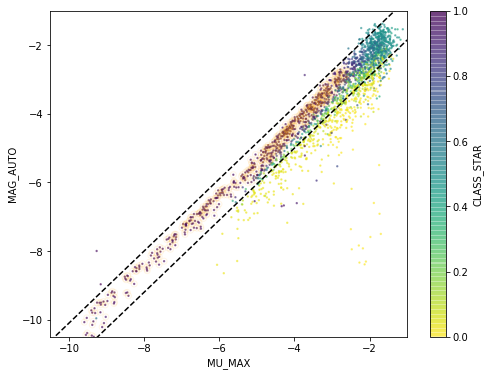

In [2]:
# Star cond
plt.figure(figsize=(8,6))
mag_auto = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"])
plt.scatter(Datacube.Tab_SE["MU_MAX"], mag_auto,
            c = Datacube.Tab_SE["CLASS_STAR"], s=2, cmap='viridis_r', alpha=0.5)

xx = np.linspace(-10.5,-1,100)
plt.plot(xx, 1.05*xx-0.8, 'k--', xx, 1.05*xx+0.4, 'k--')
plt.xlabel("MU_MAX")
plt.ylabel("MAG_AUTO")
plt.xlim(-10.5,-1.)
plt.ylim(-10.5,-1.)
cb = plt.colorbar()
cb.set_label("CLASS_STAR")
star_cond = (abs(mag_auto-1.05*Datacube.Tab_SE["MU_MAX"]  + 0.2)<0.6) & (Datacube.Tab_SE['CLASS_STAR']>0.9)
plt.scatter(Datacube.Tab_SE["MU_MAX"][star_cond], mag_auto[star_cond],facecolors='none',color='orange',alpha=0.1)
np.sum(star_cond)

In [5]:
Y_pix, X_pix = np.indices(Datacube.mask_edge.shape)
dist_edge = np.array([np.sqrt((X_pix[~Datacube.mask_edge]-gal["X_IMAGE"])**2 + \
                              (Y_pix[~Datacube.mask_edge]-gal["Y_IMAGE"])**2).min() \
                      for gal in Datacube.Tab_SE])

80
62
6.414564561348749
4.2747332863589635


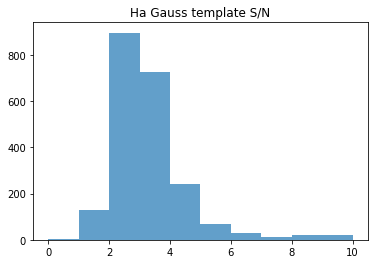

In [6]:
# Gaussian library Ha template (New CC method)
inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
SNRp_best_Ha = np.array([Datacube.CC_SNR_ps_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])

plt.hist(SNR_best_Ha,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("Ha Gauss template S/N")

cond0 = (SNR_best_Ha>7) & (dist_edge>5)  
cond2 = (SNR_best_Ha>5) & (SNR_best_Ha<7) & (SNRp_best_Ha>4) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond0))
print(np.sum(cond2))

print(np.percentile(SNR_best_Ha, 95))
print(np.percentile(SNR_best_Ha, 85))

62
Best z: 0.24563762369525183 Best sigma: 2.4292934696215904
SE Object #7  z: 0.246  Peak R: 5.510  Detction S/N: 5.132 Peak S/N: 4.213


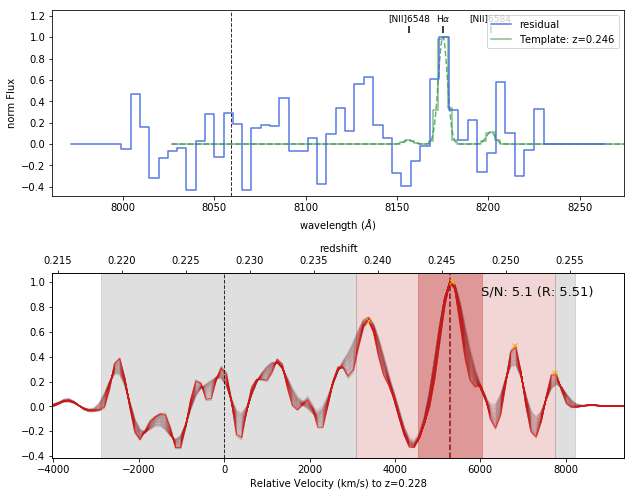

Best z: 0.2345023032233762 Best sigma: 5.155358676144076
SE Object #114  z: 0.235  Peak R: 1.767  Detction S/N: 5.589 Peak S/N: 4.805


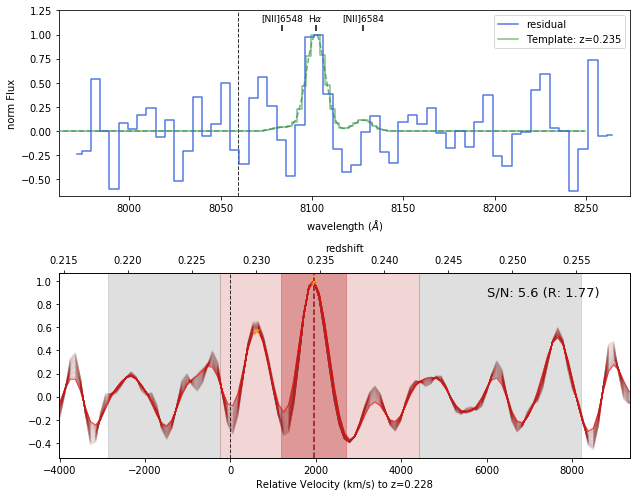

Best z: 0.232157235435811 Best sigma: 2.4292934696215904
SE Object #144  z: 0.232  Peak R: 2.213  Detction S/N: 5.628 Peak S/N: 5.018


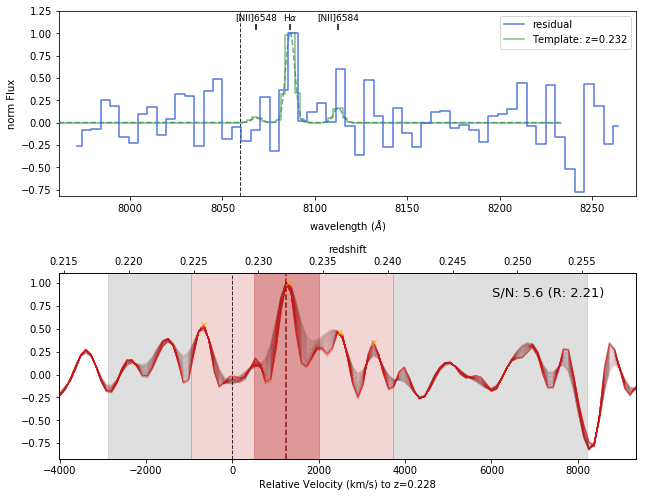

Best z: 0.24246576763420694 Best sigma: 5.155358676144076
SE Object #167  z: 0.242  Peak R: 6.162  Detction S/N: 6.313 Peak S/N: 6.956


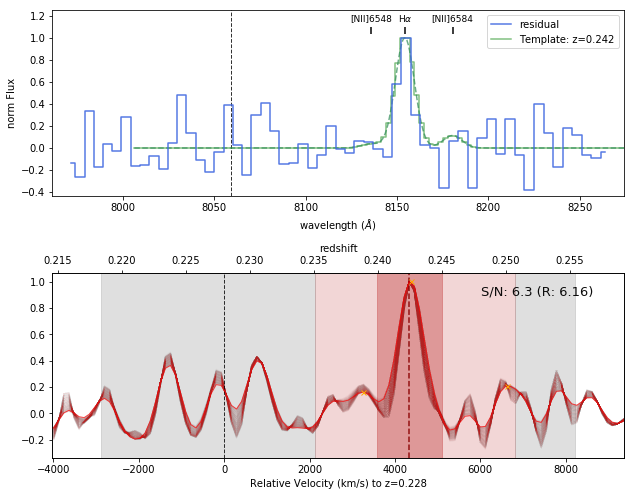

Best z: 0.24048335759605385 Best sigma: 4.316569381829465
SE Object #224  z: 0.240  Peak R: 2.749  Detction S/N: 5.442 Peak S/N: 4.114


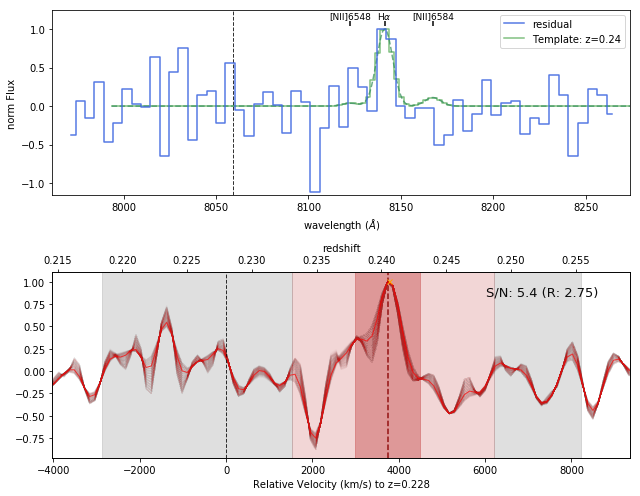

Best z: 0.2563426379012784 Best sigma: 2.848688116778896
SE Object #227  z: 0.256  Peak R: 1.000  Detction S/N: 5.990 Peak S/N: 6.029


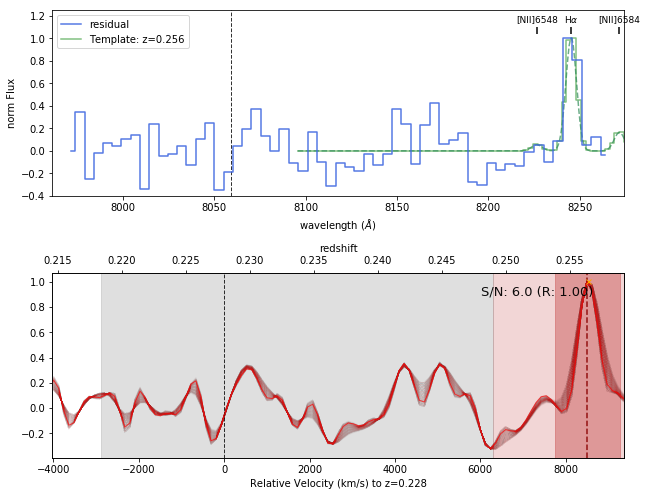

Best z: 0.2198324689410435 Best sigma: 5.155358676144076
SE Object #228  z: 0.220  Peak R: 6.550  Detction S/N: 6.269 Peak S/N: 5.761


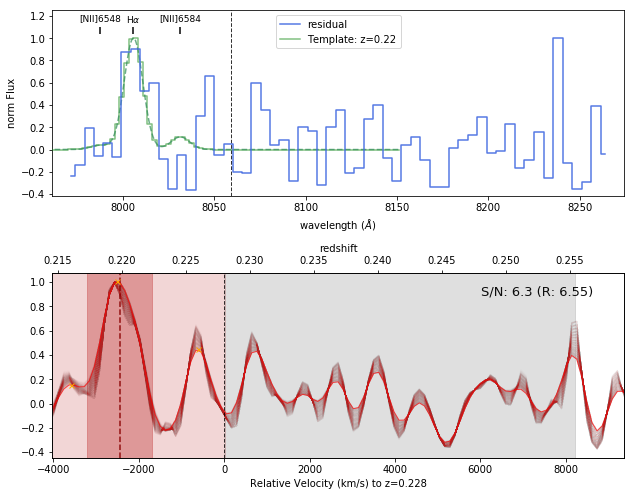

Best z: 0.25511936762016807 Best sigma: 5.155358676144076
SE Object #267  z: 0.255  Peak R: 3.333  Detction S/N: 5.050 Peak S/N: 4.784


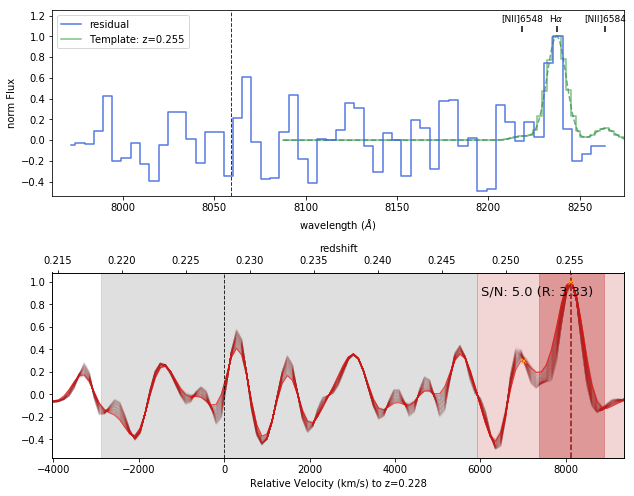

Best z: 0.24481083542177215 Best sigma: 5.155358676144076
SE Object #313  z: 0.245  Peak R: 4.675  Detction S/N: 5.324 Peak S/N: 4.645


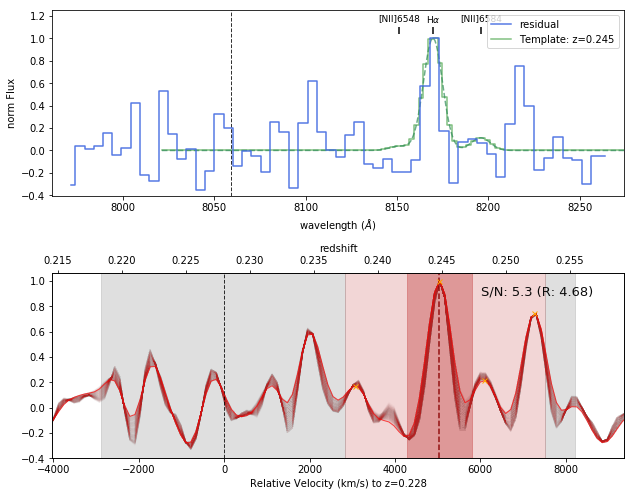

Best z: 0.24524114168762123 Best sigma: 4.945661352565423
SE Object #335  z: 0.245  Peak R: 9.600  Detction S/N: 5.480 Peak S/N: 4.387


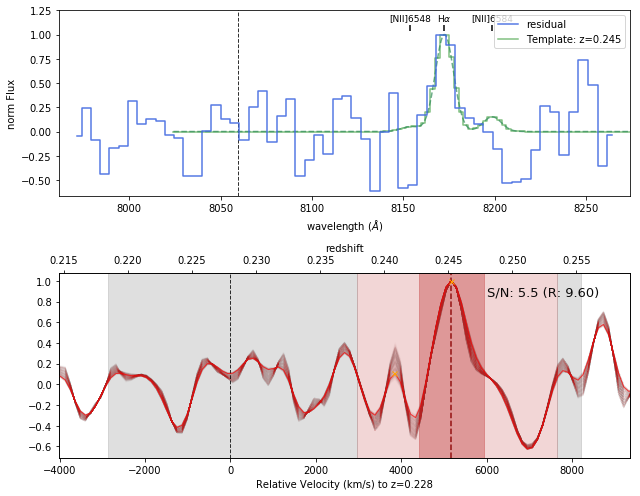

Best z: 0.2170570948876292 Best sigma: 5.155358676144076
SE Object #361  z: 0.217  Peak R: 2.613  Detction S/N: 6.258 Peak S/N: 5.595


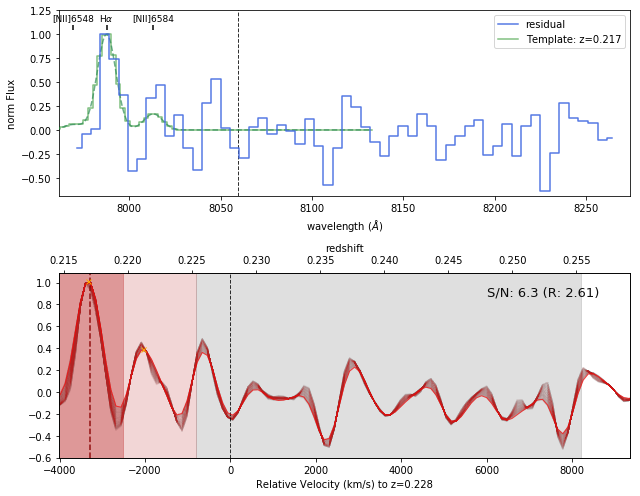

Best z: 0.254756709870756 Best sigma: 5.155358676144076
SE Object #374  z: 0.255  Peak R: 1.000  Detction S/N: 5.324 Peak S/N: 5.375


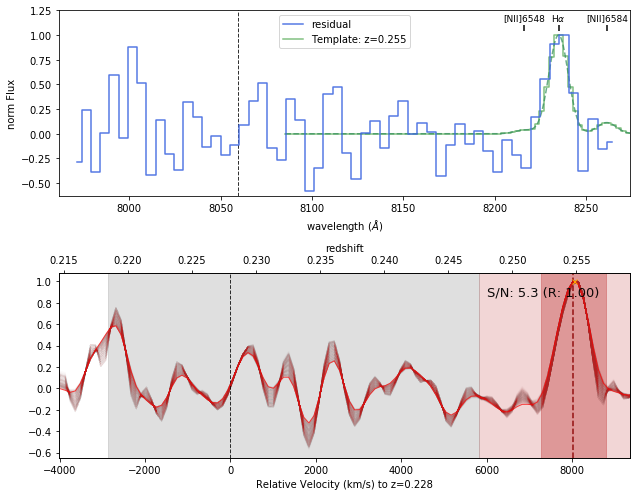

Best z: 0.2543602278631254 Best sigma: 4.526266705408118
SE Object #381  z: 0.254  Peak R: 9.656  Detction S/N: 5.067 Peak S/N: 5.116


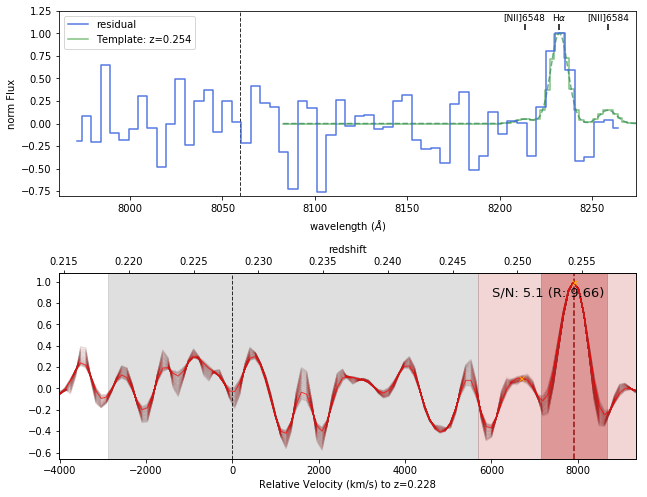

Best z: 0.23688119526915988 Best sigma: 4.526266705408118
SE Object #417  z: 0.237  Peak R: 6.397  Detction S/N: 5.716 Peak S/N: 5.682


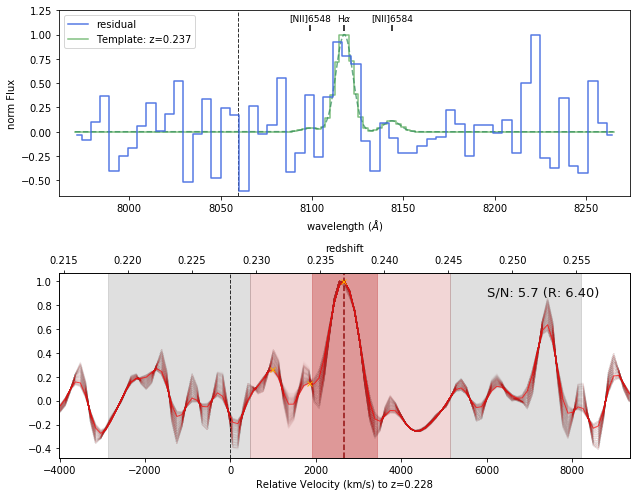

Best z: 0.22303814926030688 Best sigma: 5.155358676144076
SE Object #431  z: 0.223  Peak R: 1.571  Detction S/N: 5.069 Peak S/N: 4.643


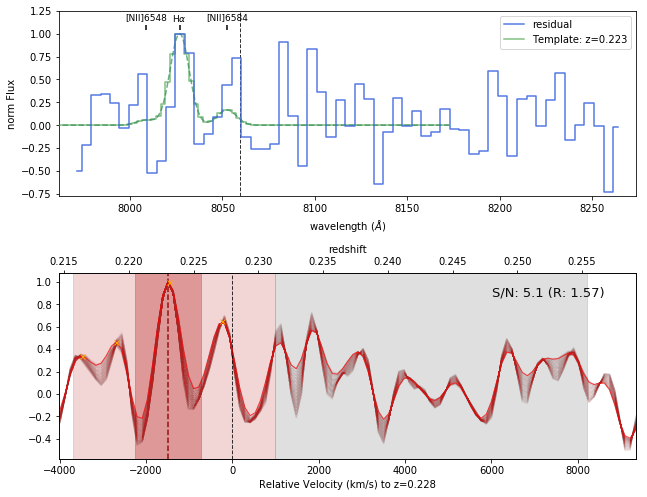

Best z: 0.22581352331372115 Best sigma: 2.219596146042938
SE Object #444  z: 0.226  Peak R: 3.158  Detction S/N: 5.931 Peak S/N: 4.057


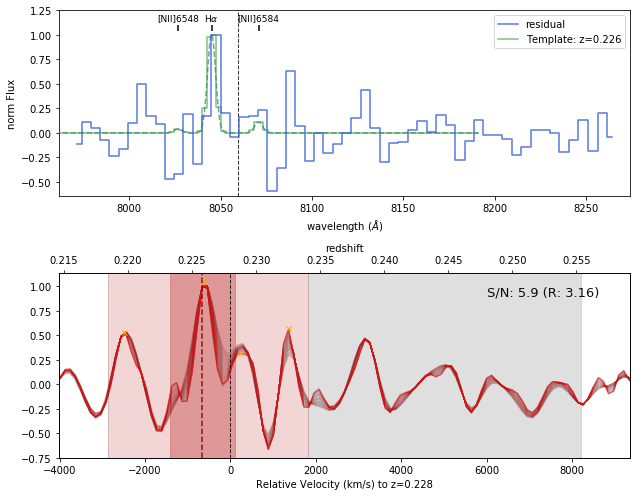

Best z: 0.2436213893988803 Best sigma: 4.735964028986771
SE Object #562  z: 0.244  Peak R: 7.389  Detction S/N: 5.308 Peak S/N: 4.764


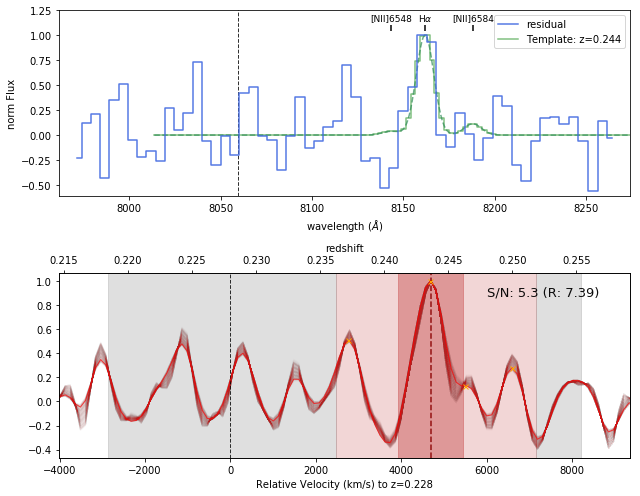

Best z: 0.2491721375057089 Best sigma: 5.155358676144076
SE Object #574  z: 0.249  Peak R: 4.323  Detction S/N: 6.374 Peak S/N: 6.068


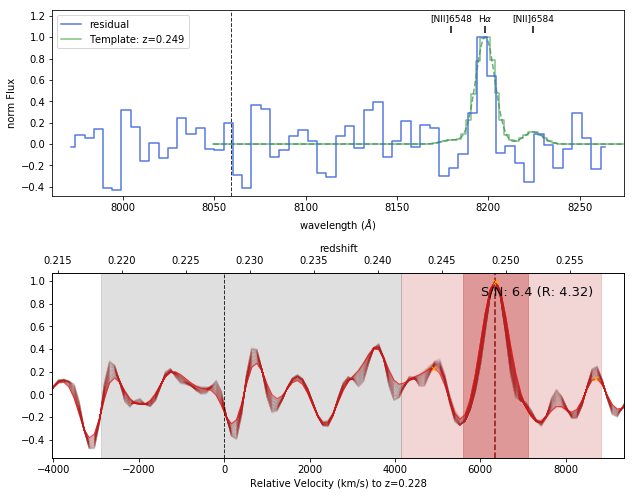

Best z: 0.2543602278631254 Best sigma: 5.155358676144076
SE Object #751  z: 0.254  Peak R: 5.143  Detction S/N: 6.346 Peak S/N: 6.052


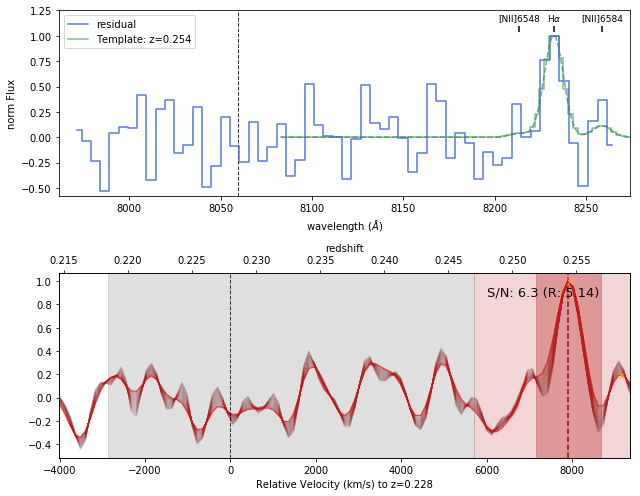

Best z: 0.2495686195133395 Best sigma: 5.155358676144076
SE Object #791  z: 0.250  Peak R: 4.464  Detction S/N: 5.599 Peak S/N: 5.976


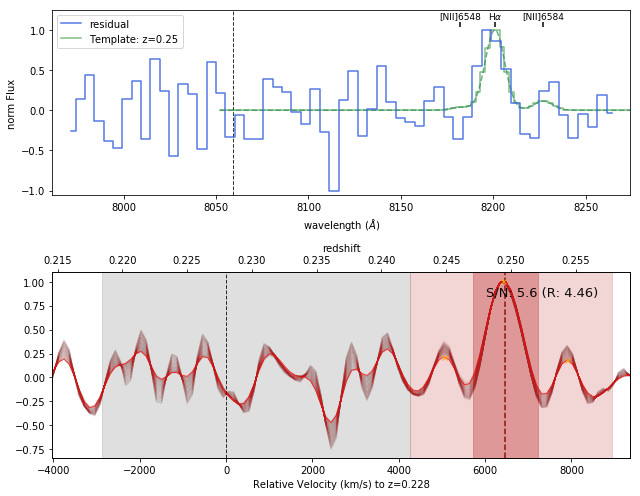

Best z: 0.21903950492578225 Best sigma: 3.687477411093507
SE Object #900  z: 0.219  Peak R: 9.858  Detction S/N: 5.986 Peak S/N: 5.820


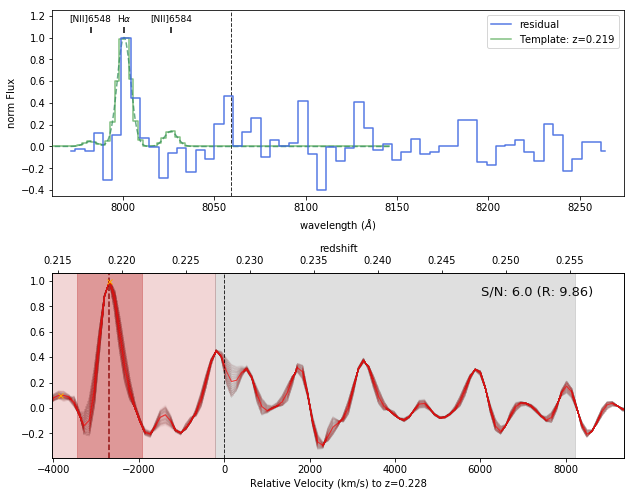

Best z: 0.2202289509486741 Best sigma: 3.2680827639362016
SE Object #938  z: 0.220  Peak R: 9.230  Detction S/N: 5.445 Peak S/N: 5.205


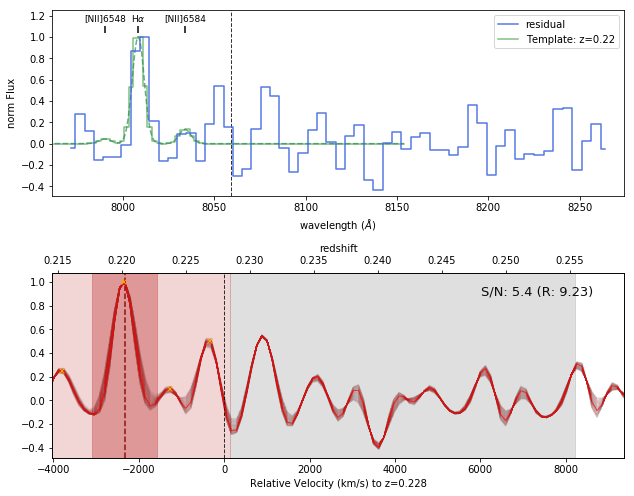

Best z: 0.22502055929845993 Best sigma: 5.155358676144076
SE Object #946  z: 0.225  Peak R: 6.598  Detction S/N: 6.896 Peak S/N: 6.915


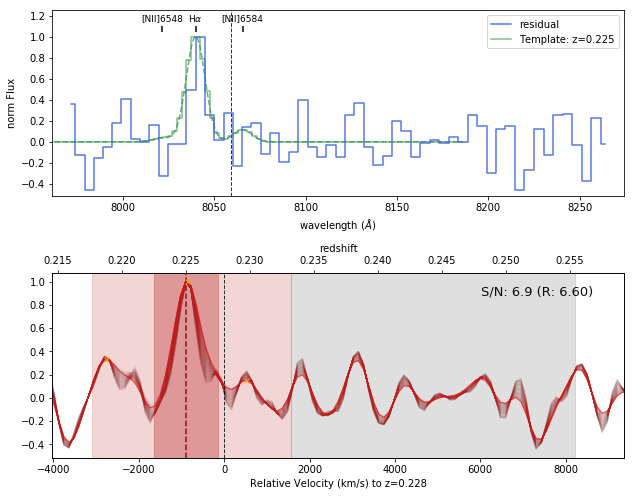

Best z: 0.25356726384786415 Best sigma: 4.945661352565423
SE Object #1082  z: 0.254  Peak R: 8.338  Detction S/N: 6.853 Peak S/N: 6.988


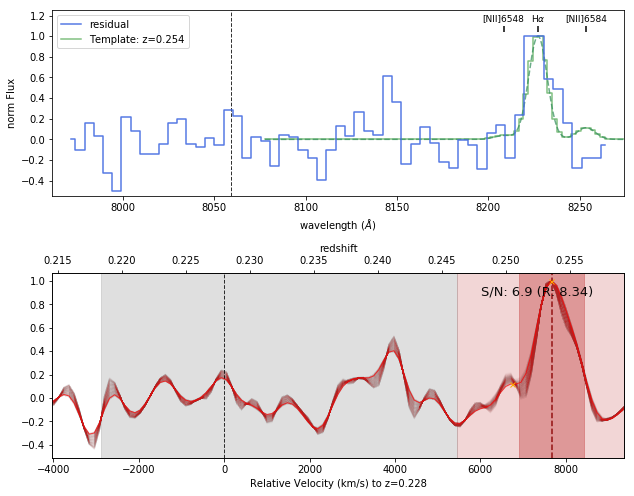

Best z: 0.2543264036049069 Best sigma: 5.155358676144076
SE Object #1085  z: 0.254  Peak R: 5.305  Detction S/N: 6.017 Peak S/N: 5.886


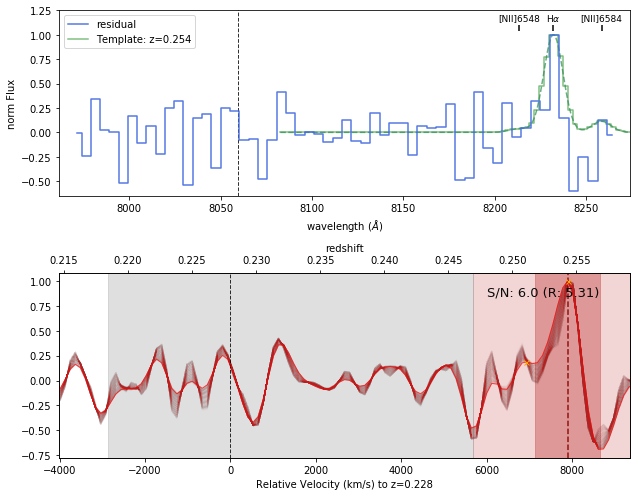

Best z: 0.22657266307076393 Best sigma: 3.2680827639362016
SE Object #1109  z: 0.227  Peak R: 2.241  Detction S/N: 6.968 Peak S/N: 4.723


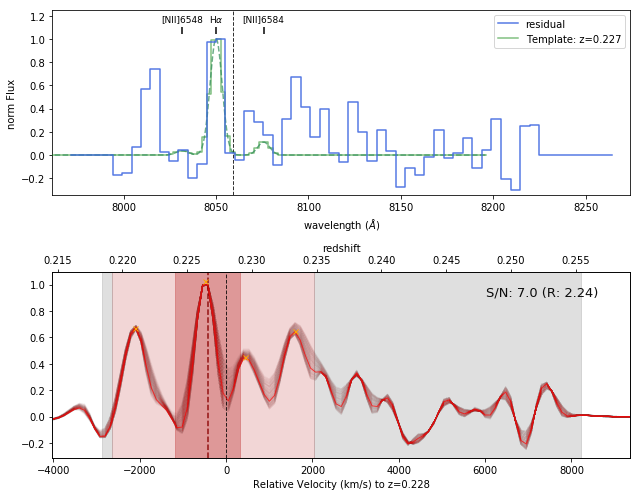

Best z: 0.22102191496393533 Best sigma: 3.2680827639362016
SE Object #1169  z: 0.221  Peak R: 5.063  Detction S/N: 5.240 Peak S/N: 5.432


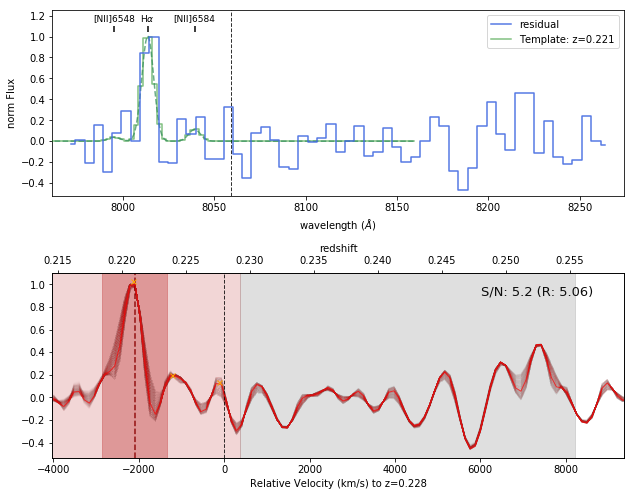

Best z: 0.2206254329563047 Best sigma: 5.155358676144076
SE Object #1196  z: 0.221  Peak R: 5.590  Detction S/N: 5.314 Peak S/N: 4.864


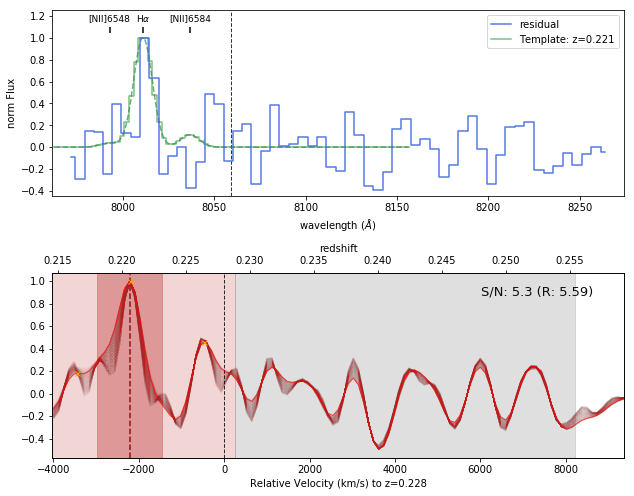

Best z: 0.21629795513058644 Best sigma: 2.219596146042938
SE Object #1205  z: 0.216  Peak R: 7.979  Detction S/N: 6.605 Peak S/N: 6.357


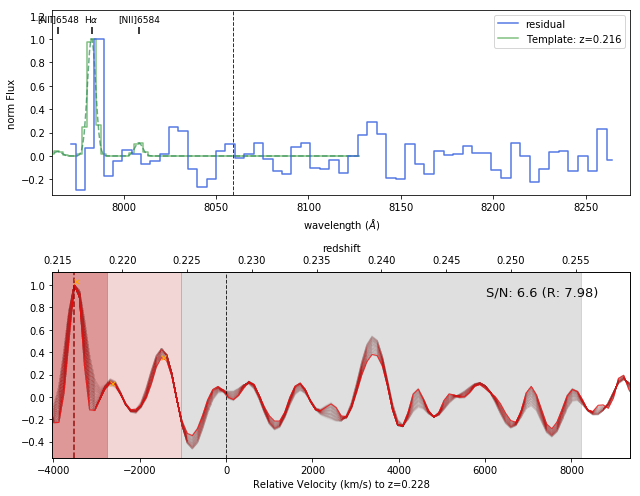

Best z: 0.2436213893988803 Best sigma: 5.155358676144076
SE Object #1263  z: 0.244  Peak R: 2.525  Detction S/N: 5.099 Peak S/N: 4.229


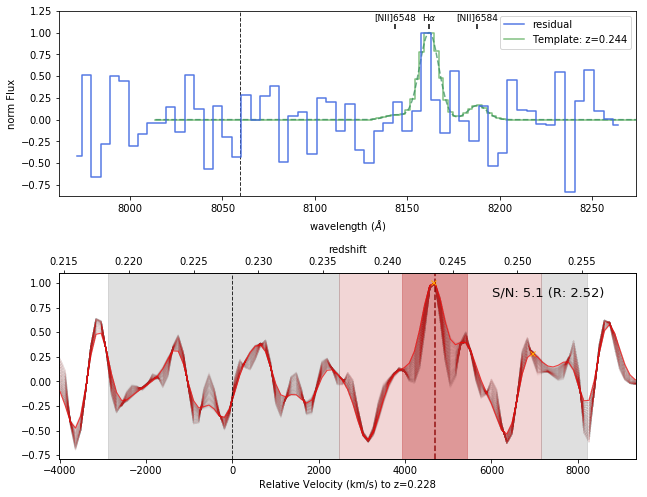

Best z: 0.2543602278631254 Best sigma: 2.219596146042938
SE Object #1267  z: 0.254  Peak R: 2.910  Detction S/N: 6.255 Peak S/N: 6.056


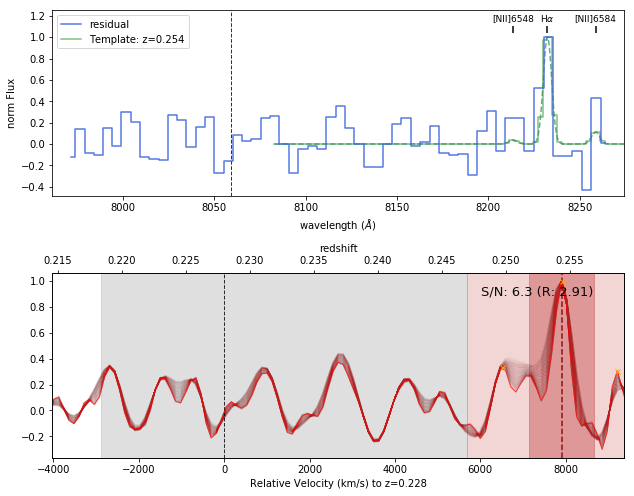

Best z: 0.2348987852310068 Best sigma: 5.155358676144076
SE Object #1279  z: 0.235  Peak R: 1.690  Detction S/N: 5.451 Peak S/N: 4.500


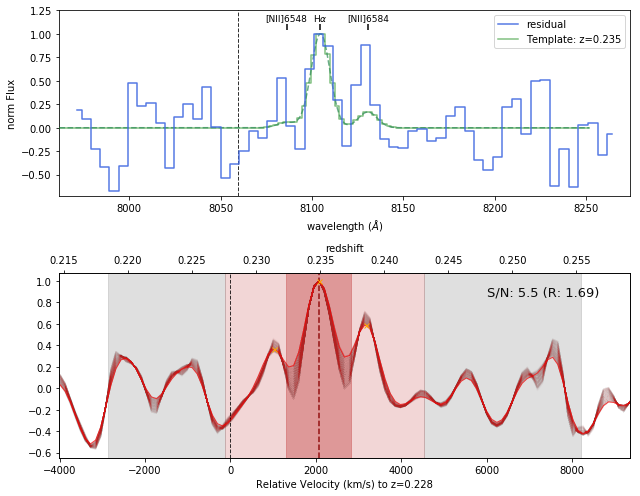

Best z: 0.21666061287999858 Best sigma: 2.219596146042938
SE Object #1293  z: 0.217  Peak R: 2.982  Detction S/N: 5.201 Peak S/N: 5.052


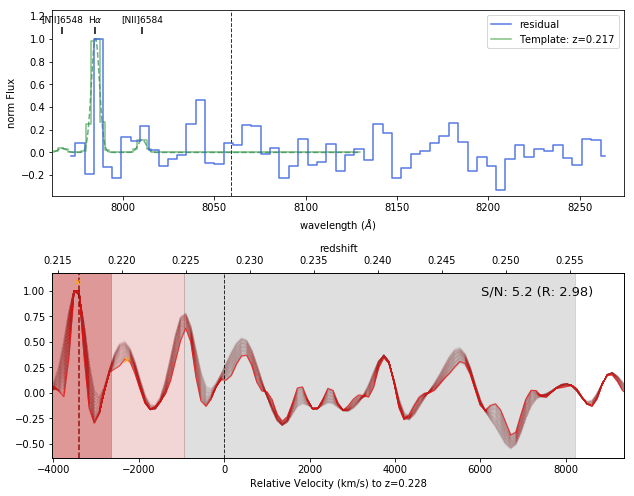

Best z: 0.22696914507839452 Best sigma: 3.058385440357549
SE Object #1323  z: 0.227  Peak R: 4.866  Detction S/N: 6.864 Peak S/N: 6.527


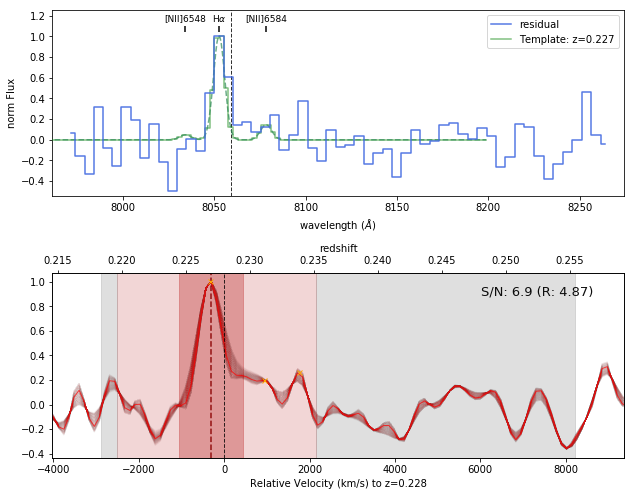

Best z: 0.23929391157316202 Best sigma: 5.155358676144076
SE Object #1337  z: 0.239  Peak R: 1.761  Detction S/N: 5.549 Peak S/N: 4.059


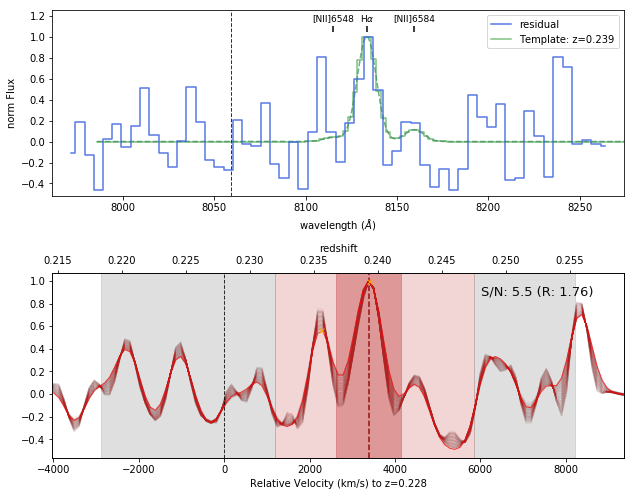

Best z: 0.2345023032233762 Best sigma: 5.155358676144076
SE Object #1378  z: 0.235  Peak R: 2.617  Detction S/N: 5.276 Peak S/N: 5.503


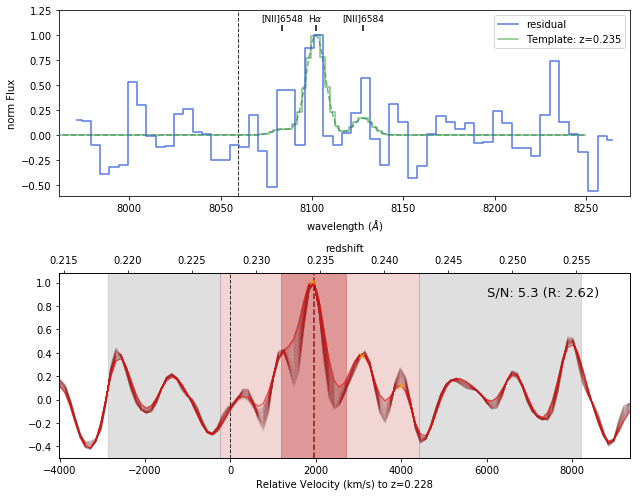

Best z: 0.25554967388601724 Best sigma: 5.155358676144076
SE Object #1382  z: 0.256  Peak R: 1.000  Detction S/N: 5.173 Peak S/N: 4.251


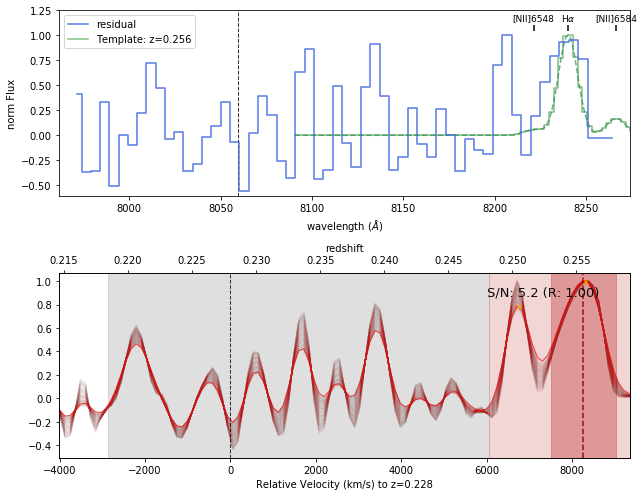

Best z: 0.2348987852310068 Best sigma: 3.058385440357549
SE Object #1392  z: 0.235  Peak R: 1.391  Detction S/N: 5.973 Peak S/N: 4.842


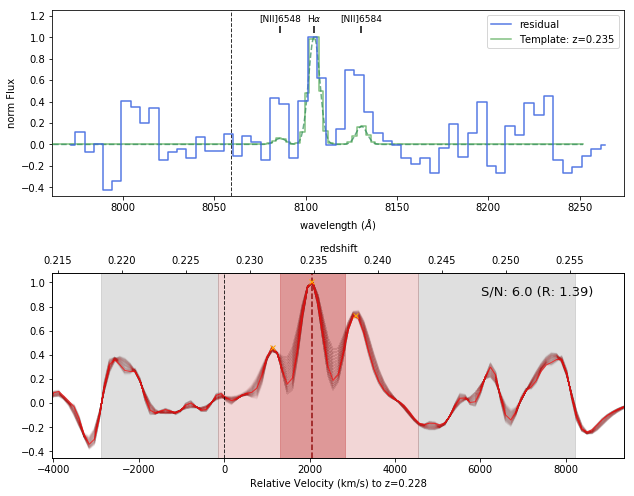

Best z: 0.21629795513058644 Best sigma: 5.155358676144076
SE Object #1429  z: 0.216  Peak R: 1.507  Detction S/N: 5.319 Peak S/N: 4.877


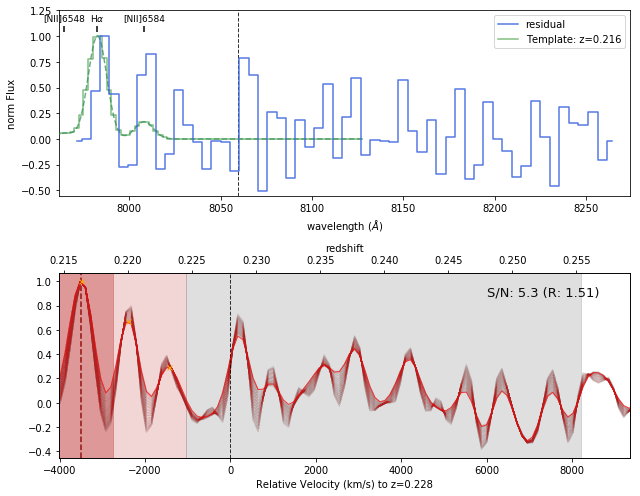

Best z: 0.24880947975629675 Best sigma: 5.155358676144076
SE Object #1456  z: 0.249  Peak R: 3.911  Detction S/N: 6.660 Peak S/N: 6.832


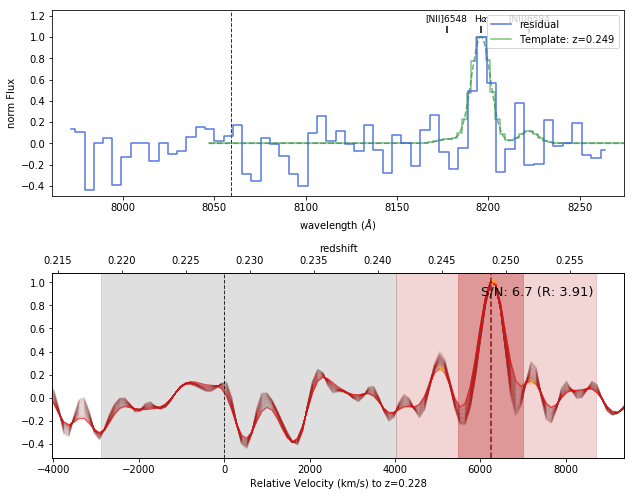

Best z: 0.2246240772908293 Best sigma: 4.735964028986771
SE Object #1467  z: 0.225  Peak R: 2.679  Detction S/N: 5.344 Peak S/N: 4.707


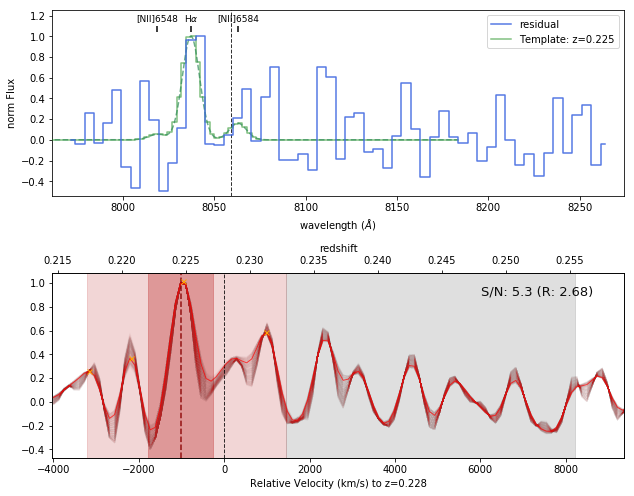

Best z: 0.22419377102498025 Best sigma: 5.155358676144076
SE Object #1540  z: 0.224  Peak R: 6.214  Detction S/N: 5.505 Peak S/N: 5.773


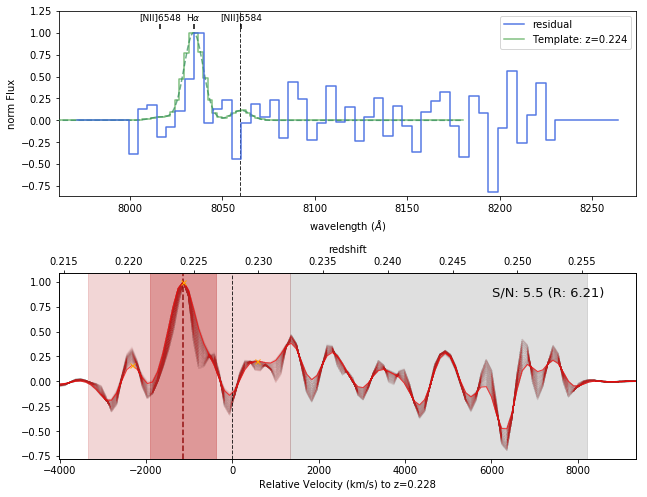

Best z: 0.21864302291815166 Best sigma: 4.735964028986771
SE Object #1542  z: 0.219  Peak R: 9.597  Detction S/N: 5.507 Peak S/N: 5.819


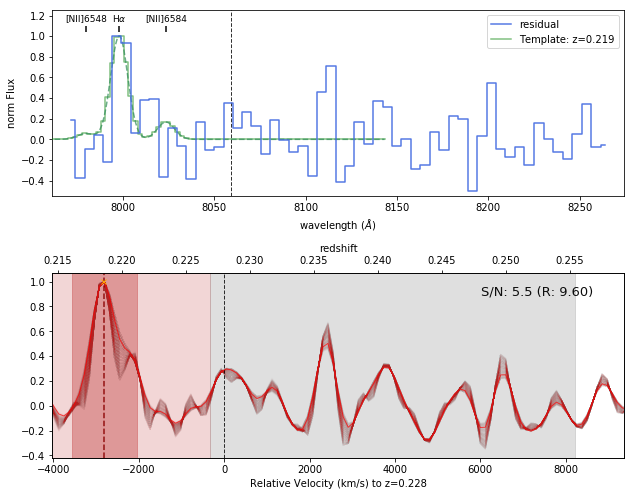

Best z: 0.24877565549807829 Best sigma: 5.155358676144076
SE Object #1609  z: 0.249  Peak R: 8.489  Detction S/N: 6.668 Peak S/N: 6.067


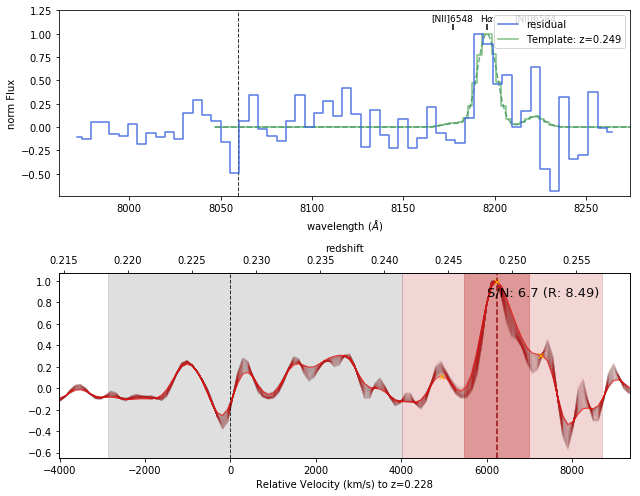

Best z: 0.2202289509486741 Best sigma: 5.155358676144076
SE Object #1616  z: 0.220  Peak R: 5.699  Detction S/N: 5.549 Peak S/N: 5.693


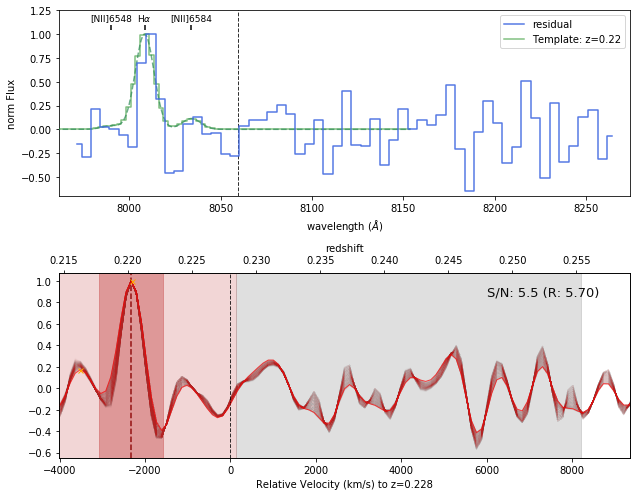

Best z: 0.25396374585549475 Best sigma: 3.477780087514854
SE Object #1625  z: 0.254  Peak R: 1.803  Detction S/N: 5.355 Peak S/N: 4.990


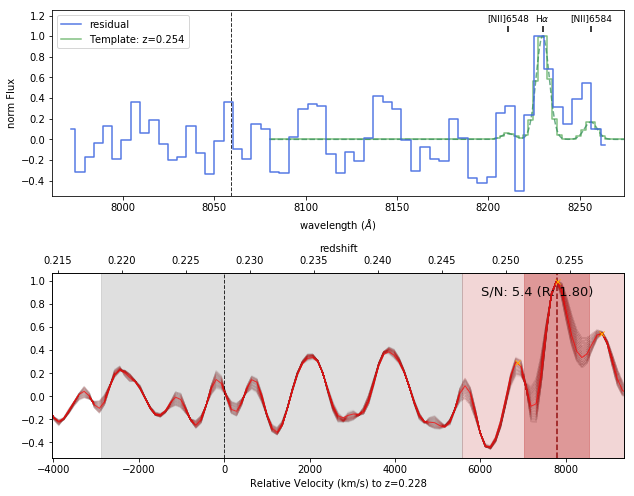

Best z: 0.24877565549807829 Best sigma: 5.155358676144076
SE Object #1630  z: 0.249  Peak R: 2.728  Detction S/N: 5.106 Peak S/N: 4.995


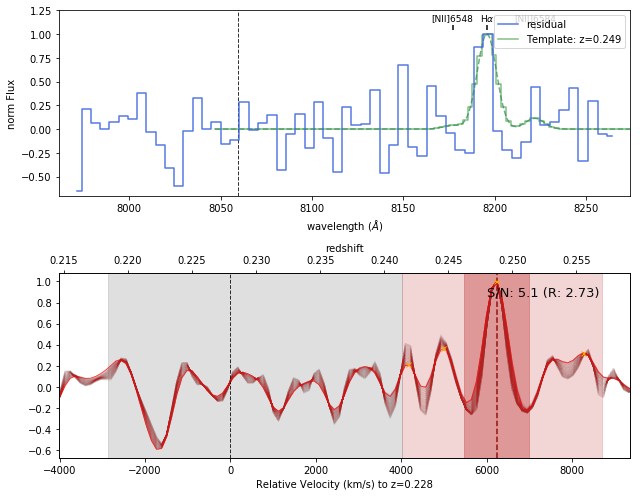

Best z: 0.22221136098682717 Best sigma: 4.945661352565423
SE Object #1680  z: 0.222  Peak R: 1.212  Detction S/N: 5.350 Peak S/N: 4.028


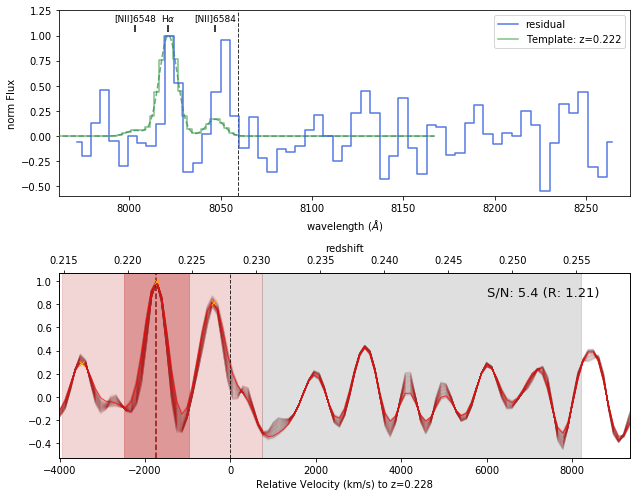

Best z: 0.24124249735309664 Best sigma: 5.155358676144076
SE Object #1712  z: 0.241  Peak R: 3.339  Detction S/N: 6.963 Peak S/N: 5.424


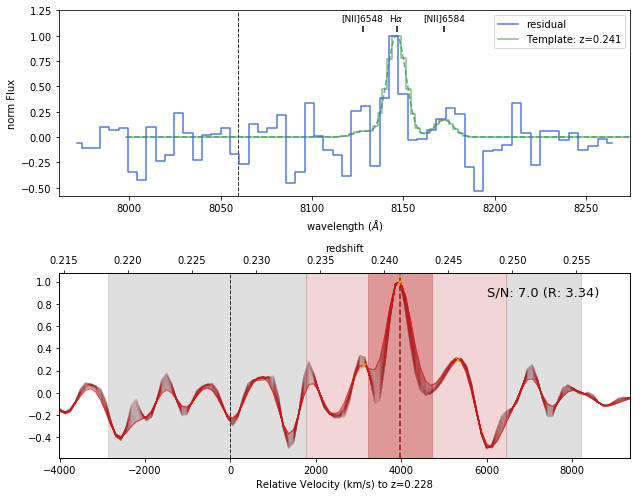

Best z: 0.2404495333378354 Best sigma: 5.155358676144076
SE Object #1728  z: 0.240  Peak R: 1.457  Detction S/N: 6.724 Peak S/N: 5.269


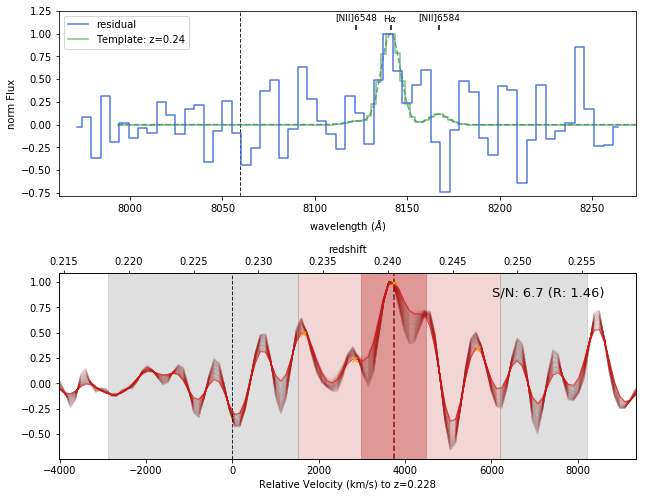

Best z: 0.2523439935667538 Best sigma: 5.155358676144076
SE Object #1729  z: 0.252  Peak R: 8.996  Detction S/N: 6.426 Peak S/N: 6.017


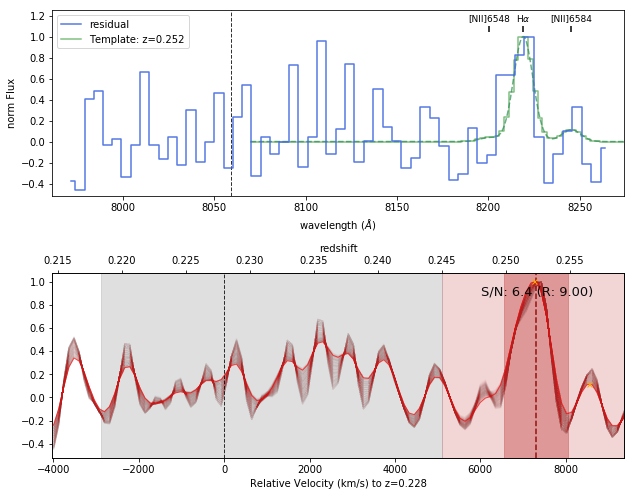

Best z: 0.2361220555121171 Best sigma: 5.155358676144076
SE Object #1746  z: 0.236  Peak R: 2.669  Detction S/N: 5.081 Peak S/N: 4.735


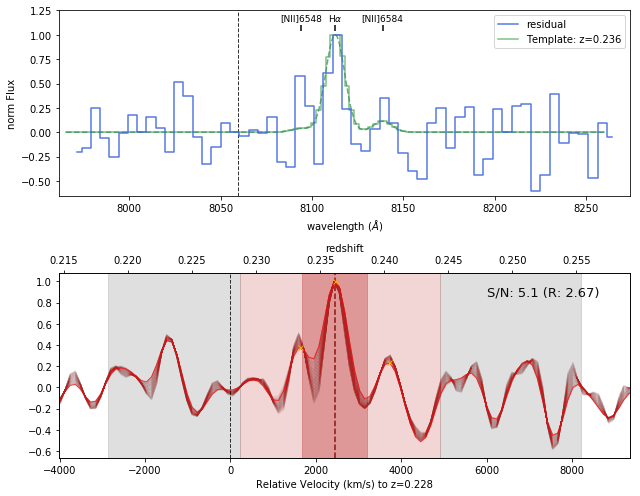

Best z: 0.24203546136835785 Best sigma: 4.106872058250813
SE Object #1758  z: 0.242  Peak R: 9.095  Detction S/N: 5.766 Peak S/N: 6.193


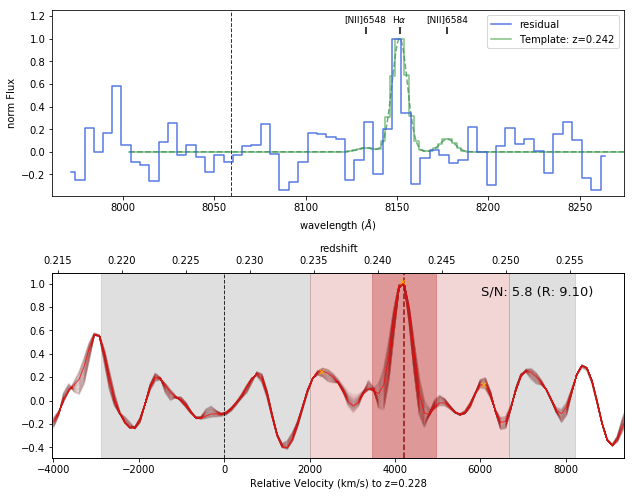

Best z: 0.25353343958964564 Best sigma: 5.155358676144076
SE Object #1827  z: 0.254  Peak R: 2.506  Detction S/N: 5.302 Peak S/N: 4.617


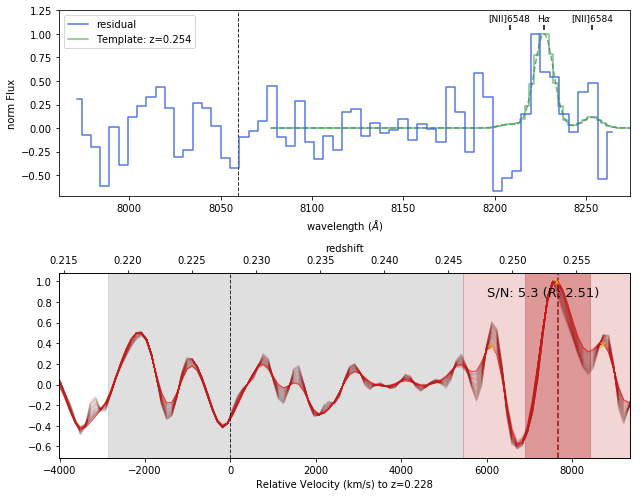

Best z: 0.22303814926030688 Best sigma: 2.848688116778896
SE Object #1909  z: 0.223  Peak R: 2.694  Detction S/N: 5.784 Peak S/N: 6.063


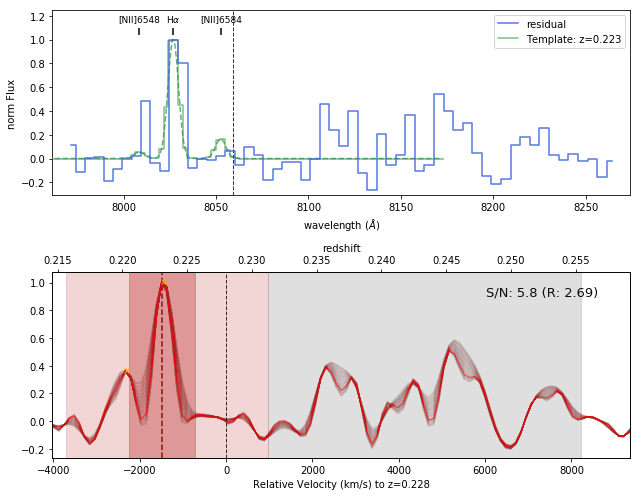

Best z: 0.2261761810631333 Best sigma: 4.945661352565423
SE Object #1917  z: 0.226  Peak R: 3.625  Detction S/N: 5.151 Peak S/N: 5.597


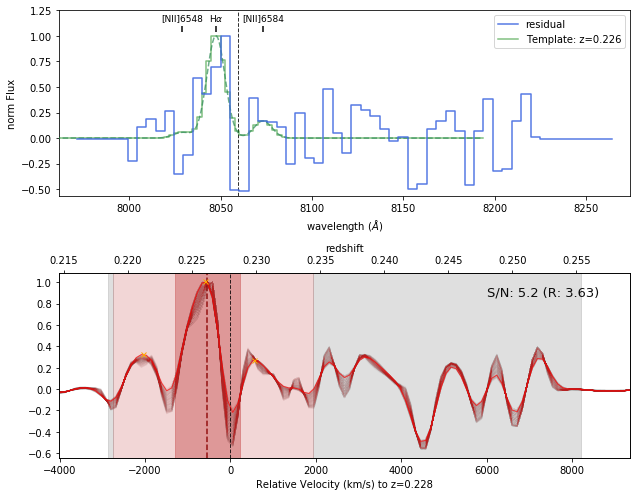

Best z: 0.23014100113943944 Best sigma: 5.155358676144076
SE Object #1923  z: 0.230  Peak R: 2.126  Detction S/N: 5.256 Peak S/N: 4.044


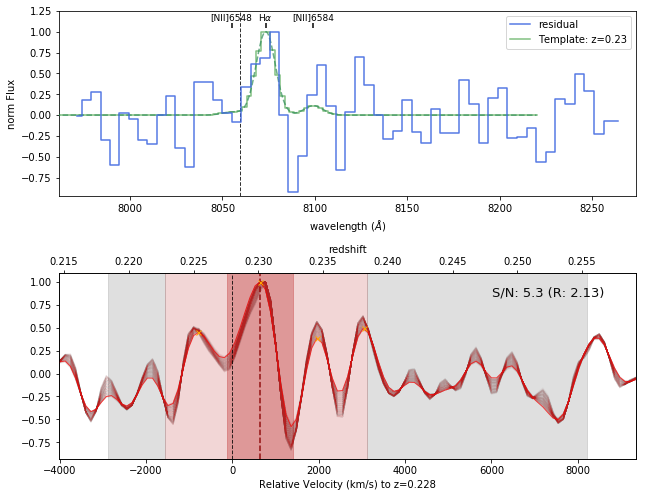

Best z: 0.21669443713821704 Best sigma: 5.155358676144076
SE Object #1930  z: 0.217  Peak R: 3.083  Detction S/N: 6.379 Peak S/N: 6.317


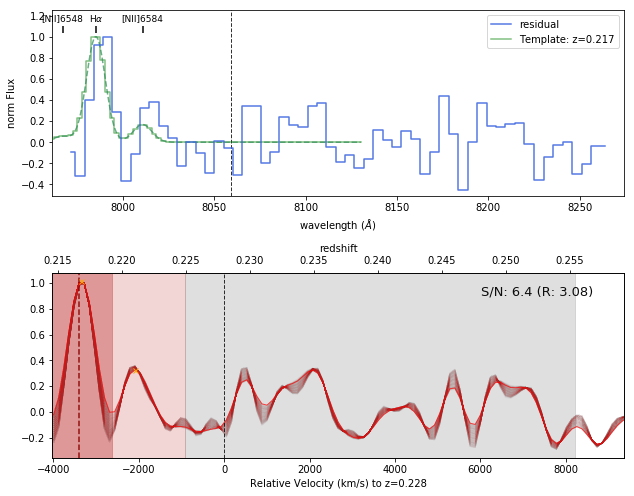

Best z: 0.22855507310891698 Best sigma: 5.155358676144076
SE Object #2047  z: 0.229  Peak R: 2.160  Detction S/N: 5.469 Peak S/N: 5.017


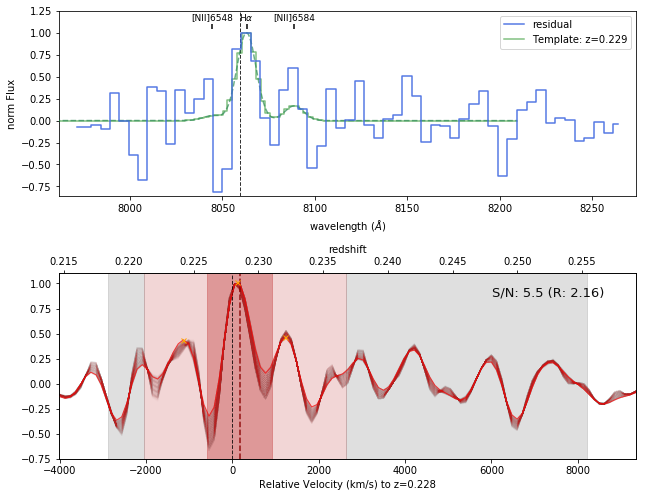

Best z: 0.21666061287999858 Best sigma: 2.219596146042938
SE Object #2137  z: 0.217  Peak R: 9.036  Detction S/N: 6.978 Peak S/N: 7.293


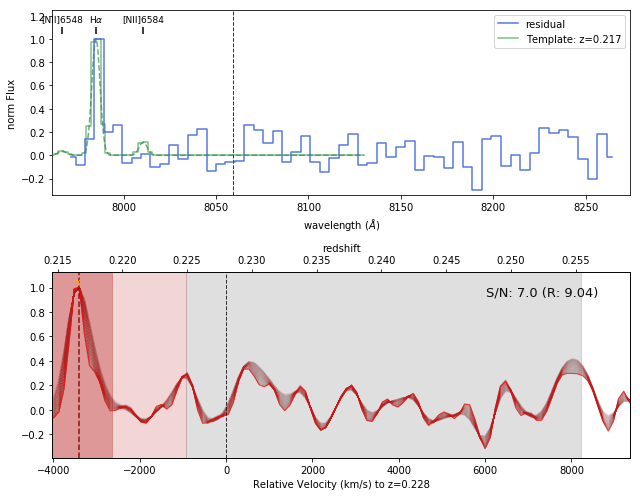

Best z: 0.21666061287999858 Best sigma: 5.155358676144076
SE Object #2160  z: 0.217  Peak R: 9.351  Detction S/N: 5.171 Peak S/N: 5.186


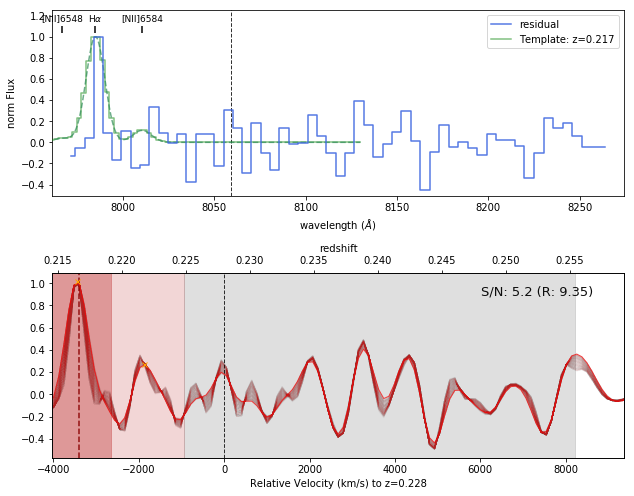

Best z: 0.25079188979444983 Best sigma: 5.155358676144076
SE Object #2172  z: 0.251  Peak R: 2.280  Detction S/N: 5.403 Peak S/N: 4.616


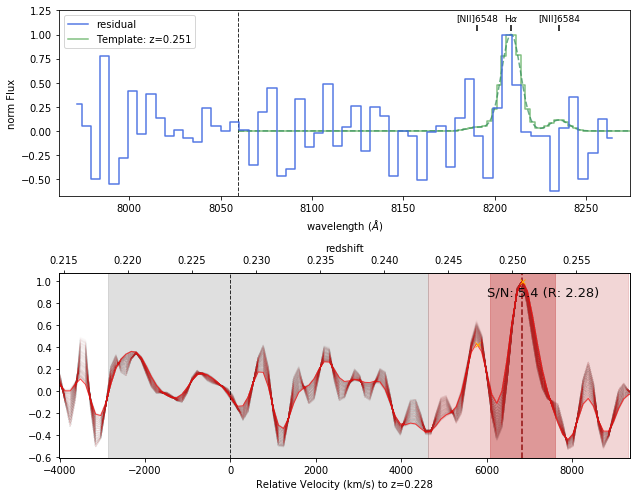

In [15]:
cond = cond0
print(np.sum(cond))
for j, (cc_num) in enumerate(Datacube.cc_nums[cond]):
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num, 
                                                                             temp_type="Ha-NII", temp_model="gauss")
    plt.savefig("./A2390C/fig/xcorr_v3_tot/SNa/CC#%d.png"%(cc_num), dpi=100)
    plt.show()
    plt.close()

45


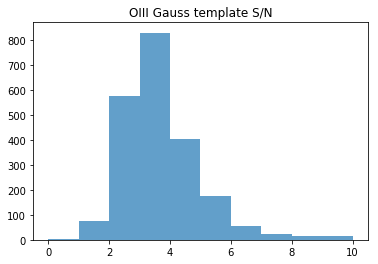

In [15]:
# Gaussian library Hb template (New CC method)
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

plt.hist(SNR_best_Hb,range=[0,10],bins=np.array([0,1,2,3,4,5,6,7,8,10]),alpha=0.7)
plt.title("OIII Gauss template S/N")

cond_b = (SNR_best_Hb>6) & (SNR_best_Ha>3) & (SNR_best_Ha<5) & (dist_edge>5) & (~star_cond)  

print(np.sum(cond_b))

45
S/N Ha: 3.73301952394043
Best z: 0.6446356564858586 Best sigma: 2.219596146042938
SE Object #100  z: 0.645  Peak R: 1.002  Detction S/N: 6.373 Peak S/N: 6.373


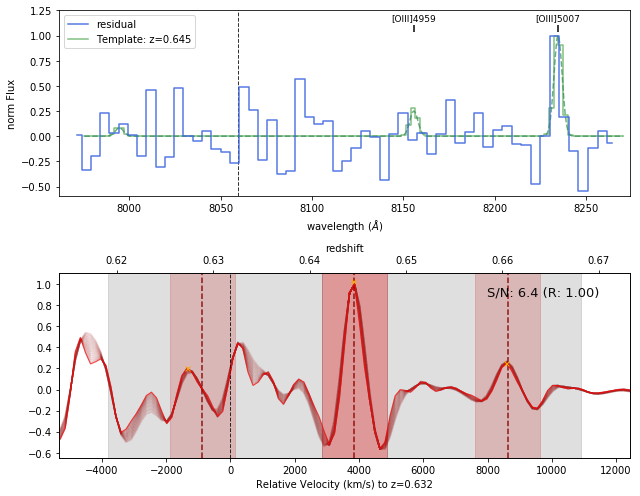

S/N Ha: 3.5877261671536798
Best z: 0.6125052528886324 Best sigma: 5.155358676144076
SE Object #158  z: 0.613  Peak R: 3.271  Detction S/N: 6.779 Peak S/N: 6.779


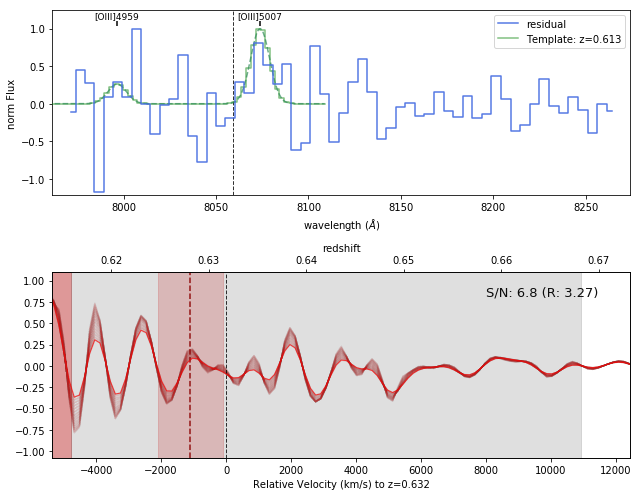

S/N Ha: 4.09421250889583
Best z: 0.6204005633213178 Best sigma: 5.155358676144076
SE Object #200  z: 0.620  Peak R: 1.101  Detction S/N: 8.793 Peak S/N: 8.793


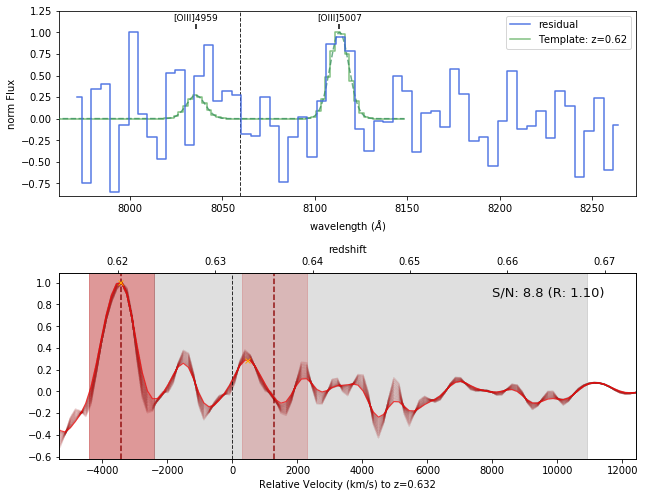

S/N Ha: 3.0243956849844116


KeyboardInterrupt: 

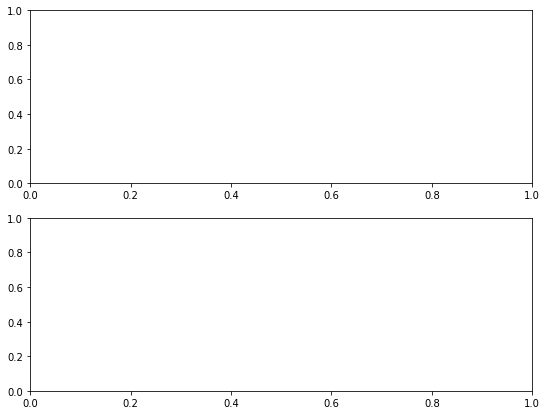

In [26]:
cond = (SNR_best_Hb>6) & (SNR_best_Ha>3) & (SNR_best_Ha<5) & (dist_edge>5) & (~star_cond)  
print(np.sum(cond))
for j, (cc_num) in enumerate(np.int64(Datacube.cc_nums[cond])):
    print("S/N Ha:",SNR_best_Ha[cc_num-1])
    ccs, rv, z_ccs, Rs, Contrasts, SNRs, SNR_ps = Datacube.cross_correlation(cc_num,
                                                                            temp_type="Hb-OIII", temp_model="gauss")
#     plt.savefig("./A2390C/fig/xcorr_v3_tot/SNc/CC#%d.png"%(cc_num), dpi=100)
    plt.show()
    plt.close()

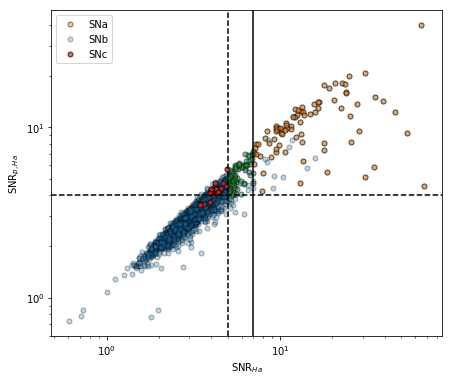

In [37]:
# Ha + Hb
plt.figure(figsize=(7,6))
plt.loglog(SNR_best_Ha, SNRp_best_Ha, ".", ms=10, mec='k', alpha=0.3)
plt.loglog(SNR_best_Ha[cond0], SNRp_best_Ha[cond0], ".", mec='k', ms=10, alpha=0.5, label="SNa")
plt.loglog(SNR_best_Ha[cond2], SNRp_best_Ha[cond2], ".", mec='k', ms=10, alpha=0.3, label="SNb")
plt.loglog(SNR_best_Ha[cond_b], SNRp_best_Ha[cond_b], ".", mec='k', ms=10, alpha=0.7, label="SNc")
plt.axvline(7, ls='-', color='k')
plt.axvline(5, ls='--', color='k')
plt.axhline(4, ls='--', color='k')
plt.xlabel("SNR$_{Ha}$")
plt.ylabel("SNR$_{p,Ha}$")
plt.legend(loc=2)

In [20]:
#Composite 
import re
import glob
el_ls = glob.glob("./A2390C/fig/xcorr_v3_tot/SNc/*.png")
for el in el_ls:
    img_cc = plt.imread(el)
    ind = re.compile(r'\d+').findall(el)[-1]
    img_confit = plt.imread("./A2390C/fig/fit_cont/SE#%s.png"%ind)
    img_spec = plt.imread("./A2390C/fig/spec_v2/SE#%s.png"%ind)
    img_thumb = plt.imread("./A2390C/fig/img_thumb_v2/SE#%s.png"%ind)
    plt.figure(figsize=(16,12))
    ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
    ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
    ax1.imshow(img_confit)
    ax2.imshow(img_cc)
    ax3.imshow(img_spec)
    ax4.imshow(img_thumb)
    for ax in (ax1,ax2,ax3,ax4):
        ax.axis("off")
#     plt.suptitle("Flag: 1",fontsize=18)
    plt.tight_layout()
    plt.savefig("./A2390C/fig/candidate_v3/SNc/#EL-%s.png"%ind,dpi=100)
    plt.close()

## 5. Centroid Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import glob
import re

import warnings
warnings.filterwarnings('ignore')

from pipeline import *
from utils import *

Datacube = Read_Datacube("/home/qliu/data/A2390C_cube.fits", name="A390C", z0=0.228, 
                         SE_catalog="./A2390C/SE/A2390C_run3.cat")
                         #deep_frame="/home/qliu/data/A2390deep_bgsub.fits")
Datacube.read_mask('/home/qliu/data/Raw_stack_A2390C_mask.fits')
Datacube.read_seg('./A2390C/SE/segment_run3.fits')
Datacube.read_spec('./A2390C/A2390C-spec_v3.fits')
Datacube.generate_template(n_ratio=20, n_stddev=15, n_intp=2, sigma=4, ratio_range = (1.2, 9),
                           temp_type="Ha-NII", ratio_prior="uniform", temp_model='gauss')
Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4, ratio_range = (2., 4.),
                           temp_type="Hb-OIII", ratio_prior="uniform", temp_model='gauss')
# Datacube.generate_template(n_ratio=8, n_stddev=15, n_intp=2, sigma=4,
#                            temp_type="OII", ratio_prior="uniform", temp_model='gauss')
Datacube.read_cc('./A2390C/A2390C-cc_Hb-OIII_gauss_v3.fits')
Datacube.read_cc('./A2390C/A2390C-cc_Ha-NII_gauss_v3.fits')


id_BCG = np.argmin((Datacube.Tab_SE["X_IMAGE"]-980)**2 + (Datacube.Tab_SE["Y_IMAGE"]-1315)**2)
pos_BCG = Datacube.assign_BCG_position(id_BCG=id_BCG)

w = WCS(Datacube.hdu[0].header, naxis=2)
ra_BCG, dec_BCG = w.all_pix2world(Datacube.pos_BCG[0], Datacube.pos_BCG[1], 1)
Datacube.assign_BCG_coordinate((ra_BCG,dec_BCG))

Template: Ha-NII_gauss  Total Number: 300
Template: Hb-OIII_gauss  Total Number: 120
Read cross-correlation result... Template:Hb-OIII_gauss
Read cross-correlation result... Template:Ha-NII_gauss
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied h

optimal aperture:2.4
Aper (min,max): (1.68,2.40)


(5.650393634718313, 2.404236685028035, 653.9226343708069)

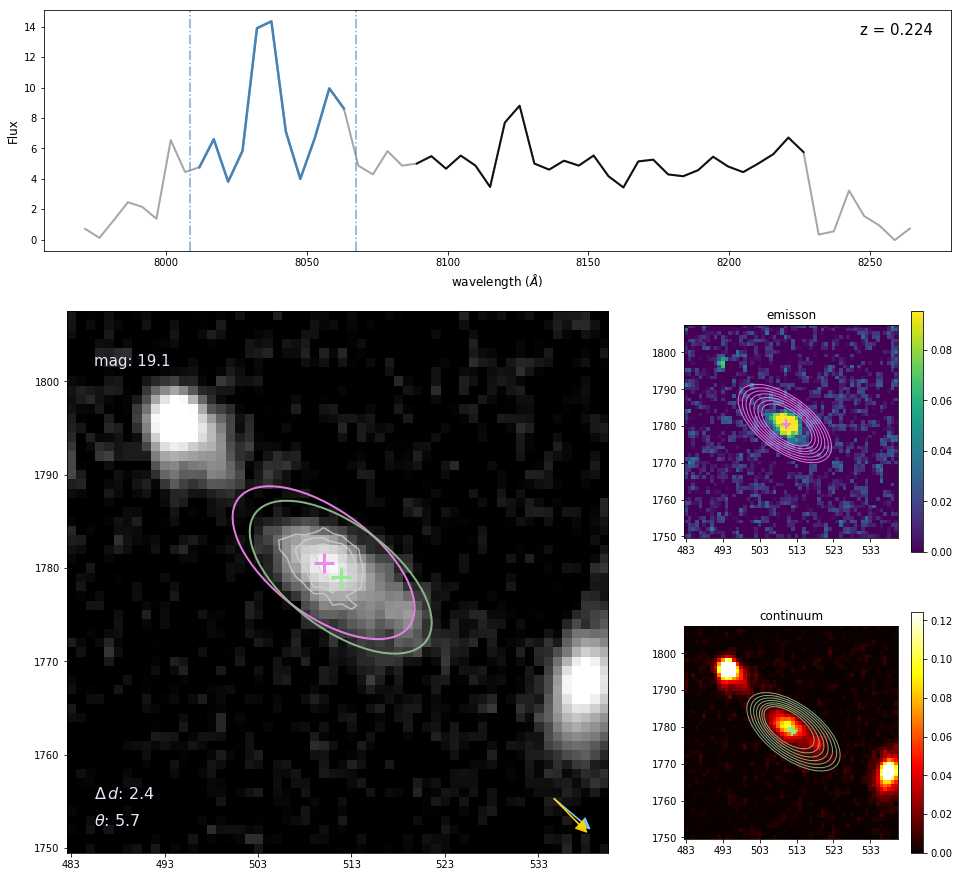

In [5]:
Datacube.centroid_analysis(num=1347, centroid_type='APER',coord_type="angular")

optimal aperture:2.2
Aper (min,max): (1.54,2.20)


(49.16647884304501, 1.4925253865855634, 70.3765549124862)

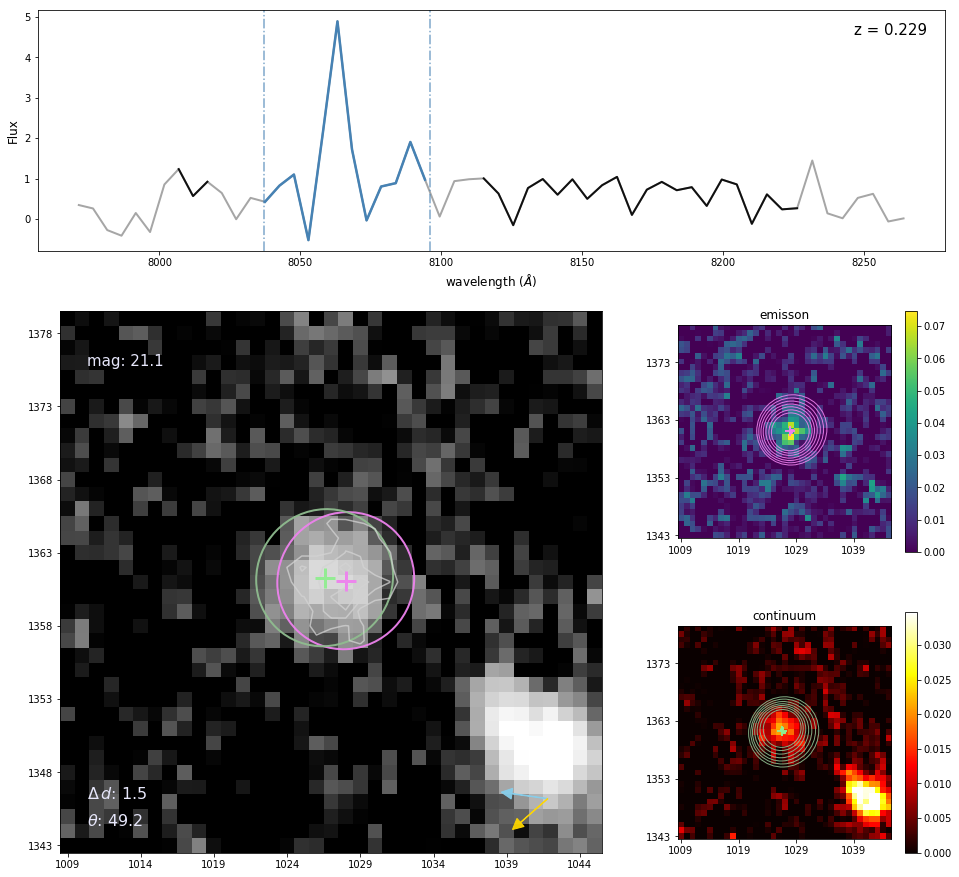

In [4]:
Datacube.centroid_analysis(num=1858, centroid_type='APER',coord_type="angular")

optimal aperture:2.5
Aper (min,max): (1.75,2.50)


(3.2415184558520735, 0.9538318181842378, 493.3105548533053)

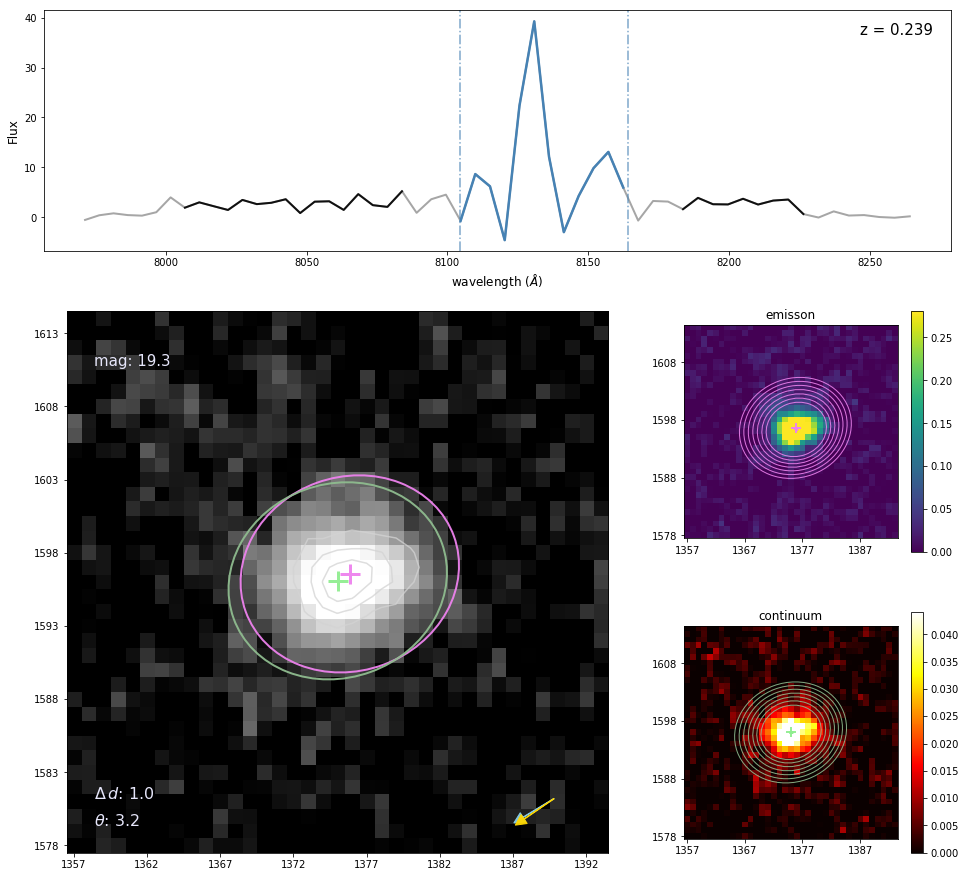

In [3]:
Datacube.centroid_analysis(num=1638, centroid_type='APER',coord_type="angular")

In [4]:
Datacube.hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2064                                                  
NAXIS3  =                   57                                                  
DATE    = '2017-09-29'         / Creation date                                  
MASK    = 'False   '                                                            
FILETYPE= 'Calibrated Spectrum Cube' / Type of file                             
OBSERVAT= 'CFHT    '           / Observatory name                               
TELESCOP= 'CFHT 3.6m'          / Hawaii Big Island, Mauna Kea                   
INSTRUME= 'SITELLE '           / Instrument Name                                
ORBSVER = '4.0-DR1-beta'    

In [5]:
from astropy.wcs import WCS
w = WCS(Datacube.hdu[0].header, naxis=2)
w

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 328.394  17.6697222222  
CRPIX : 1079.25968262  1033.22775456  
CD1_1 CD1_2  : -9.00274955272e-05  -8.61822428328e-07  
CD2_1 CD2_2  : -8.61822428328e-07  9.00274955272e-05  
NAXIS : 2048  2064  57

In [8]:
Datacube.pos_BCG

(976.2874, 1315.7594)

In [27]:
ra, dec = w.all_pix2world(Datacube.pos_BCG[0], Datacube.pos_BCG[1], 1)
ra, dec

(array(328.40351201), array(17.69544013))

In [20]:
w.all_world2pix(ra, dec, 1)

[array(976.28739966), array(1315.75939955)]

In [9]:
el_ls_v = glob.glob("./A2390C/fig/candidate_v3/visual/#*.png")
Num_v = np.sort(np.array([re.compile(r'\d+').findall(el)[-1] for el in el_ls_v]).astype("int"))
ind_v = Num_v-1
Num_v

array([  14,   34,  100,  114,  167,  224,  227,  267,  285,  313,  325,
        335,  374,  375,  381,  397,  463,  518,  558,  574,  583,  589,
        600,  607,  633,  646,  651,  684,  711,  738,  751,  781,  791,
        831,  881,  901,  919,  934,  946,  979, 1051, 1082, 1111, 1169,
       1212, 1222, 1241, 1256, 1259, 1263, 1272, 1279, 1297, 1315, 1317,
       1319, 1323, 1347, 1363, 1371, 1387, 1390, 1392, 1403, 1406, 1445,
       1456, 1469, 1495, 1501, 1504, 1510, 1555, 1609, 1625, 1630, 1638,
       1668, 1686, 1697, 1712, 1713, 1715, 1726, 1728, 1732, 1738, 1758,
       1776, 1810, 1858, 1870, 1877, 1906, 1920, 1926, 1930, 1984, 2047,
       2066, 2114, 2136, 2153, 2159, 2166, 2174])

In [10]:
inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])

Num_va = Num_v[(SNR_best_Ha/SNR_best_Hb>1.)[Num_v-1]]
# Num_va = Num_va[(SNR_best_Ha[Num_va-1]>6)]
ind_v = Num_va-1

Num_va

array([  14,  285,  325,  335,  375,  397,  463,  518,  558,  583,  589,
        600,  607,  633,  646,  684,  711,  738,  751,  781,  831,  901,
        919,  934,  946, 1051, 1082, 1111, 1169, 1212, 1222, 1256, 1259,
       1263, 1272, 1279, 1297, 1315, 1317, 1319, 1323, 1347, 1363, 1371,
       1387, 1390, 1392, 1403, 1406, 1445, 1469, 1495, 1501, 1504, 1510,
       1555, 1609, 1625, 1638, 1668, 1686, 1697, 1712, 1713, 1715, 1728,
       1738, 1776, 1858, 1870, 1877, 1920, 1926, 1930, 1984, 2066, 2153,
       2166, 2174])

In [11]:
Num_vp=Num_va[(Datacube.z_best[Num_va-1]<0.24) & (Datacube.z_best[Num_va-1]>0.216)]
Num_vp=Num_vp[Num_vp!=1877]
ind_v = Num_vp-1
Num_vp

array([ 325,  375,  397,  463,  583,  600,  633,  646,  684,  738,  831,
        901,  919,  934,  946, 1051, 1111, 1169, 1259, 1272, 1279, 1297,
       1317, 1319, 1323, 1347, 1363, 1387, 1392, 1406, 1445, 1638, 1668,
       1713, 1738, 1858, 1870, 1926, 1930, 1984, 2066, 2153, 2166, 2174])

106
79
44


Text(0.5,0,'A2390 Candidate Redshift')

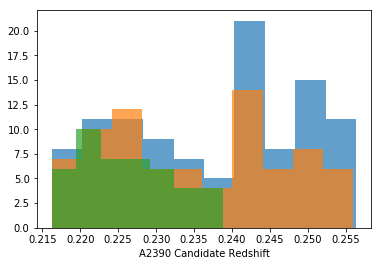

In [5]:
plt.hist(Datacube.z_best[Num_v-1],bins=10,alpha=0.7)
plt.hist(Datacube.z_best[Num_va-1],bins=10,alpha=0.7)
plt.hist(Datacube.z_best[Num_vp-1],bins=7,alpha=0.7)
print(len(Num_v))
print(len(Num_va))
print(len(Num_vp))
plt.xlabel("A2390 Candidate Redshift")

optimal aperture:2.5
PA: -136.539,  Cluster-centric angle: -125.134


(11.4048082159823, 0.4124695302553305, 489.07736779508616)

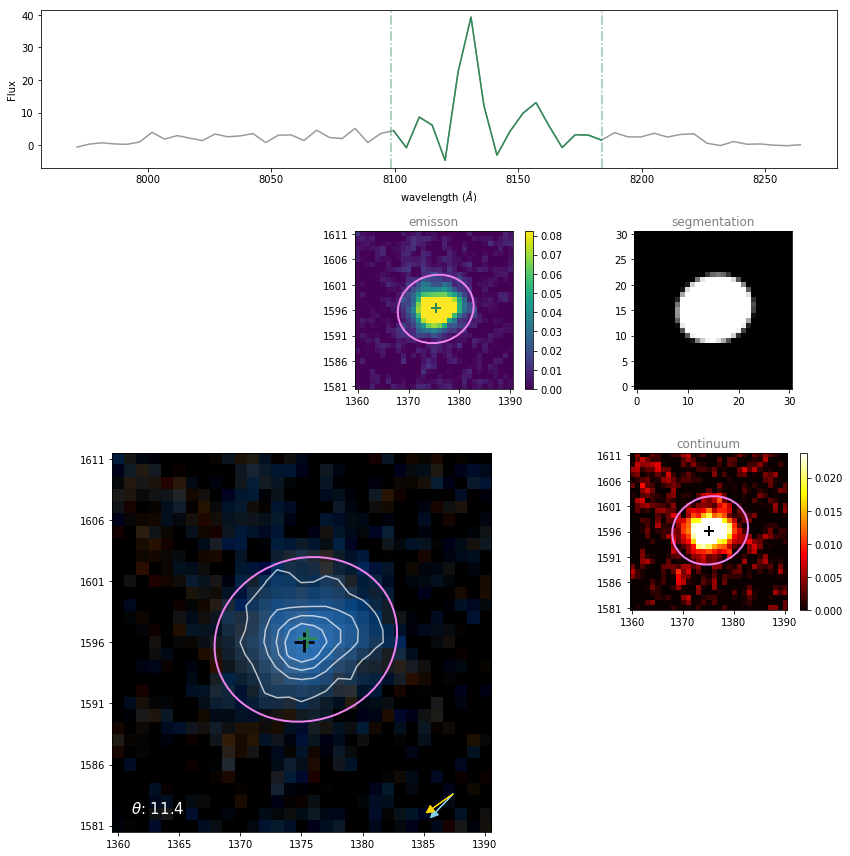

In [6]:
Datacube.centroid_analysis(num=1638, centroid_type='APER')

In [11]:
# Datacube.centroid_analysis_all(Num_v=Num_v, centroid_type='APER',coord_type="euclid")
# diff_angles_v_e = Datacube.diff_angles[ind_v].copy()
# diff_centroids_v_e = Datacube.diff_centroids[ind_v].copy()
# dist_clus_cens_v_e = Datacube.dist_clus_cens[ind_v].copy()

In [ ]:
for num in Num_vp:
    Datacube.centroid_analysis(num=num, centroid_type='APER')
    plt.savefig("./A2390C/fig/centroid_weight_med/#EL-%s"%num,dpi=150)
    plt.show()
    plt.close()

In [12]:
Datacube.centroid_analysis_all(Num_v=Num_v, centroid_type='APER',coord_type="angular")

Current Model:  Ha-NII_gauss
#EL-1
optimal aperture:4.0
#EL-2
optimal aperture:4.5
Unable to compute centroid! Error raised.
#EL-3
optimal aperture:3.8
#EL-4
optimal aperture:2.8
#EL-5
optimal aperture:2.5
#EL-6
optimal aperture:2.2
#EL-7
optimal aperture:2.2
#EL-8
optimal aperture:2.2
#EL-9
optimal aperture:1.8
#EL-10
optimal aperture:2.2
#EL-11
optimal aperture:2.8
#EL-12
optimal aperture:2.6
#EL-13
optimal aperture:2.1
#EL-14
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-15
optimal aperture:2.0
#EL-16
optimal aperture:3.8
#EL-17
optimal aperture:2.0
#EL-18
optimal aperture:2.0
#EL-19
optimal aperture:2.2
#EL-20
optimal aperture:2.4
#EL-21
optimal aperture:3.9
#EL-22
optimal aperture:2.1
#EL-23
optimal aperture:1.6
#EL-24
optimal aperture:2.3
#EL-25
optimal aperture:1.9
#EL-26
optimal aperture:2.7
#EL-27
optimal aperture:3.6
#EL-28
optimal aperture:1.5
#EL-29
optimal aperture:1.9
#EL-30
optimal aperture:2.8
#EL-31
optimal aperture:2.3
#EL-32
optimal aperture:2.2
#EL-33
optimal

#EL-286
optimal aperture:2.0
#EL-287
optimal aperture:2.5
#EL-288
optimal aperture:1.9
#EL-289
optimal aperture:1.8
#EL-290
optimal aperture:1.7
#EL-291
optimal aperture:3.7
#EL-292
optimal aperture:2.3
#EL-293
optimal aperture:1.8
#EL-294
optimal aperture:2.1
#EL-295
optimal aperture:1.8
#EL-296
optimal aperture:2.1
#EL-297
optimal aperture:2.1
#EL-298
optimal aperture:2.2
#EL-299
optimal aperture:2.2
#EL-300
optimal aperture:2.2
#EL-301
optimal aperture:2.2
#EL-302
optimal aperture:2.3
#EL-303
optimal aperture:2.3
#EL-304
optimal aperture:3.3
#EL-305
optimal aperture:2.2
#EL-306
optimal aperture:2.2
#EL-307
optimal aperture:1.9
#EL-308
optimal aperture:2.8
#EL-309
optimal aperture:2.0
#EL-310
optimal aperture:2.3
#EL-311
optimal aperture:2.9
#EL-312
optimal aperture:2.1
#EL-313
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-314
optimal aperture:2.1
#EL-315
optimal aperture:2.1
#EL-316
optimal aperture:2.3
#EL-317
optimal aperture:2.7
#EL-318
optimal aperture:2.9
#EL-319
optimal

#EL-559
optimal aperture:1.9
#EL-560
optimal aperture:3.3
#EL-561
optimal aperture:2.3
#EL-562
optimal aperture:2.6
#EL-563
optimal aperture:4.5
#EL-564
optimal aperture:4.4
#EL-565
optimal aperture:1.9
#EL-566
optimal aperture:2.1
#EL-567
optimal aperture:2.2
#EL-568
optimal aperture:2.1
#EL-569
optimal aperture:1.9
#EL-570
optimal aperture:2.7
#EL-571
optimal aperture:2.0
#EL-572
optimal aperture:2.2
#EL-573
optimal aperture:1.9
#EL-574
optimal aperture:1.9
Aper (min,max): (1.33,1.90)
#EL-575
optimal aperture:2.7
#EL-576
optimal aperture:2.1
#EL-577
optimal aperture:2.0
#EL-578
optimal aperture:2.2
#EL-579
optimal aperture:3.0
#EL-580
optimal aperture:2.2
#EL-581
optimal aperture:1.9
#EL-582
optimal aperture:4.5
#EL-583
optimal aperture:2.7
Aper (min,max): (1.89,2.70)
#EL-584
optimal aperture:2.3
#EL-585
optimal aperture:2.3
#EL-586
optimal aperture:2.3
#EL-587
optimal aperture:2.5
#EL-588
optimal aperture:2.7
#EL-589
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-590
optimal a

#EL-832
optimal aperture:1.7
#EL-833
optimal aperture:2.4
#EL-834
optimal aperture:1.7
#EL-835
optimal aperture:2.9
#EL-836
optimal aperture:2.2
#EL-837
optimal aperture:2.8
#EL-838
optimal aperture:1.4
#EL-839
optimal aperture:3.1
#EL-840
optimal aperture:2.1
#EL-841
optimal aperture:2.2
#EL-842
optimal aperture:2.5
#EL-843
optimal aperture:2.2
#EL-844
optimal aperture:1.9
#EL-845
optimal aperture:2.0
#EL-846
optimal aperture:2.1
#EL-847
optimal aperture:2.0
#EL-848
optimal aperture:2.3
#EL-849
optimal aperture:2.0
#EL-850
optimal aperture:2.0
#EL-851
optimal aperture:2.2
#EL-852
optimal aperture:2.2
#EL-853
optimal aperture:2.1
#EL-854
optimal aperture:2.0
#EL-855
optimal aperture:1.7
#EL-856
optimal aperture:1.9
#EL-857
optimal aperture:1.9
#EL-858
optimal aperture:2.6
#EL-859
optimal aperture:1.7
#EL-860
optimal aperture:1.7
#EL-861
optimal aperture:2.5
#EL-862
optimal aperture:2.2
#EL-863
optimal aperture:2.7
#EL-864
optimal aperture:2.5
#EL-865
optimal aperture:2.5
#EL-866
optima

#EL-1112
optimal aperture:2.0
#EL-1113
optimal aperture:1.9
#EL-1114
optimal aperture:3.7
#EL-1115
optimal aperture:2.5
#EL-1116
optimal aperture:2.4
#EL-1117
optimal aperture:2.0
#EL-1118
optimal aperture:2.2
#EL-1119
optimal aperture:2.4
#EL-1120
optimal aperture:3.9
#EL-1121
optimal aperture:2.2
#EL-1122
optimal aperture:1.8
#EL-1123
optimal aperture:3.4
#EL-1124
optimal aperture:2.0
#EL-1125
optimal aperture:1.8
#EL-1126
optimal aperture:2.0
#EL-1127
optimal aperture:2.1
#EL-1128
optimal aperture:2.8
#EL-1129
optimal aperture:2.4
#EL-1130
optimal aperture:2.2
#EL-1131
optimal aperture:4.5
#EL-1132
optimal aperture:2.0
#EL-1133
optimal aperture:2.2
#EL-1134
optimal aperture:1.7
#EL-1135
optimal aperture:2.7
#EL-1136
optimal aperture:2.6
#EL-1137
optimal aperture:2.4
#EL-1138
optimal aperture:2.2
#EL-1139
optimal aperture:1.6
#EL-1140
optimal aperture:3.0
#EL-1141
optimal aperture:2.8
#EL-1142
optimal aperture:2.0
#EL-1143
optimal aperture:2.0
#EL-1144
optimal aperture:1.8
#EL-1145
o

#EL-1372
optimal aperture:2.7
#EL-1373
optimal aperture:1.9
#EL-1374
optimal aperture:2.9
#EL-1375
optimal aperture:1.9
#EL-1376
optimal aperture:2.3
#EL-1377
optimal aperture:2.1
#EL-1378
optimal aperture:1.9
#EL-1379
optimal aperture:2.1
#EL-1380
optimal aperture:2.1
#EL-1381
optimal aperture:2.8
#EL-1382
optimal aperture:1.8
#EL-1383
optimal aperture:2.2
#EL-1384
optimal aperture:3.7
#EL-1385
optimal aperture:1.6
#EL-1386
optimal aperture:2.3
#EL-1387
optimal aperture:1.9
Aper (min,max): (1.33,1.90)
#EL-1388
optimal aperture:1.8
#EL-1389
optimal aperture:2.0
#EL-1390
optimal aperture:2.1
Aper (min,max): (1.47,2.10)
#EL-1391
optimal aperture:2.8
#EL-1392
optimal aperture:2.2
Aper (min,max): (1.54,2.20)
#EL-1393
optimal aperture:2.5
#EL-1394
optimal aperture:2.0
#EL-1395
optimal aperture:1.9
#EL-1396
optimal aperture:2.4
#EL-1397
optimal aperture:2.5
#EL-1398
optimal aperture:2.7
#EL-1399
optimal aperture:2.7
#EL-1400
optimal aperture:1.9
#EL-1401
optimal aperture:2.2
#EL-1402
optimal

#EL-1631
optimal aperture:2.6
#EL-1632
optimal aperture:2.6
#EL-1633
optimal aperture:2.8
#EL-1634
optimal aperture:2.0
#EL-1635
optimal aperture:1.1
#EL-1636
optimal aperture:3.1
#EL-1637
optimal aperture:1.9
#EL-1638
optimal aperture:2.5
Aper (min,max): (1.75,2.50)
#EL-1639
optimal aperture:1.8
#EL-1640
optimal aperture:1.9
#EL-1641
optimal aperture:1.9
#EL-1642
optimal aperture:2.8
#EL-1643
optimal aperture:4.4
#EL-1644
optimal aperture:2.1
#EL-1645
optimal aperture:2.5
#EL-1646
optimal aperture:2.1
#EL-1647
optimal aperture:2.0
#EL-1648
optimal aperture:2.2
#EL-1649
optimal aperture:2.4
#EL-1650
optimal aperture:2.4
#EL-1651
optimal aperture:2.0
#EL-1652
optimal aperture:1.8
#EL-1653
optimal aperture:3.6
#EL-1654
optimal aperture:2.1
#EL-1655
optimal aperture:2.0
#EL-1656
optimal aperture:1.8
#EL-1657
optimal aperture:3.0
#EL-1658
optimal aperture:2.2
#EL-1659
optimal aperture:3.0
#EL-1660
optimal aperture:1.8
#EL-1661
optimal aperture:2.0
#EL-1662
optimal aperture:2.3
#EL-1663
opt

#EL-1898
optimal aperture:2.2
#EL-1899
optimal aperture:3.5
#EL-1900
optimal aperture:2.3
#EL-1901
optimal aperture:2.1
#EL-1902
optimal aperture:2.3
#EL-1903
optimal aperture:1.8
#EL-1904
optimal aperture:2.0
#EL-1905
optimal aperture:2.3
#EL-1906
optimal aperture:2.3
Aper (min,max): (1.61,2.30)
#EL-1907
optimal aperture:2.6
#EL-1908
optimal aperture:2.0
#EL-1909
optimal aperture:2.5
#EL-1910
optimal aperture:1.9
#EL-1911
optimal aperture:2.5
#EL-1912
optimal aperture:2.5
#EL-1913
optimal aperture:1.9
#EL-1914
optimal aperture:2.0
#EL-1915
optimal aperture:2.1
#EL-1916
optimal aperture:2.5
#EL-1917
optimal aperture:2.9
#EL-1918
optimal aperture:1.9
#EL-1919
optimal aperture:2.2
#EL-1920
optimal aperture:2.4
Aper (min,max): (1.68,2.40)
#EL-1921
optimal aperture:4.2
#EL-1922
optimal aperture:2.3
#EL-1923
optimal aperture:2.5
#EL-1924
optimal aperture:2.2
#EL-1925
optimal aperture:2.3
#EL-1926
optimal aperture:1.4
Aper (min,max): (0.98,1.40)
#EL-1927
optimal aperture:2.1
#EL-1928
optimal

#EL-2167
optimal aperture:2.1
#EL-2168
optimal aperture:2.0
#EL-2169
optimal aperture:1.8
#EL-2170
optimal aperture:4.0
#EL-2171
optimal aperture:1.7
#EL-2172
optimal aperture:2.0
#EL-2173
optimal aperture:2.4
#EL-2174
optimal aperture:2.5
Aper (min,max): (1.75,2.50)
#EL-2175
optimal aperture:2.2
#EL-2176
optimal aperture:2.3
#EL-2177
optimal aperture:2.2
#EL-2178
optimal aperture:2.3
#EL-2179
optimal aperture:2.1
#EL-2180
optimal aperture:1.7
#EL-2181
optimal aperture:1.8
#EL-2182
optimal aperture:2.0
#EL-2183
optimal aperture:2.3
#EL-2184
optimal aperture:2.5
#EL-2185
optimal aperture:2.4
#EL-2186
optimal aperture:1.6


In [13]:
# # Below two cell is For comparison with euclid angle
# diff_angles_v_a = Datacube.diff_angles[ind_v].copy()
# diff_centroids_v_a = Datacube.diff_centroids[ind_v].copy()
# dist_clus_cens_v_a = Datacube.dist_clus_cens[ind_v].copy()
# # The difference in angle is small
# plt.scatter(diff_angles_v_a, diff_angles_v_a-diff_angles_v_e)
# plt.xlabel("Angle distortion corrected")
# plt.ylabel("Angle euclid")

Isophotal area threshold:  10.0
Distance to field edge threshold:  50
Control Sample : n=1291


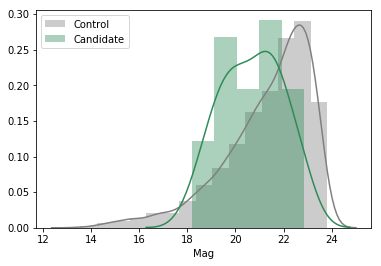

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

mag0 = 16.8-(-2.5*np.log10(Datacube.Tab_SE[1876]["FLUX_AUTO"]))
mag0 = 25.2
mag_all = -2.5*np.log10(Datacube.Tab_SE["FLUX_AUTO"]) + mag0
ind_notv = np.setdiff1d(Datacube.Tab_SE["NUMBER"]-1, ind_v)
mag_ctrl = pd.Series(mag_all[ind_notv]).dropna()

sns.distplot(mag_ctrl,label="Control",color="gray",bins=15)
mag_el = pd.Series(mag_all[ind_v])
sns.distplot(mag_el,label="Candidate",color="seagreen")
# plt.axvline(mag_cut[0],color='k',ls='--')
# plt.axvline(mag_cut[1],color='k',ls='--')
plt.xlabel("Mag")
plt.legend()

Datacube.construct_control(Num_v=Num_v, mag_cut=(mag_el.min(),mag_el.max()), dist_cut=50, bootstraped=False)

In [15]:
ind_v = Num_vp-1
Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]

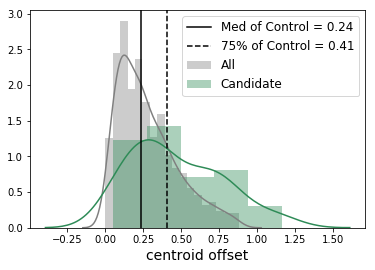

In [16]:
#ISO p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.75])

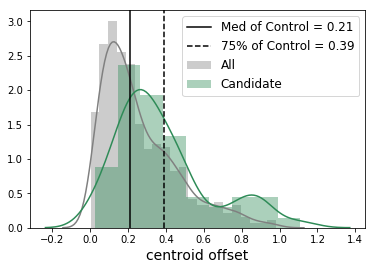

In [19]:
#APER p (distortion corrected)
draw_centroid_offset(Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5,0.75])

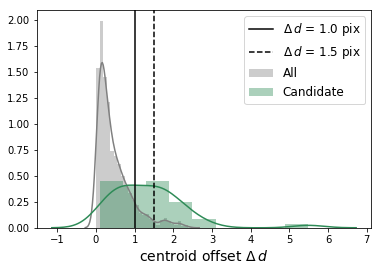

In [12]:
#APER p (2 aper)
draw_centroid_offset(pd.Series(Datacube.diff_centroids_v).dropna(), Datacube.diff_centroids_c, crit=[1.,1.5])

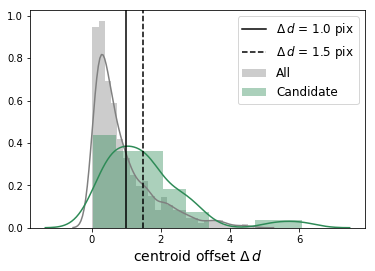

In [11]:
#APER p (2 aper)
draw_centroid_offset(pd.Series(Datacube.diff_centroids_v).dropna(), Datacube.diff_centroids_c, crit=[1.,1.5])

# of offset > 50% : 33
# of offset > 75% : 20


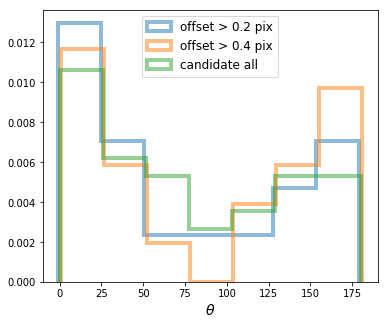

In [21]:
#ISO2 p (distortion corrected)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 0.75], b=8)

# of offset > 50% : 55
# of offset > 75% : 29


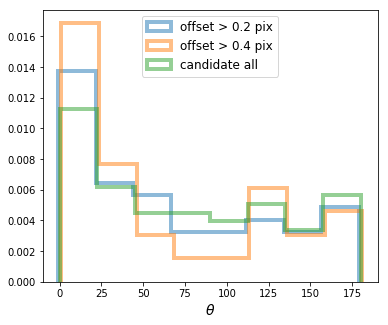

In [44]:
#APER iter p (new CC)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 0.75], b=9)

# of offset > 50% : 34
# of offset > 150% : 18


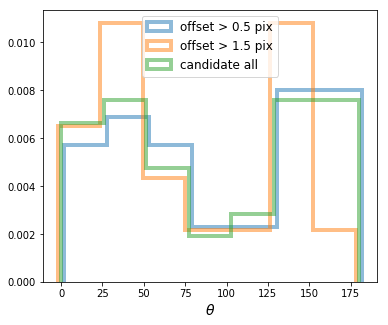

In [30]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 1.5], b=8)

# of offset > 50% : 37
# of offset > 100% : 23


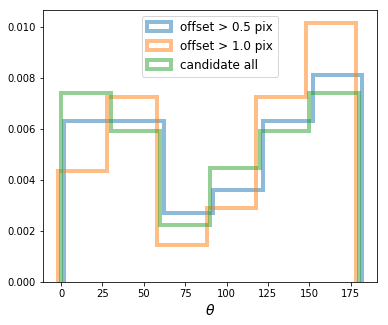

In [16]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
draw_angle_candidate(Datacube.diff_angles_v, Datacube.diff_centroids_v, Datacube.diff_centroids_c, crit=[0.5, 1.], b=7)

# of offset > 50% : 28
# of offset > 150% : 12


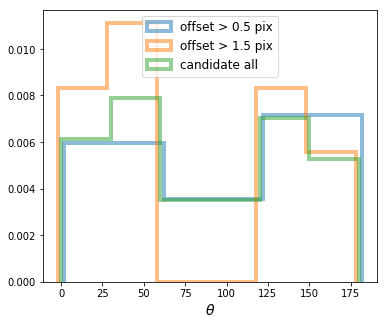

In [18]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
cond = (Datacube.diff_centroids_v<10) & (mag_all[ind_v]<22.7) & (mag_all[ind_v]>18.5)
draw_angle_candidate(Datacube.diff_angles_v[cond], Datacube.diff_centroids_v[cond], 
                     Datacube.diff_centroids_c, crit=[0.5, 1.5], b=7)

# of offset > 50% : 32
# of offset > 100% : 22


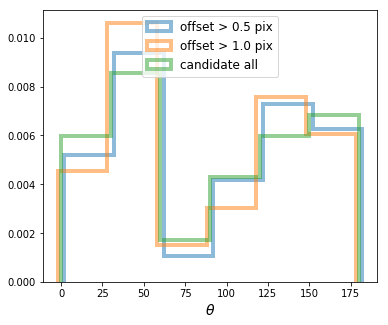

In [18]:
#APER p (2 aper)
plt.figure(figsize=(6,5))
cond = (Datacube.diff_centroids_v<10) & (mag_all[ind_v]<22.7) #& (mag_all[ind_v]>20)
draw_angle_candidate(Datacube.diff_angles_v[cond], Datacube.diff_centroids_v[cond], 
                     Datacube.diff_centroids_c, crit=[0.5, 1.], b=7)

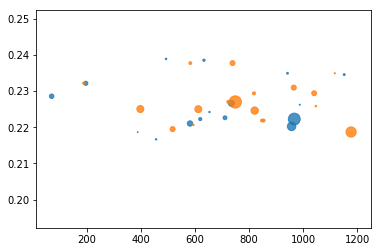

In [30]:
cond1 =  (Datacube.diff_centroids_v>1.)&(Datacube.diff_angles_v<90)
cond2 = (Datacube.diff_centroids_v>1.)&(Datacube.diff_angles_v>90)
plt.scatter(Datacube.dist_clus_cens_v[cond1], Datacube.z_best[ind_v][cond1],s=np.sqrt(10**(mag_all[ind_v][cond1]-18.5)),alpha=0.8)
plt.scatter(Datacube.dist_clus_cens_v[cond2], Datacube.z_best[ind_v][cond2],s=np.sqrt(10**(mag_all[ind_v][cond2]-18.5)),alpha=0.8)

In [20]:
Datacube.diff_angles_v[Datacube.diff_centroids_v>2]

array([169.48752757, 157.13264099,  12.32104393, 162.17184998,
       163.56584626, 134.91429798, 176.92413687,   1.41278795,
        27.65000401,  50.8459976 ,  10.85419507,  53.97362942,
       155.90646659])

In [21]:
Num_vp[Datacube.diff_centroids_v>2]

array([ 738,  831,  919,  946, 1111, 1297, 1317, 1347, 1363, 1445, 1668,
       2066, 2174])

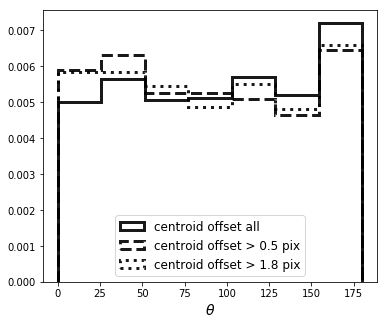

In [31]:
#APER (2aper)
plt.figure(figsize=(6,5))
draw_angle_control(Datacube.diff_angles_c,Datacube.diff_centroids_c, crit=[0.25,0.5],b=8)

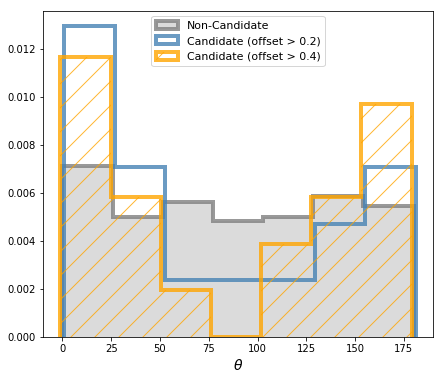

In [20]:
#ISO p (distortion corrected)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[0.5,0.75], b=8)

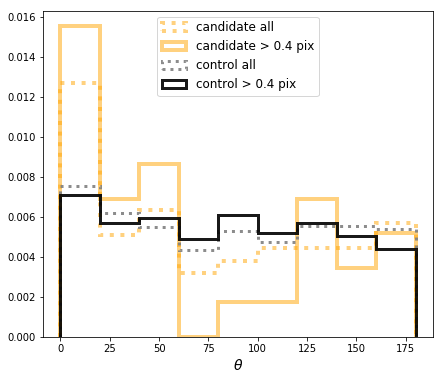

In [46]:
#APER p (new CC)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=0.75, b=10)

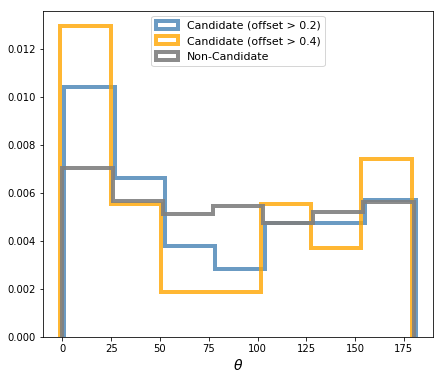

In [22]:
#APER p (distortion corrected)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[0.5,0.75], b=8)

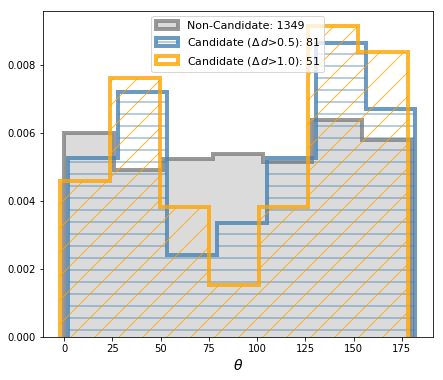

In [19]:
#APER p (2 aper)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[.5,1.], b=8)
# plt.savefig("/home/qliu/Pictures/20190312/A2390C.pdf",dpi=100)

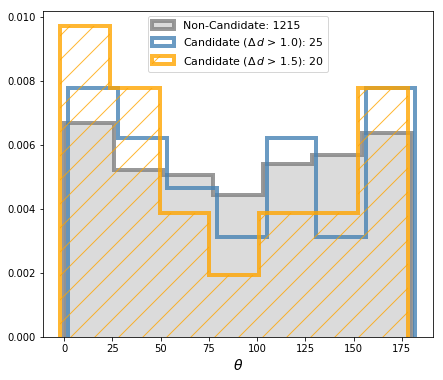

In [12]:
#APER p (2 aper scaled)
plt.figure(figsize=(7,6))
draw_angle_compare(Datacube.diff_angles_v, Datacube.diff_centroids_v, 
                   Datacube.diff_angles_c, Datacube.diff_centroids_c, crit=[1.,1.5], b=8)

In [22]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#ISO p (distortion corrected)
p = np.percentile(Datacube.diff_centroids_c,50)
q = np.percentile(Datacube.diff_centroids_c,75)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c[Datacube.diff_centroids_c>p]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c[Datacube.diff_centroids_c>q]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c[Datacube.diff_centroids_c>p]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c[Datacube.diff_centroids_c>q]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.120
K-S: p-value=0.637
K-S: p-value=0.085
K-S: p-value=0.567
Anderson_ksampResult(statistic=1.1123554850854154, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.11292860056993592)
Anderson_ksampResult(statistic=-0.018100464657445556, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.3547500061769544)
Anderson_ksampResult(statistic=1.3494236321091289, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.08956011488796149)
Anderson_ksampResult(statistic=-0.1272100154359195, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.39754763477510546)


In [51]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#APER iter p (new CC)
p = np.percentile(Datacube.diff_centroids_c,50)
q = np.percentile(Datacube.diff_centroids_c,75)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c[Datacube.diff_centroids_c>p]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c[Datacube.diff_centroids_c>q]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c[Datacube.diff_centroids_c>p]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c[Datacube.diff_centroids_c>q]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.023
K-S: p-value=0.032
K-S: p-value=0.023
K-S: p-value=0.037
Anderson_ksampResult(statistic=3.5245149298382192, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.01218799185153808)
Anderson_ksampResult(statistic=3.3413822448839237, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.014284112105688158)
Anderson_ksampResult(statistic=4.243114983988148, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.006646745712812021)
Anderson_ksampResult(statistic=3.221437252065207, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.015863292130494394)


In [23]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#APER p (distortion corrected)
p = np.percentile(Datacube.diff_centroids_c,50)
q = np.percentile(Datacube.diff_centroids_c,75)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c[Datacube.diff_centroids_c>p]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c[Datacube.diff_centroids_c>q]).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c[Datacube.diff_centroids_c>p]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c[Datacube.diff_centroids_c>q]]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.348
K-S: p-value=0.343
K-S: p-value=0.280
K-S: p-value=0.327
Anderson_ksampResult(statistic=0.5771761281793939, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1925969829396307)
Anderson_ksampResult(statistic=0.7829145292041785, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.15659459495070194)
Anderson_ksampResult(statistic=1.067747214764809, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.11800171806981748)
Anderson_ksampResult(statistic=1.035830680521079, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.12177825500269669)


In [16]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#APER p (2 aper)
p = 1 #np.percentile(Datacube.diff_centroids_c,25)
q = 1.5 #np.percentile(Datacube.diff_centroids_c,50)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>p], Datacube.diff_angles_c).pvalue)
print("K-S: p-value=%.3f"%ks_2samp(Datacube.diff_angles_v[Datacube.diff_centroids_v>q], Datacube.diff_angles_c).pvalue)

print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>p],Datacube.diff_angles_c]))
print(anderson_ksamp([Datacube.diff_angles_v[Datacube.diff_centroids_v>q],Datacube.diff_angles_c]))

K-S: p-value=0.364
K-S: p-value=0.425
Anderson_ksampResult(statistic=-0.4504862517358133, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.5590978228640259)
Anderson_ksampResult(statistic=0.035643826192652946, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.3354691820302117)


In [23]:
import pandas as pd
df = pd.DataFrame({"diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                 "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                 "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
df.to_csv('./A2390C/centroid_analysis_A2390C_iso.csv',sep=',',index=None)

In [31]:
import pandas as pd
coords = w.pixel_to_world(Datacube.Tab_SE["X_IMAGE"], Datacube.Tab_SE["Y_IMAGE"])
ind_v = Num_v-1
Datacube.diff_angles_v = Datacube.diff_angles[ind_v]
Datacube.diff_centroids_v = Datacube.diff_centroids[ind_v]
Datacube.dist_clus_cens_v = Datacube.dist_clus_cens[ind_v]

ind_c = Datacube.Num_c-1

inds_best_Ha = np.argmax(Datacube.CC_Rs_Temps['Ha-NII_gauss'], axis=1)
SNR_best_Ha = np.array([Datacube.CC_SNRs_Temps['Ha-NII_gauss'][i,j] for i,j in enumerate(inds_best_Ha)])
inds_best_Hb = np.argmax(Datacube.CC_Rs_Temps['Hb-OIII_gauss'], axis=1)
SNR_best_Hb = np.array([Datacube.CC_SNRs_Temps['Hb-OIII_gauss'][i,j] for i,j in enumerate(inds_best_Hb)])


df = pd.DataFrame({"ID":np.concatenate([ind_v + 1, Datacube.Num_c]),
                   "ra":np.concatenate([coords.ra[ind_v], coords.ra[ind_c]]),
                   "dec":np.concatenate([coords.dec[ind_v], coords.dec[ind_c]]),
                   "redshift":np.concatenate([Datacube.z_best[ind_v], Datacube.z_best[ind_c]]),
                   "SNR_Ha": np.concatenate([SNR_best_Ha[ind_v], SNR_best_Ha[ind_c]]),
                   "SNR_OIII": np.concatenate([SNR_best_Hb[ind_v], SNR_best_Hb[ind_c]]),
                   "mag_auto": np.concatenate([mag_all[ind_v], mag_all[ind_c]]),
                   "R_petro": np.concatenate([Datacube.Tab_SE['PETRO_RADIUS'][ind_v], Datacube.Tab_SE['PETRO_RADIUS'][ind_c]]),
                   "dist_edge": np.concatenate([Datacube.dist_edge[ind_v], Datacube.dist_edge[ind_c]]),
                   "dist_cen": np.concatenate([Datacube.dist_clus_cens[ind_v], Datacube.dist_clus_cens[ind_c]]),
                   "diff_angle":np.concatenate([Datacube.diff_angles_v, Datacube.diff_angles_c]),
                   "diff_centroid":np.concatenate([Datacube.diff_centroids_v, Datacube.diff_centroids_c]),
                   "type":np.concatenate([['v']*len(Datacube.diff_centroids_v), ['c']*len(Datacube.diff_centroids_c)])})
df.to_csv('./A2390C/centroid_analysis_A2390C_m2aper_all_weight_mean.csv',sep=',',index=None)

(0, 30)

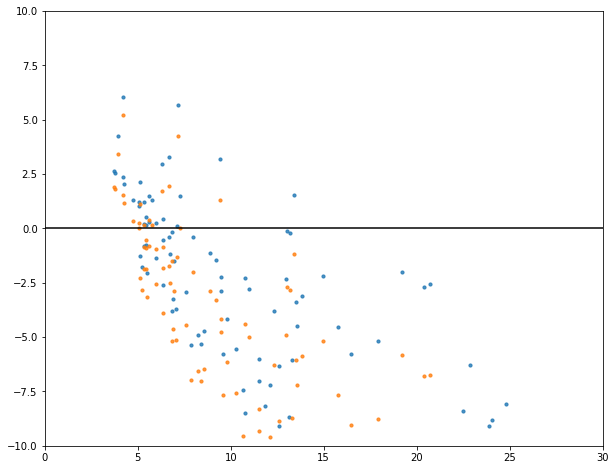

In [20]:
ind_v = Num_v-1
plt.figure(figsize=(10,8))
plt.scatter(SNR_best_Ha[ind_v], SNR_best_Hb[ind_v]-SNR_best_Ha[ind_v],s=10,alpha=0.8)
plt.scatter(SNR_best_Ha[ind_v], SNR_best_Hb[ind_v]-1.2*SNR_best_Ha[ind_v],s=10,alpha=0.8)
xx=np.linspace(0,50)
# plt.plot(xx,xx,"k--")
plt.axhline(0,color="k")
plt.ylim(-10,10)
plt.xlim(0,30)

In [14]:
mag_all[ind_v]

<Column name='FLUX_AUTO' dtype='float64' unit='ct' description='Flux within a Kron-like elliptical aperture' length=106>
 20.51869069309693
23.495174892838772
21.901403553398467
21.827194881309115
 21.37592242994026
21.969056301058068
22.057381125349274
 23.76090769337967
19.723506907290037
22.994409635448562
21.316404214000347
22.640771320018665
               ...
 18.57779129050988
21.638317676958604
22.477101343843763
21.958921175935405
 21.35035311261592
22.211803128582797
21.502758410291648
23.138818799985657
20.397088909123266
22.158466423612502
 18.85646262430473
 20.28926145221416

In [9]:
from scipy.stats import kstest,ks_2samp,norm, anderson_ksamp
#APER p A2390C + A2390E + A2390W + A2465C
p = np.percentile(diff_centroid_c_all, 50)
q = np.percentile(diff_centroid_c_all, 80)
print("K-S: p-value=%.4f"%ks_2samp(diff_angle_v_all[diff_centroid_v_all>p], diff_angle_c_all[diff_centroid_c_all>p]).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(diff_angle_v_all[diff_centroid_v_all>q], diff_angle_c_all[diff_centroid_c_all>q]).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(diff_angle_v_all[diff_centroid_v_all>p], diff_angle_c_all).pvalue)
print("K-S: p-value=%.4f"%ks_2samp(diff_angle_v_all[diff_centroid_v_all>q], diff_angle_c_all).pvalue)

print(anderson_ksamp([diff_angle_v_all[diff_centroid_v_all>p],diff_angle_c_all[diff_centroid_c_all>p]]))
print(anderson_ksamp([diff_angle_v_all[diff_centroid_v_all>q],diff_angle_c_all[diff_centroid_c_all>q]]))
print(anderson_ksamp([diff_angle_v_all[diff_centroid_v_all>p],diff_angle_c_all]))
print(anderson_ksamp([diff_angle_v_all[diff_centroid_v_all>q],diff_angle_c_all]))

K-S: p-value=0.0019
K-S: p-value=0.0120
K-S: p-value=0.0029
K-S: p-value=0.0058
Anderson_ksampResult(statistic=5.614724731264818, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.0022464310763749)
Anderson_ksampResult(statistic=2.1890036184347923, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.04031367812819676)
Anderson_ksampResult(statistic=5.146782444911563, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.003217917619608687)
Anderson_ksampResult(statistic=3.0790980335898492, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.01798233337531276)
